In [34]:
# Import Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns
import math
import itertools
from itertools import product
import warnings
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
# Defining file paths/reading data with pandas library

hourly_file_path = Path("Resources/saleshourly.csv")
hourly_df = pd.read_csv(hourly_file_path, encoding="ISO-8859-1")

daily_file_path = Path("Resources/salesdaily.csv")
daily_df = pd.read_csv(daily_file_path, encoding="ISO-8859-1")

weekly_file_path = Path("Resources/salesweekly.csv")
weekly_df = pd.read_csv(weekly_file_path, encoding="ISO-8859-1")

monthly_file_path = Path("Resources/salesmonthly.csv")
monthly_df = pd.read_csv(monthly_file_path, encoding="ISO-8859-1")

In [23]:
# Check for missing values

daily_na = daily_df.isna().sum().sum()
print(daily_na)
weekly_na = weekly_df.isna().sum().sum()
print(weekly_na)

0
0


                               SARIMAX Results                                
Dep. Variable:                  M01AE   No. Observations:                  302
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -995.823
Date:                Tue, 15 Oct 2024   AIC                           1999.647
Time:                        21:46:23   BIC                           2014.489
Sample:                             0   HQIC                          2005.585
                                - 302                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0657      0.684     39.545      0.000      25.724      28.407
ar.L1          0.3048      0.050      6.074      0.000       0.206       0.403
ar.L2          0.1361      0.058      2.335      0.0

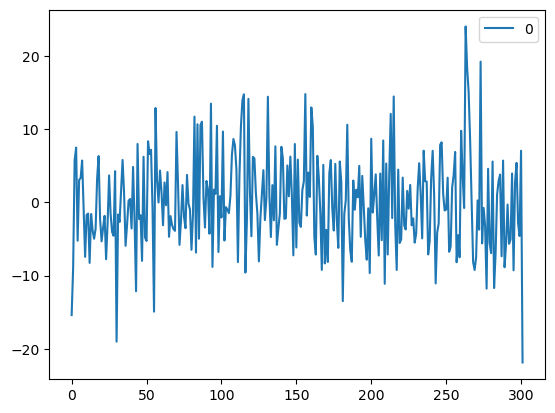

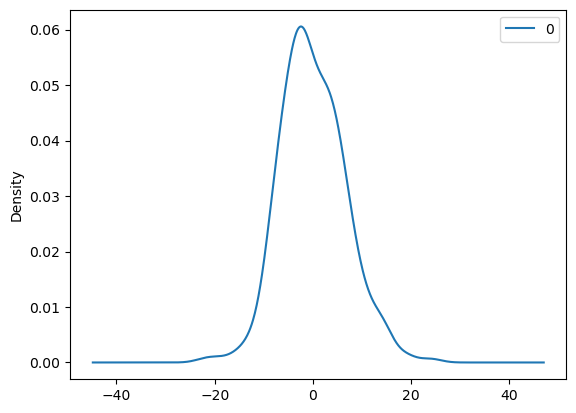

                0
count  302.000000
mean     0.031444
std      6.561380
min    -21.864270
25%     -4.616598
50%     -0.833424
75%      4.045353
max     24.024058


In [26]:
model = ARIMA(weekly_df['M01AE'], order=(2,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=25.278094, expected=14.858000
predicted=23.303917, expected=31.459000
predicted=27.300169, expected=25.356000
predicted=27.228094, expected=28.181000
predicted=27.392967, expected=31.004000
predicted=28.463793, expected=26.156000
predicted=27.411367, expected=20.066000
predicted=25.227954, expected=28.746000
predicted=27.036266, expected=21.460000
predicted=25.888932, expected=34.038000
predicted=28.501607, expected=17.311000
predicted=25.580547, expected=30.345000
predicted=26.841121, expected=19.624000
predicted=25.857327, expected=28.967000
predicted=26.661362, expected=38.715000
predicted=30.294557, expected=28.725000
predicted=29.071779, expected=43.618000
predicted=31.446463, expected=29.305000
predicted=30.178345, expected=20.772000
predicted=26.087763, expected=29.928000
predicted=27.166270, expected=21.538000
predicted=26.386696, expected=20.736000
predicted=25.068906, expected=27.770000
predicted=26.618988, expected=23.301000
predicted=26.469728, expected=22.308000


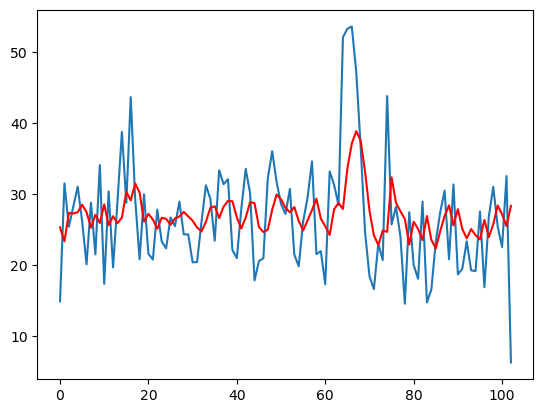

In [27]:
X = weekly_df['M01AE'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [33]:
M01AB= ['M01AB',0,0,0]
print(M01AB[1])

0


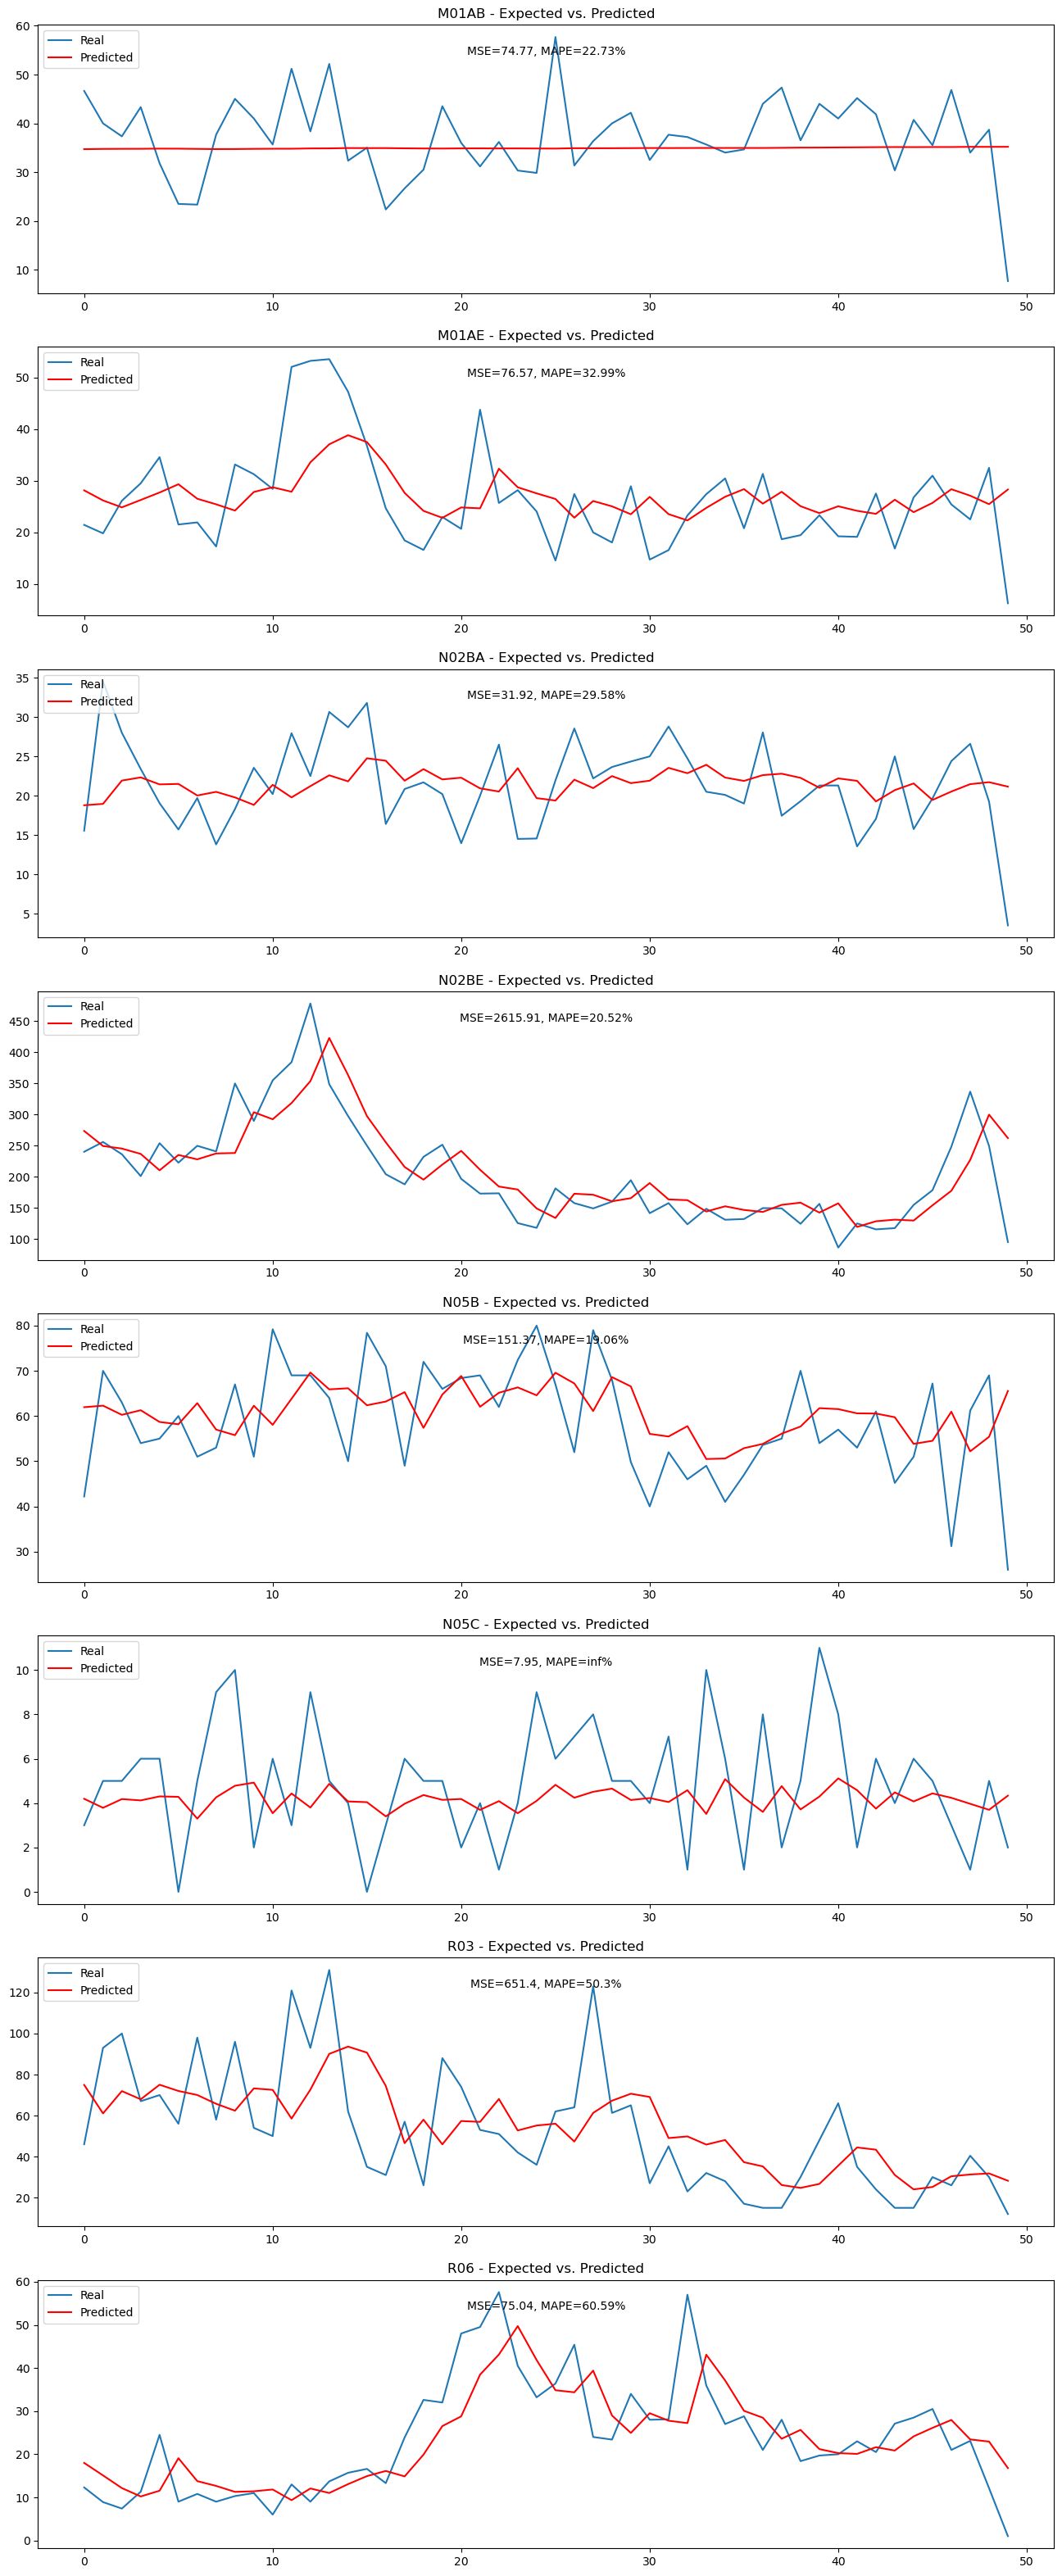

In [37]:
M01AB= ['M01AB',0,0,0]
M01AE= ['M01AE',2,0,0]
N02BA= ['N02BA',2,1,4]
N02BE= ['N02BE',2,0,0]
N05B= ['N05B',0,0,5]
N05C= ['N05C',0,0,1]
R03= ['R03',4,1,5]
R06= ['R06',1,0,1]
drugs = [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

subplotindex=0
fig, ax = plt.subplots(8, 1, figsize=(16,40))

warnings.filterwarnings("ignore")

for drug in drugs:
    X = weekly_df[drug[0]].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(drug[1],drug[2],drug[3]))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    ax[subplotindex].set_title(drug[0]+' - Expected vs. Predicted')
    # fig.suptitle('MSE=' + str(round(mse,2))+', MAPE='+ str(round(mape,2)) +'%')
    ax[subplotindex].text(0.5, 0.9, 'MSE=' + str(round(mse, 2)) + ', MAPE=' + str(round(mape, 2)) + '%',
                            ha='center', va='center', transform=ax[subplotindex].transAxes,
                            fontsize=10)
    ax[subplotindex].plot(test, label='Real')
    ax[subplotindex].plot(predictions, color='red', label='Predicted')
    ax[subplotindex].legend(loc='upper left')
    subplotindex+=1
plt.show()


In [ ]:
X = weekly_df['N02BA'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
drugs = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']

for drug in drugs:
    decomposition = seasonal_decompose(daily_df[drug], 
                                          model='additive', 
                                          period=365)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plot the decomposed components
    decomposition.plot()
    plt.show()

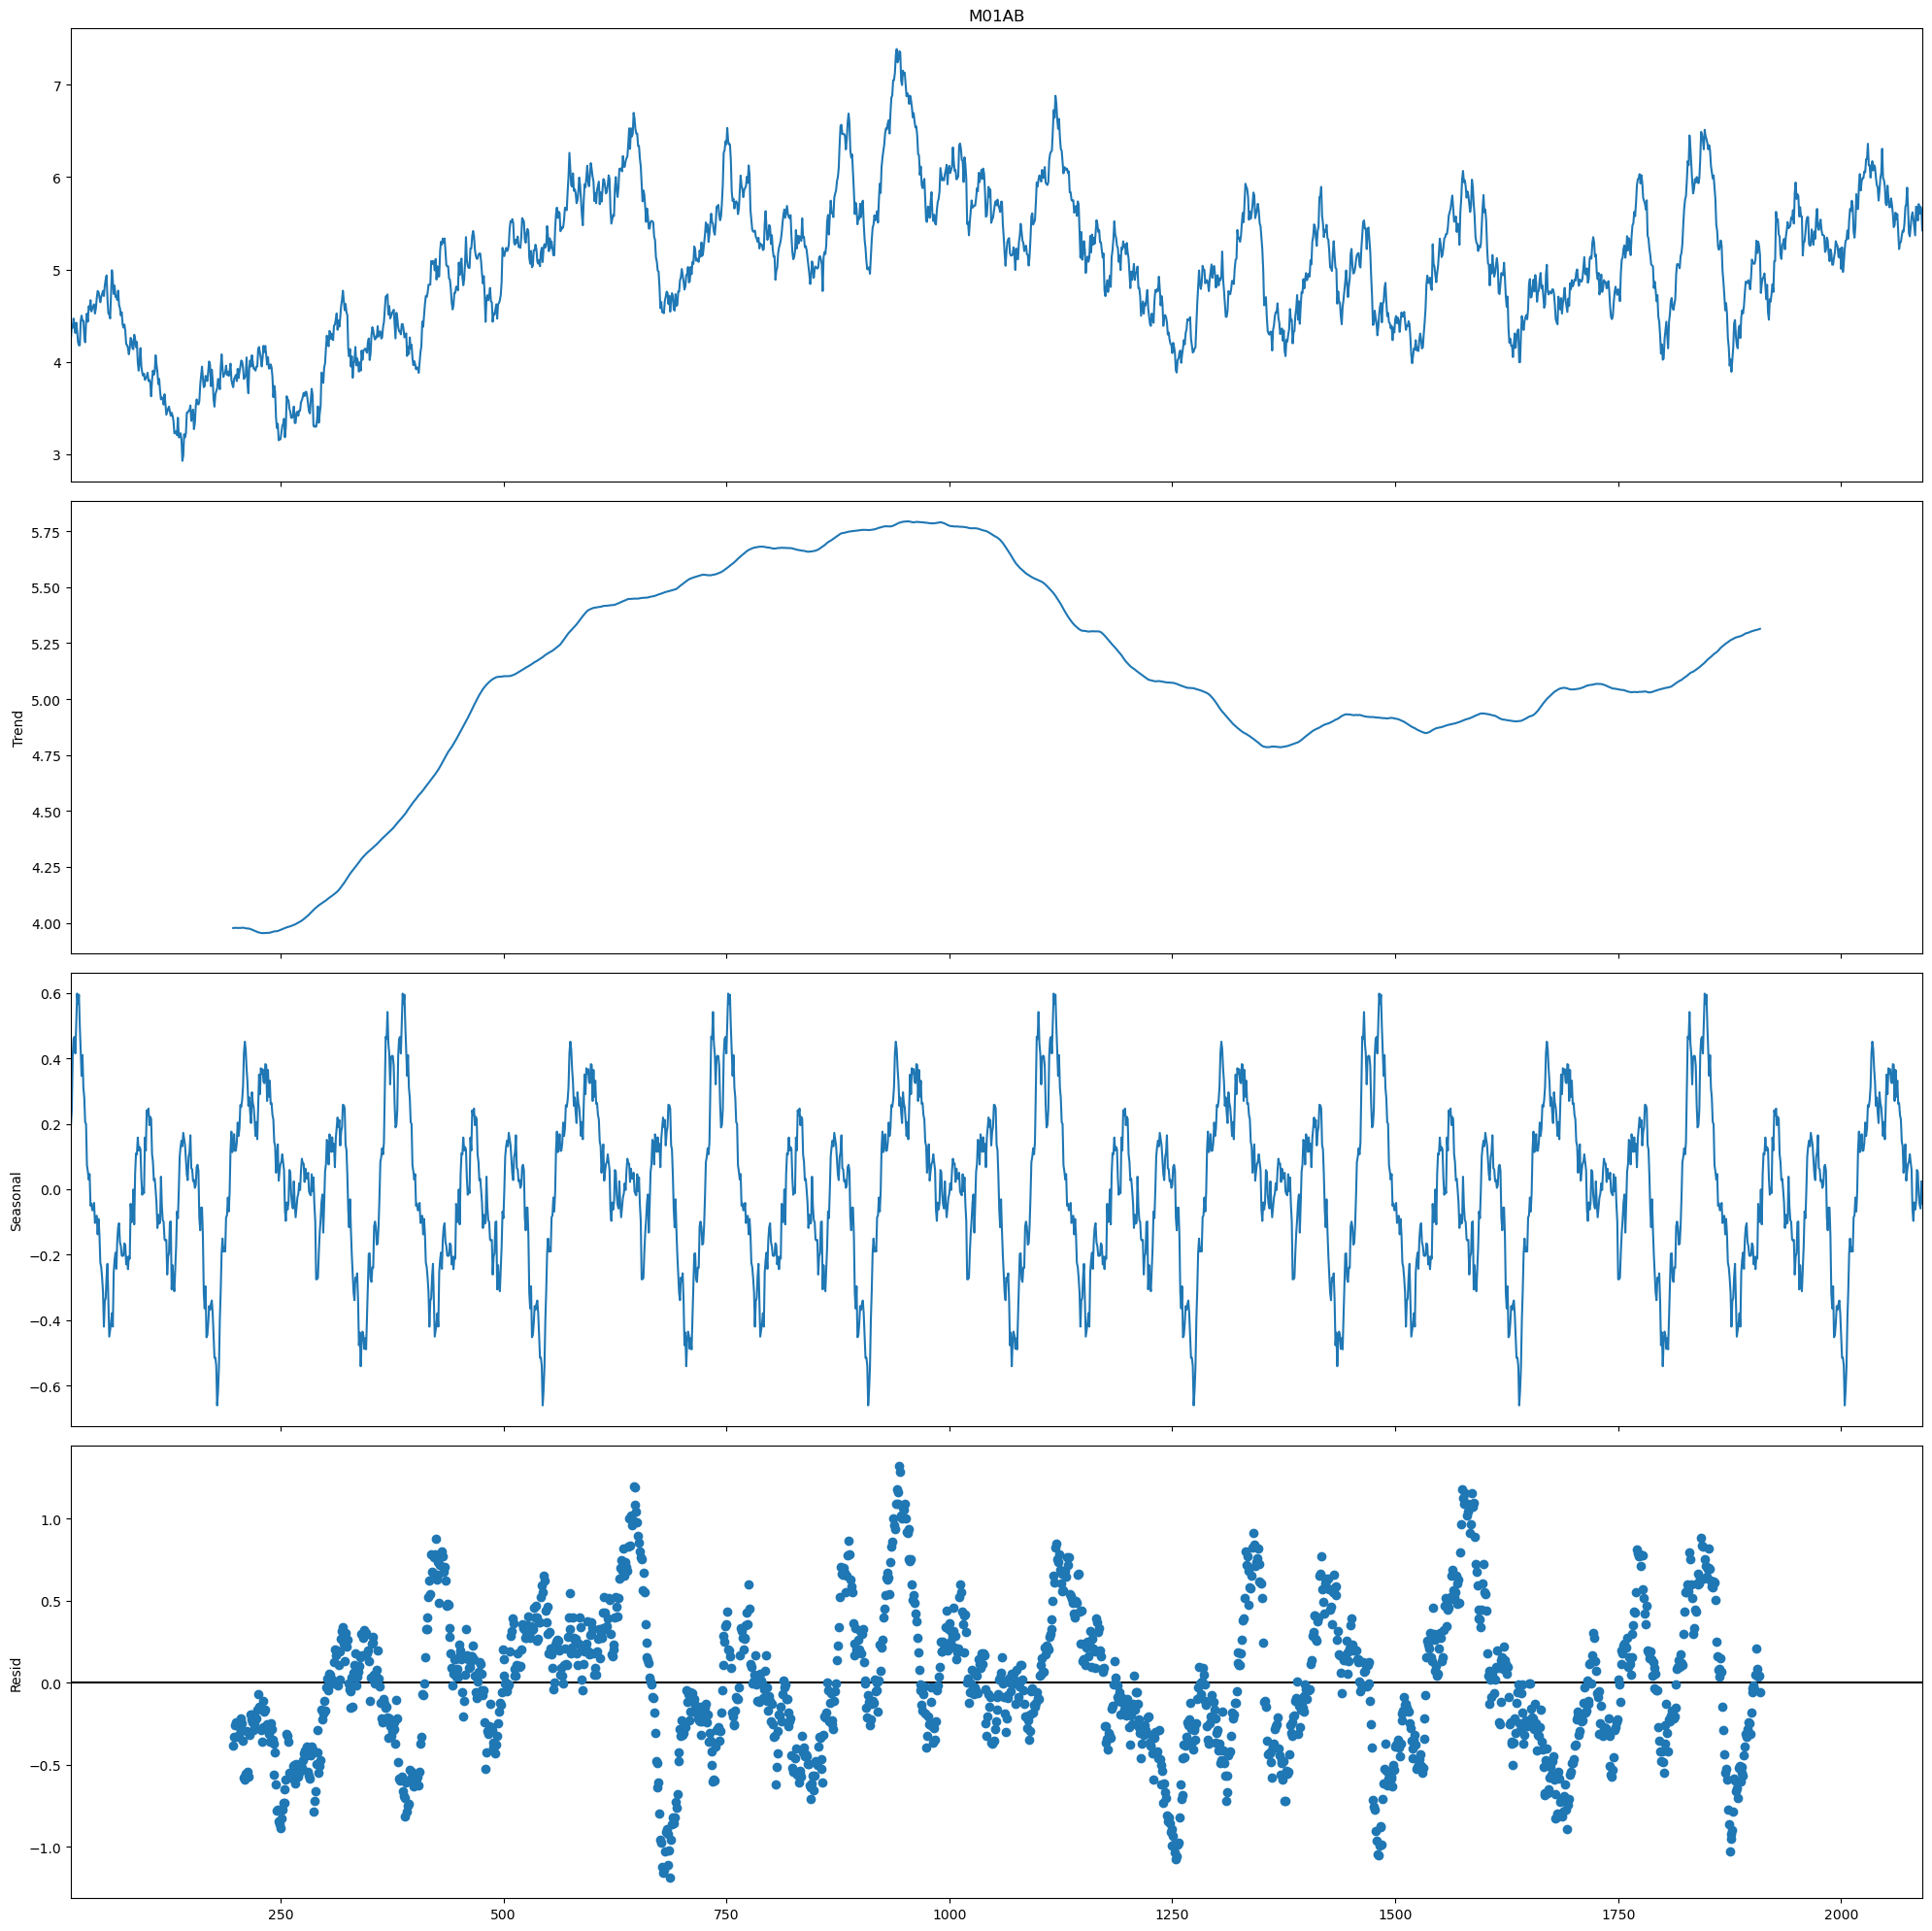

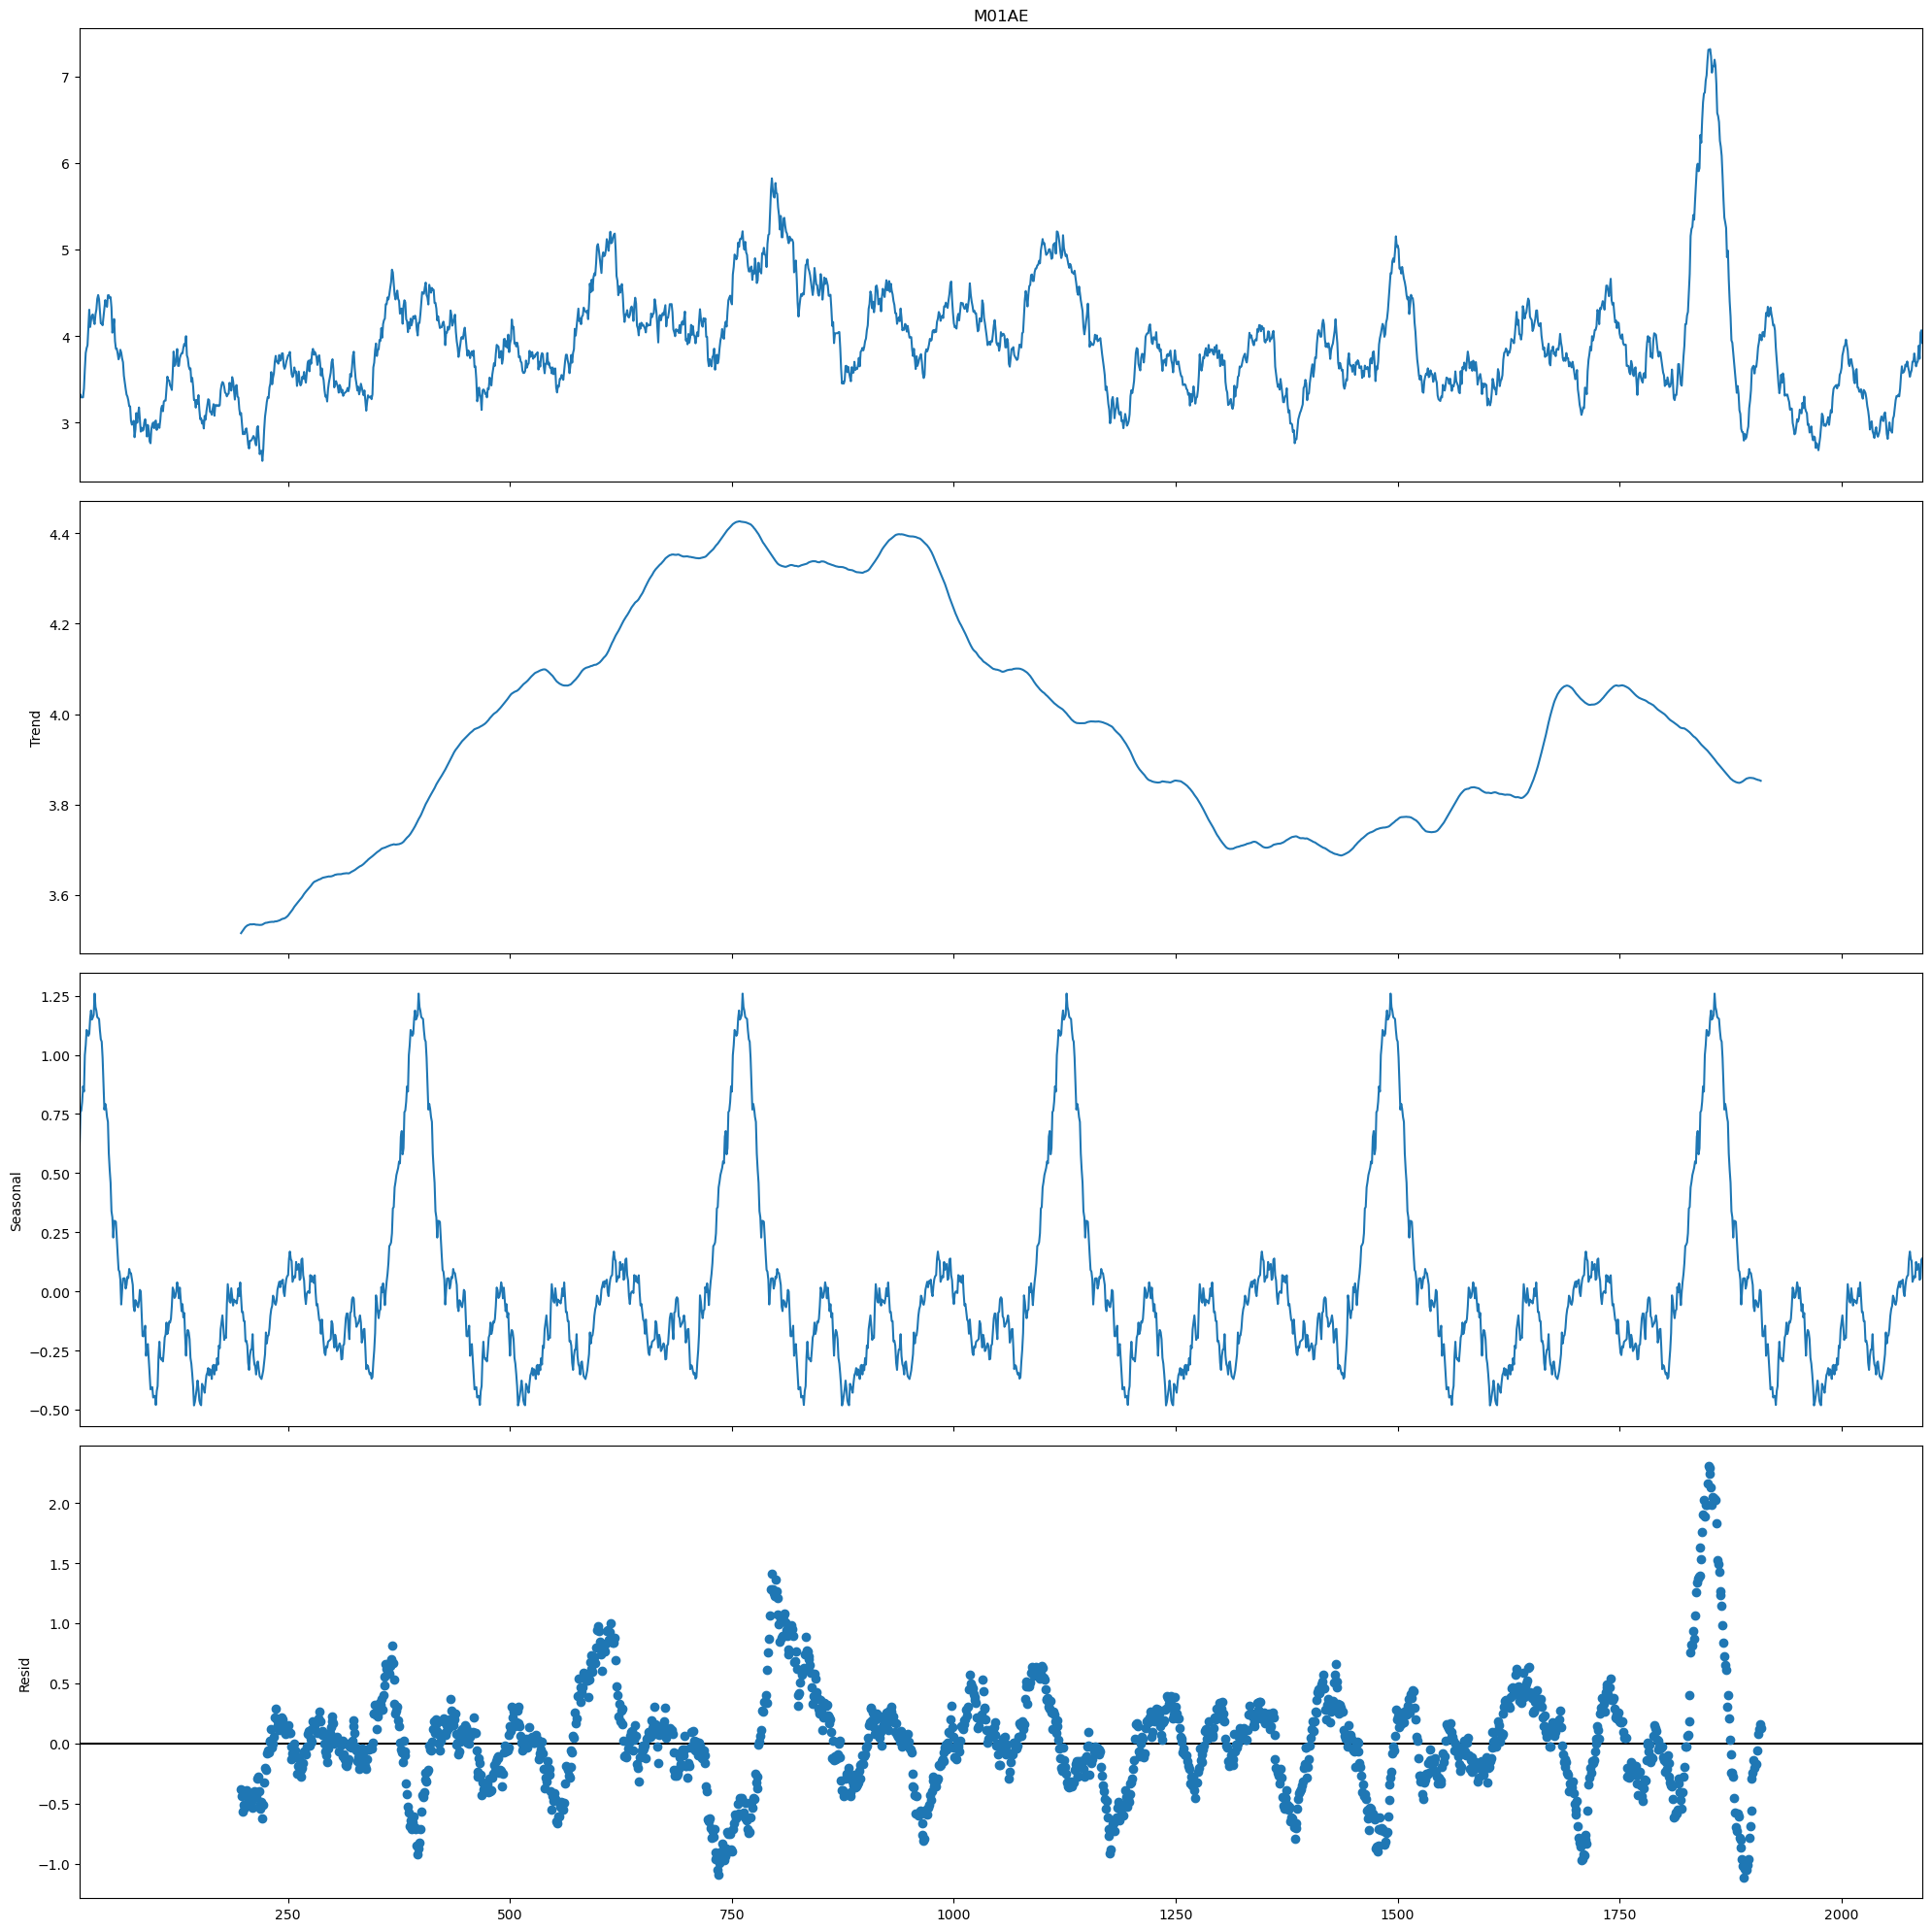

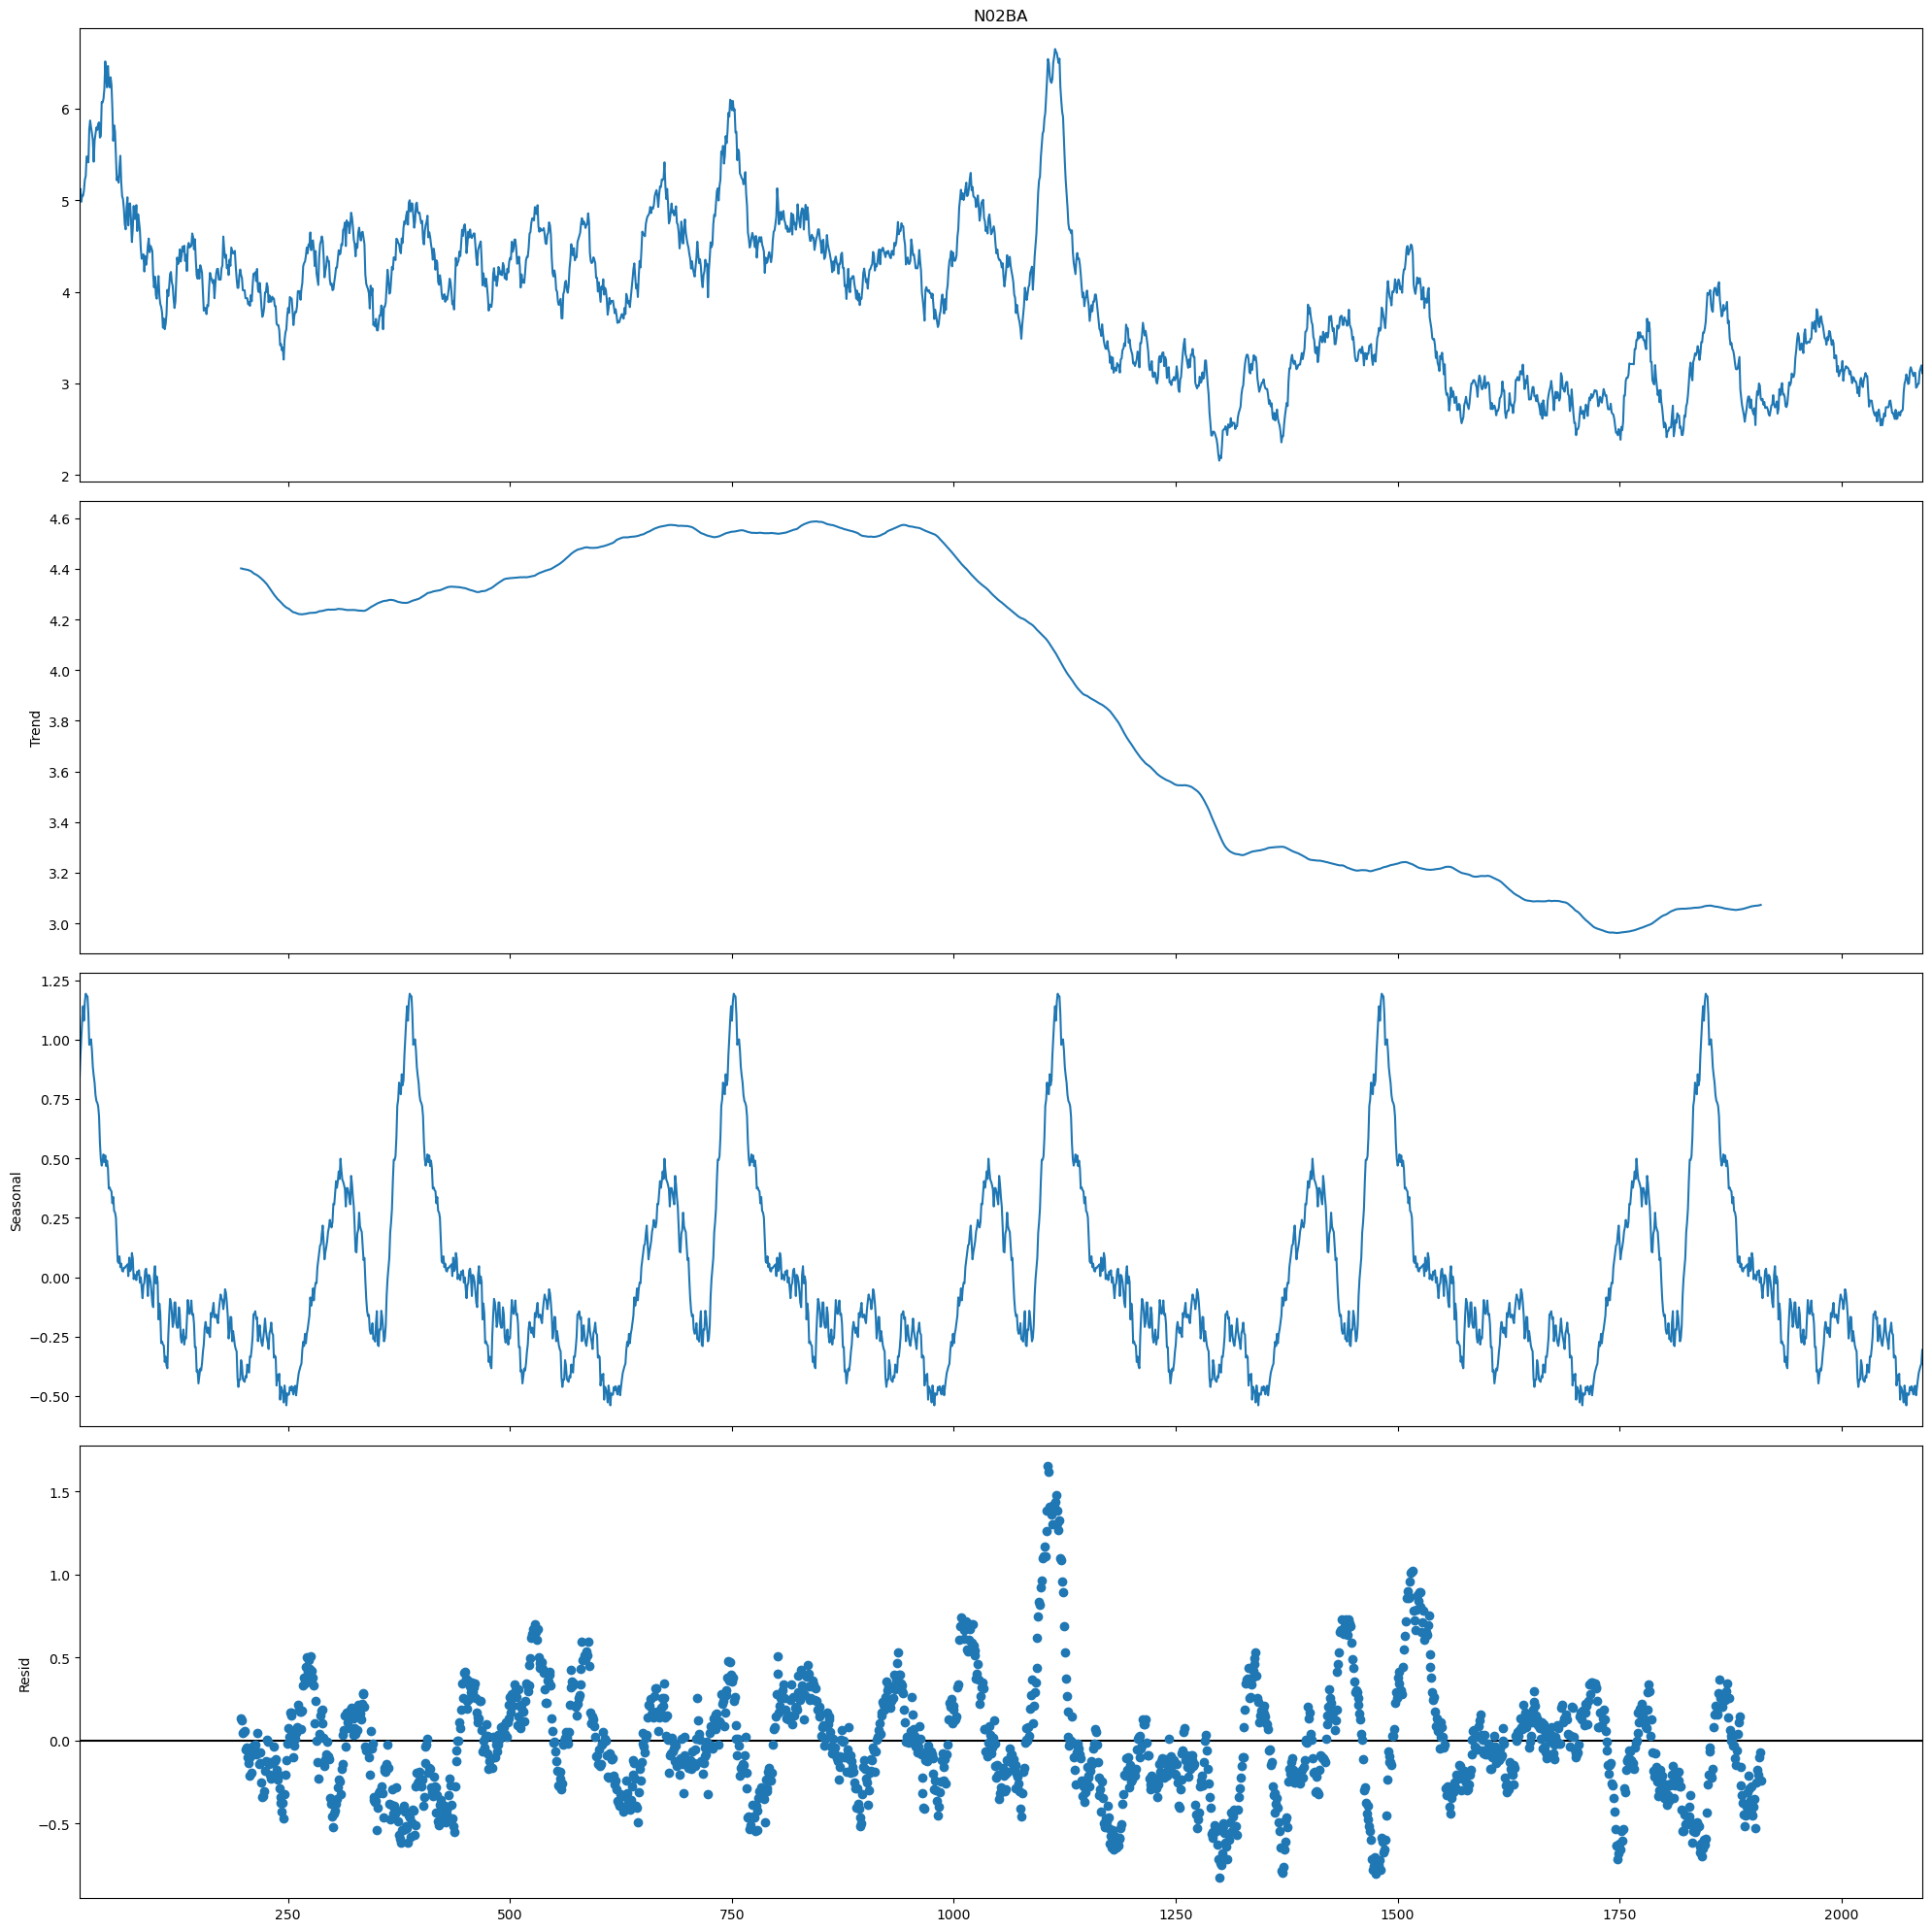

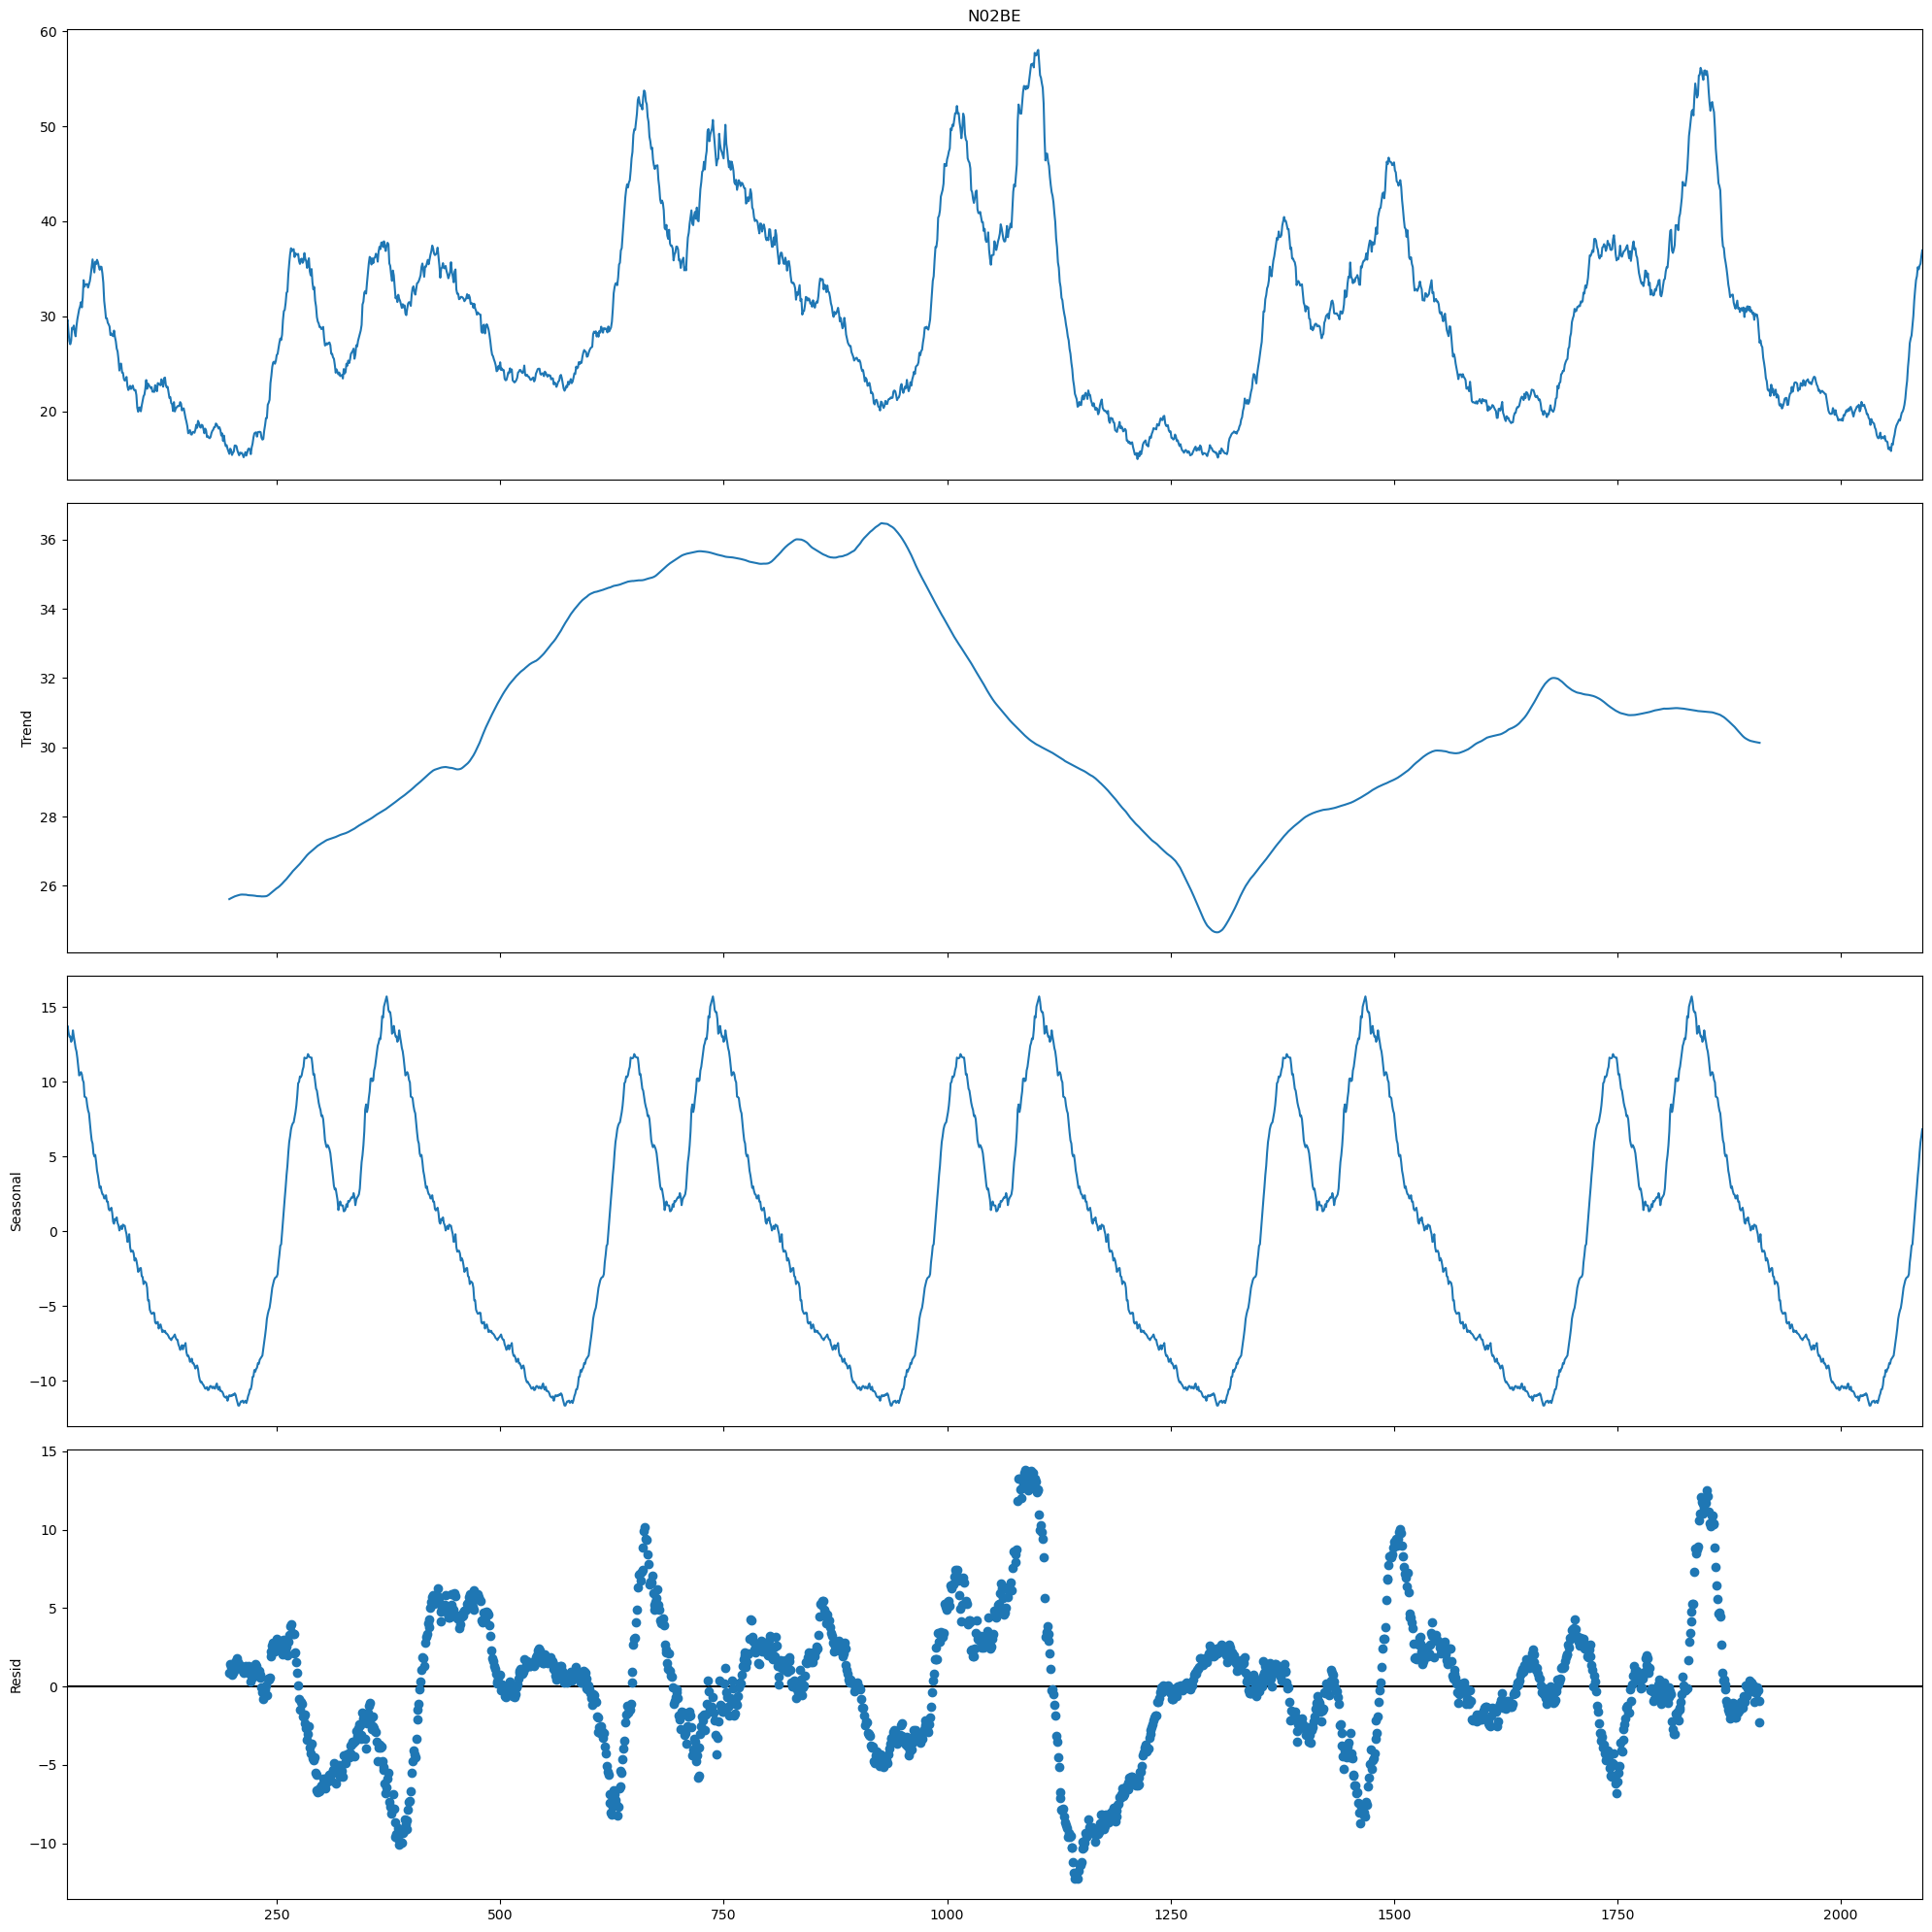

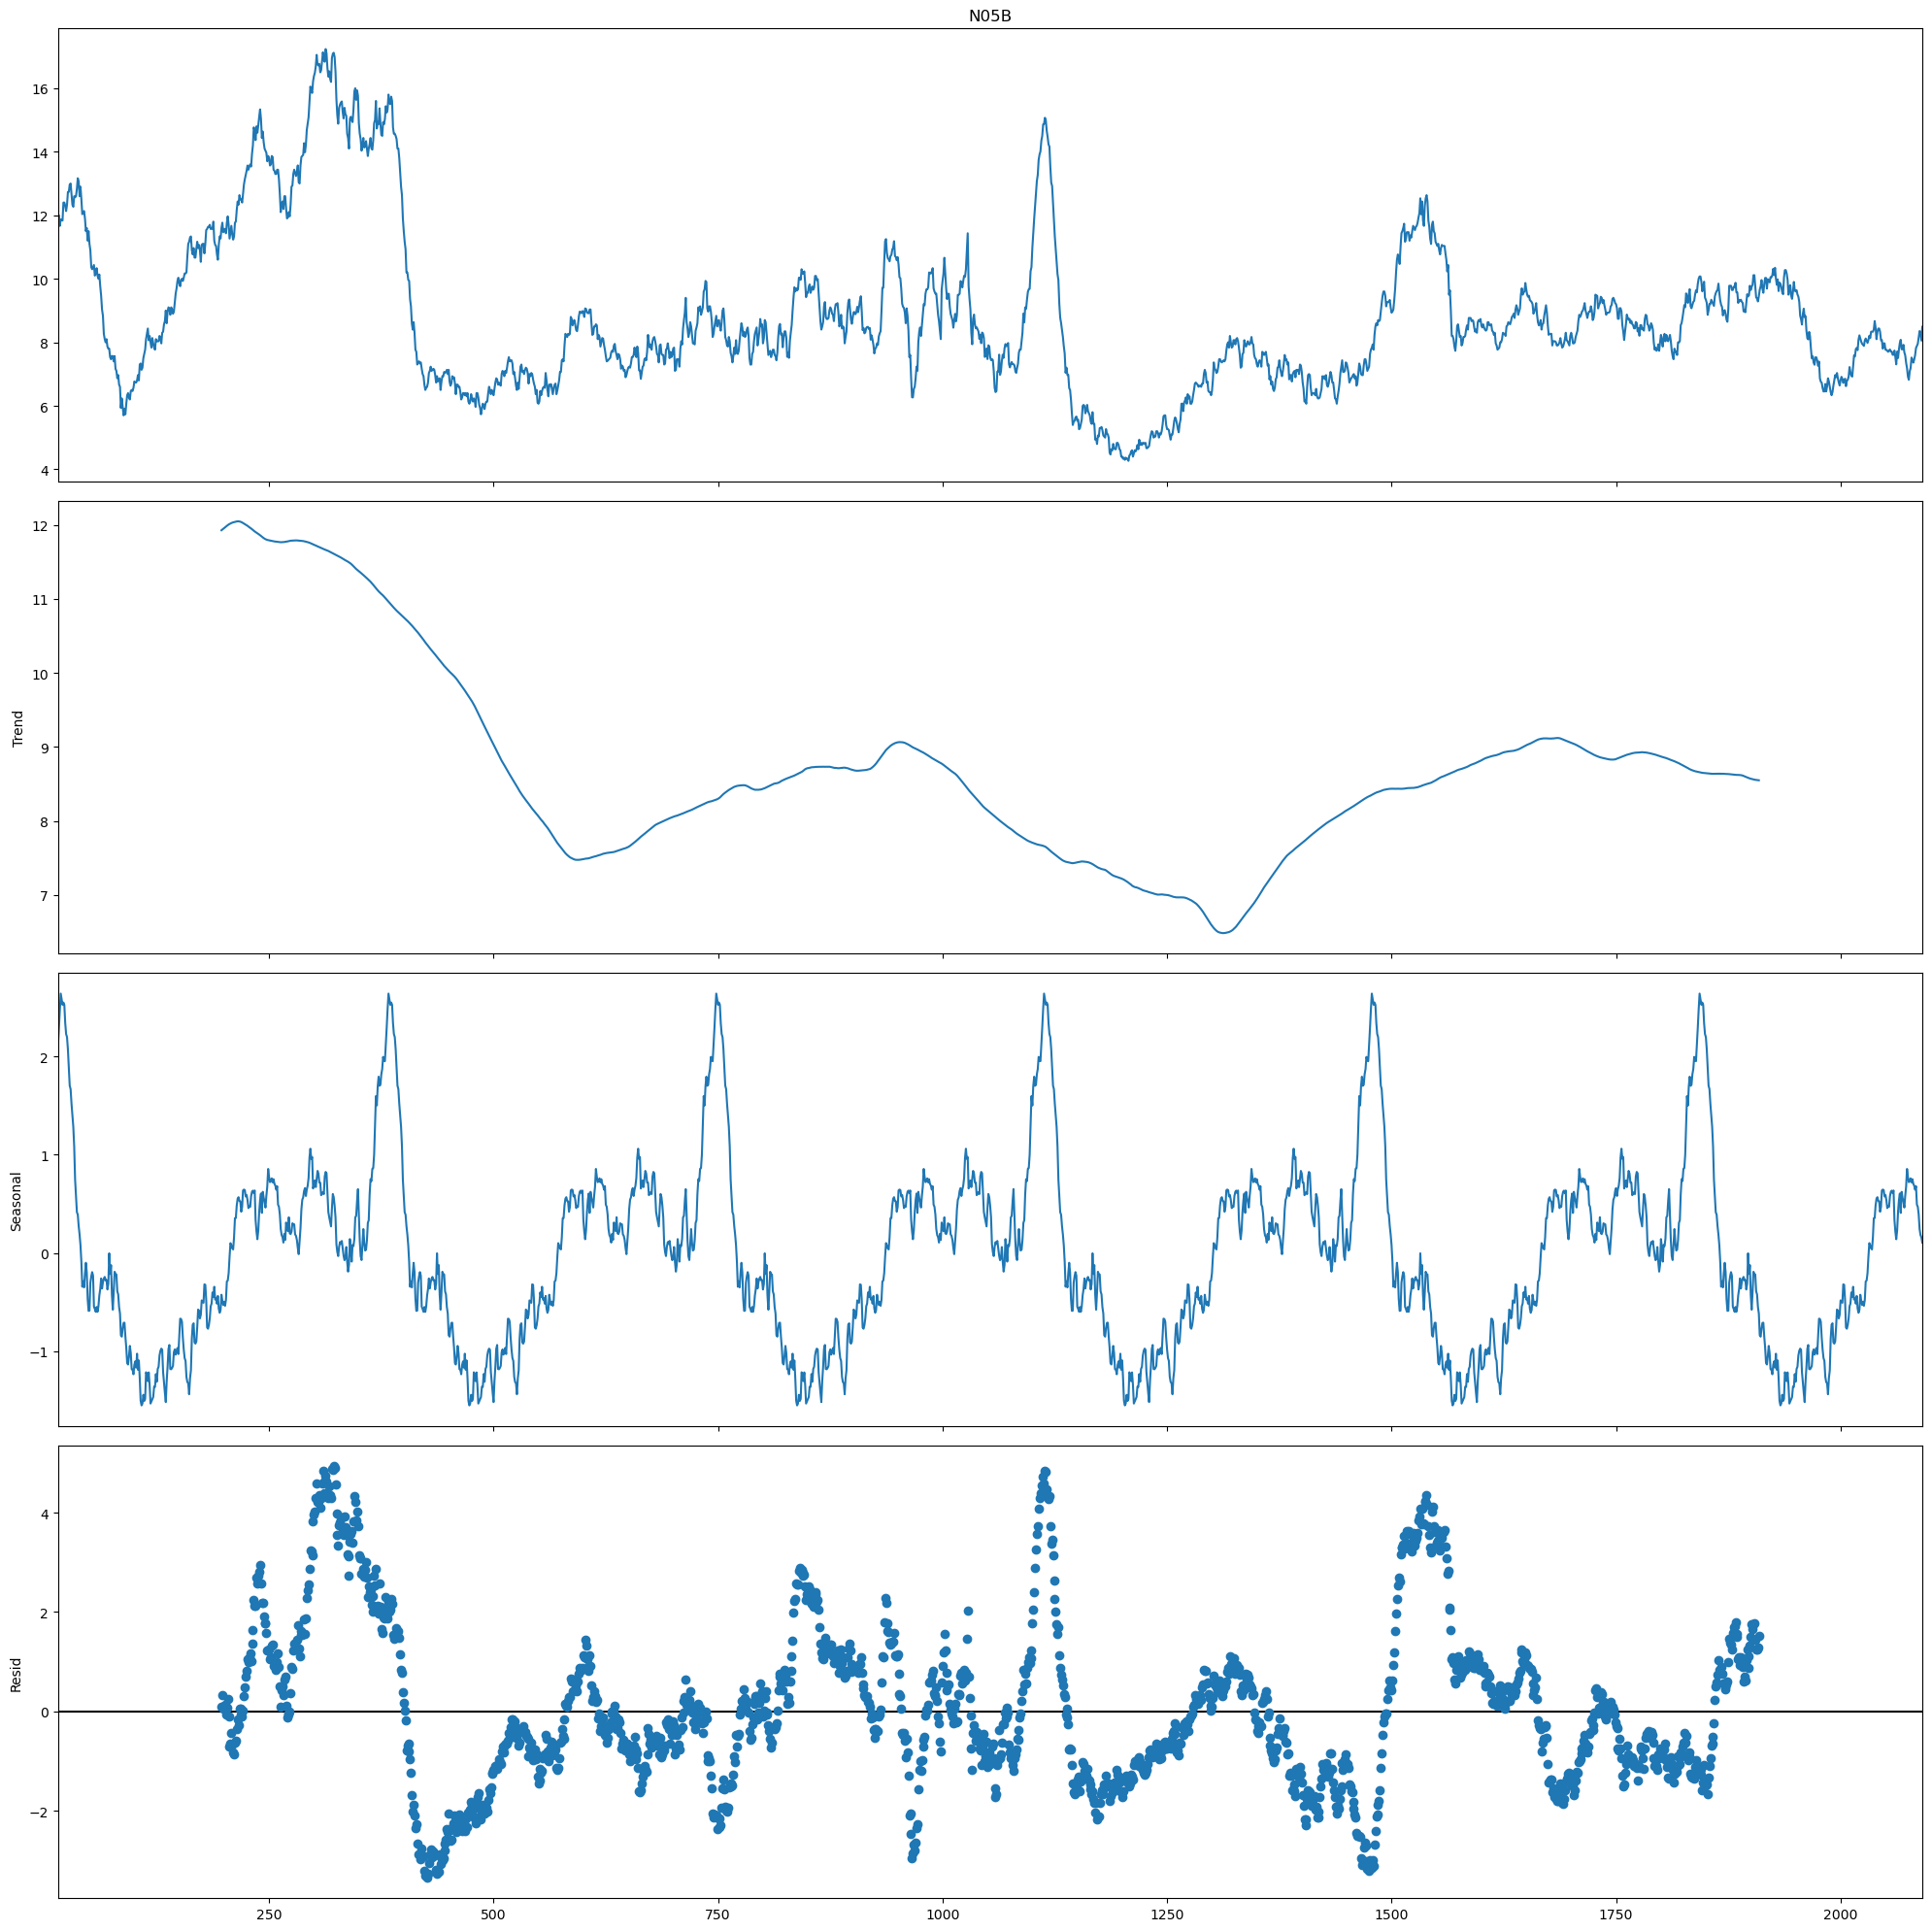

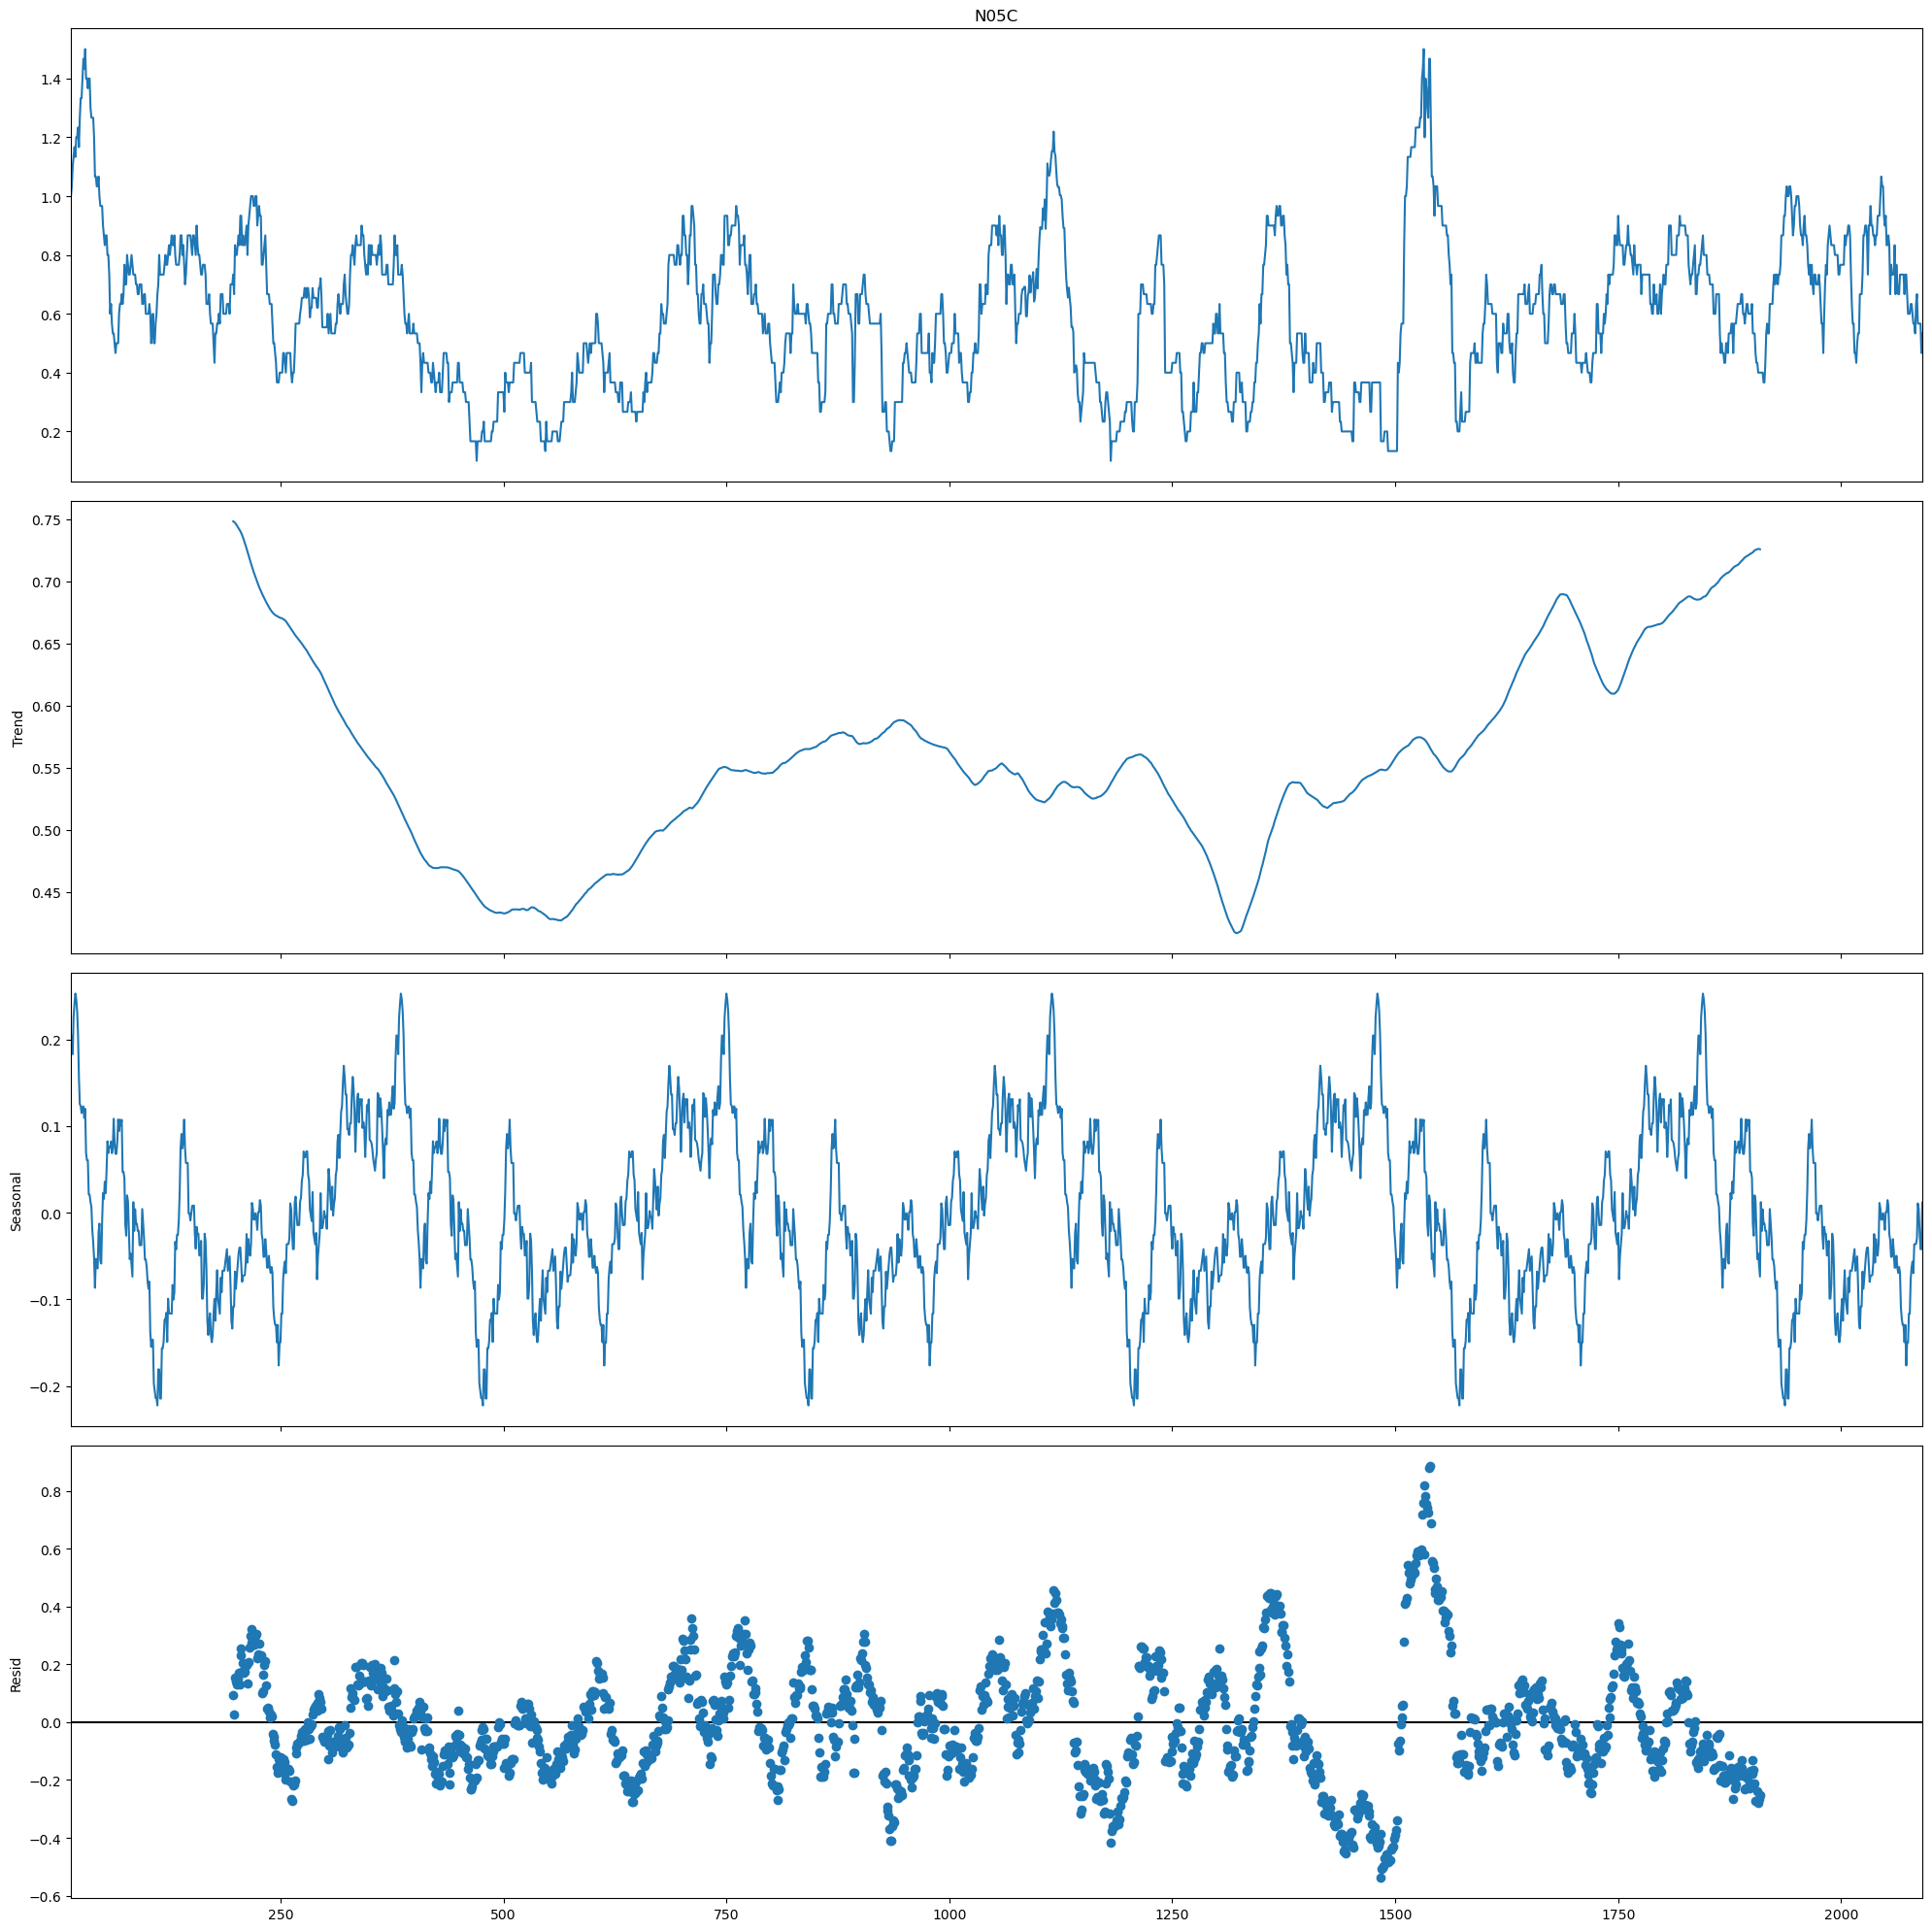

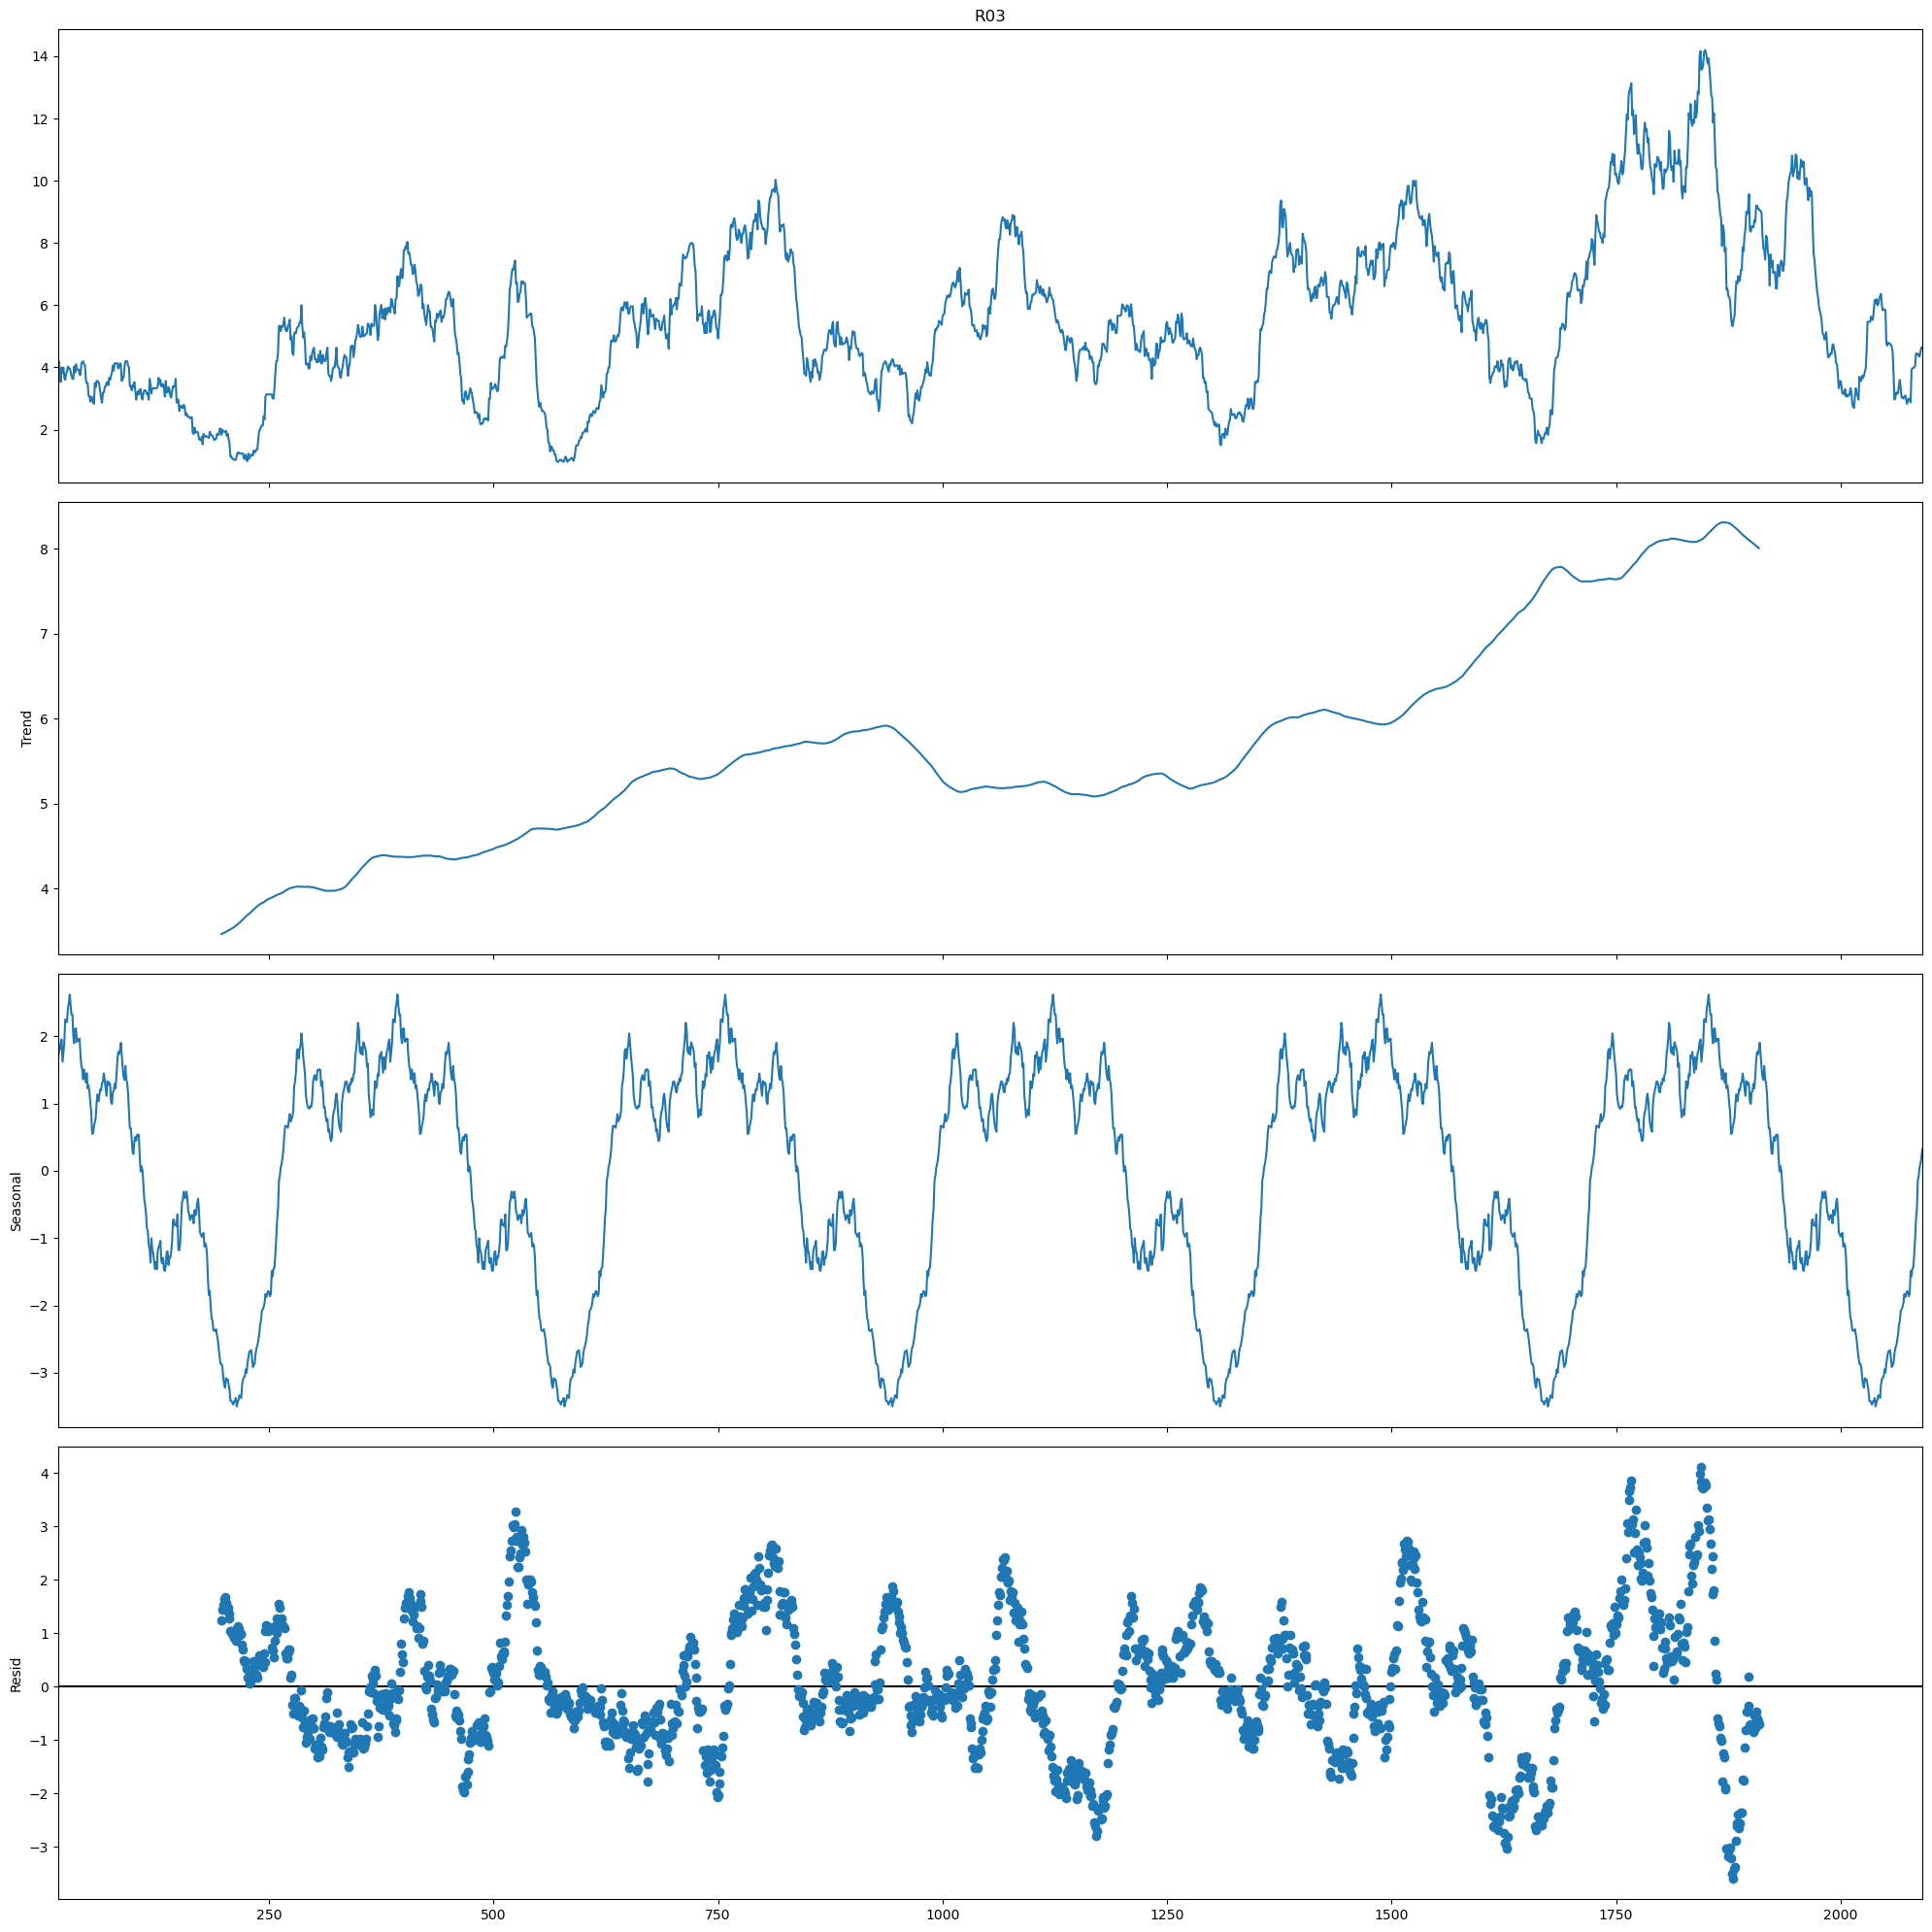

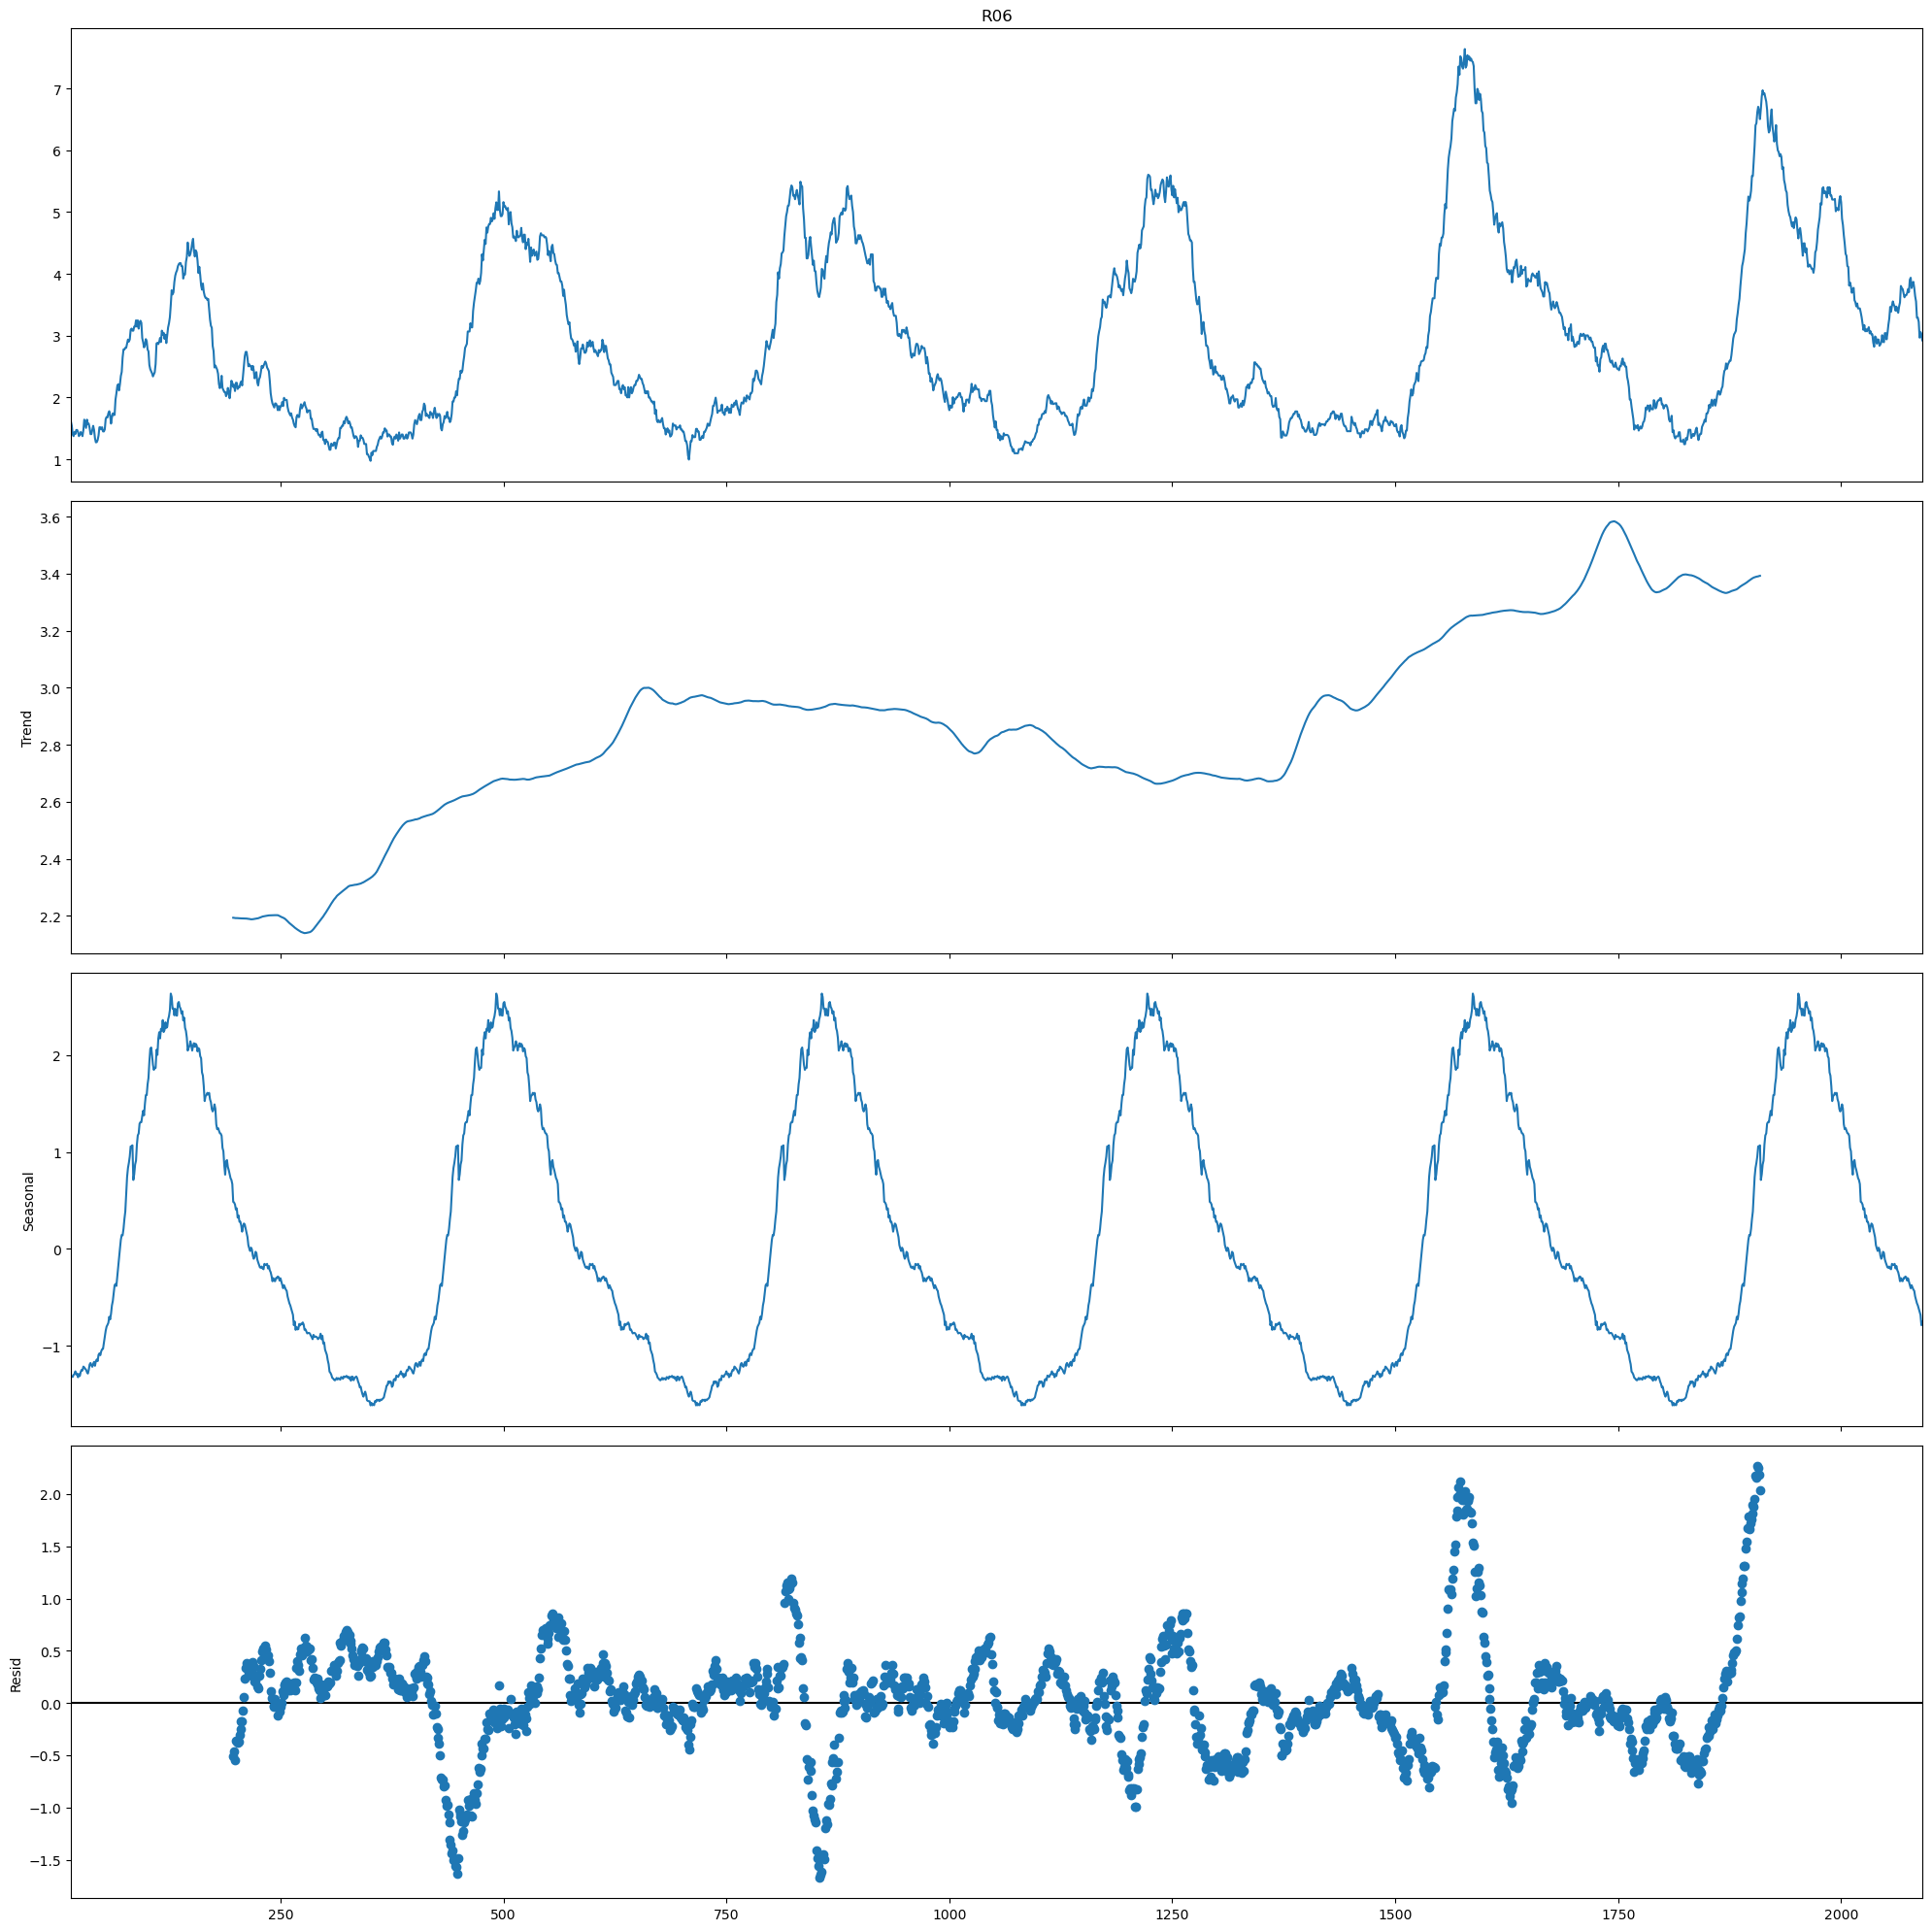

In [4]:
# Decomposition based on 30 day rolling means

drugs = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']

for drug in drugs:
    result = seasonal_decompose(daily_df[drug].rolling(window=30, center=True).mean().dropna(), period=365, model='additive')
    plt.rcParams["figure.figsize"] = (20,20)
    result.plot()
    plt.show()

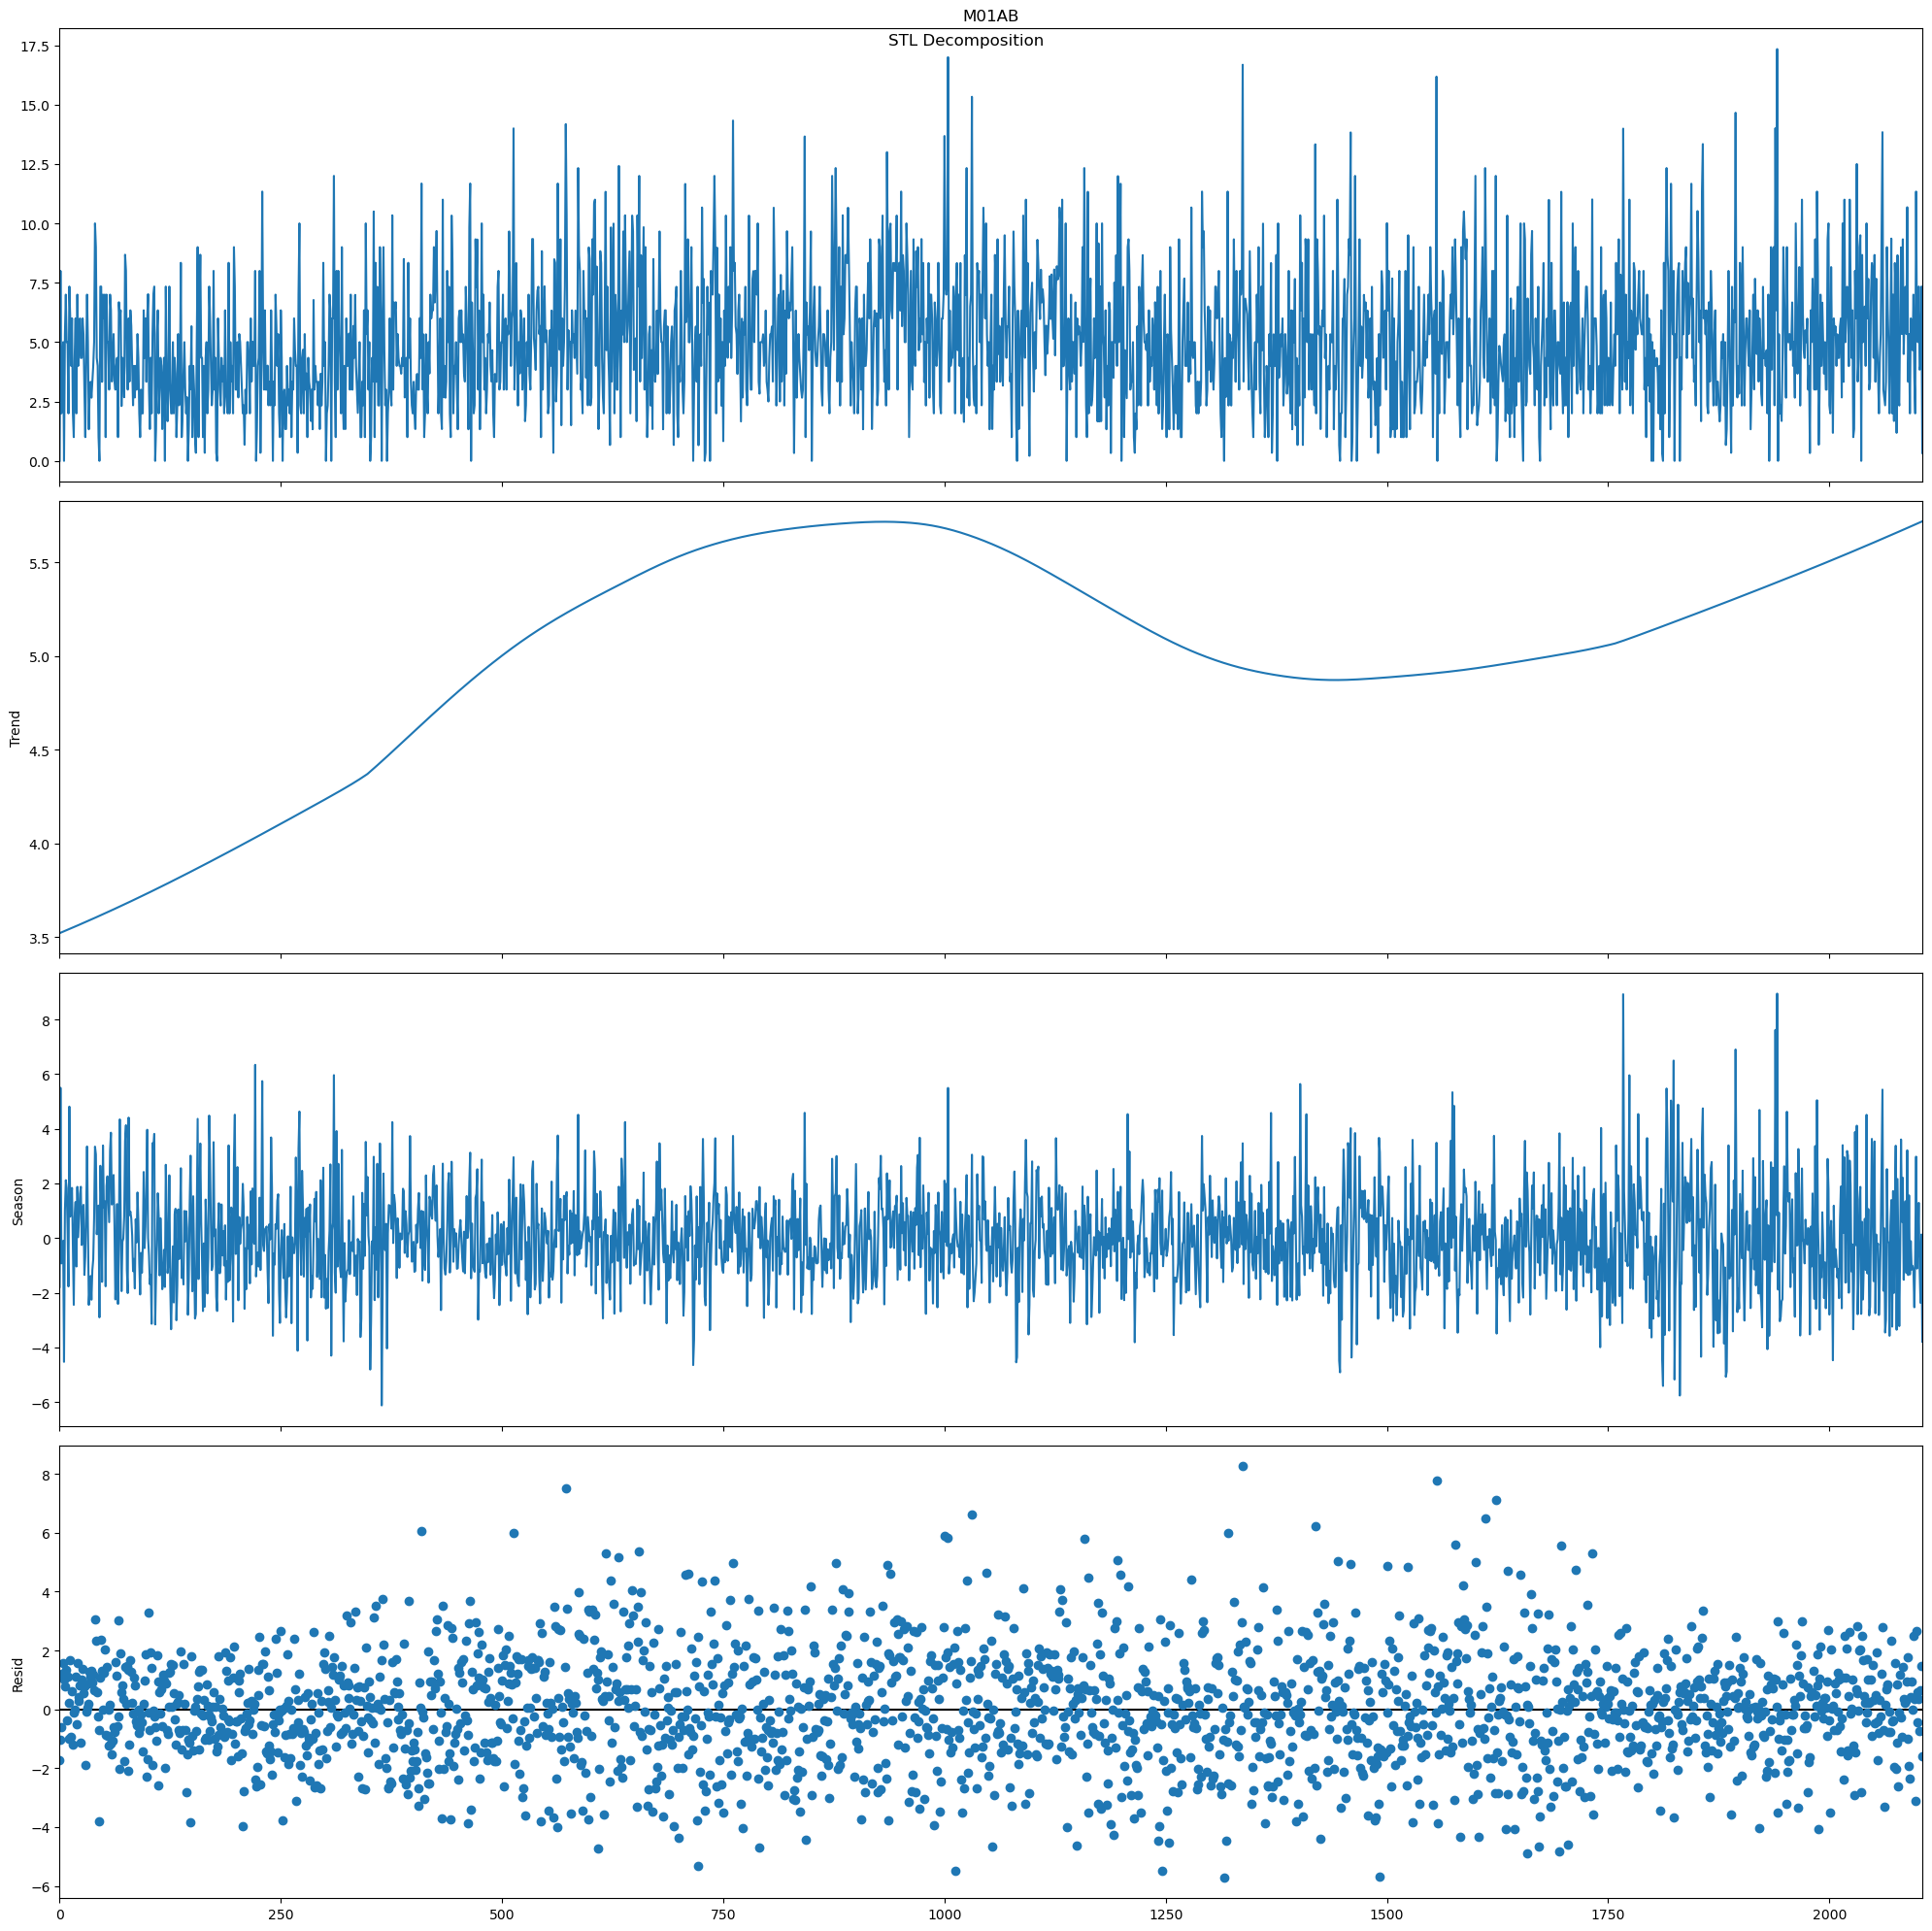

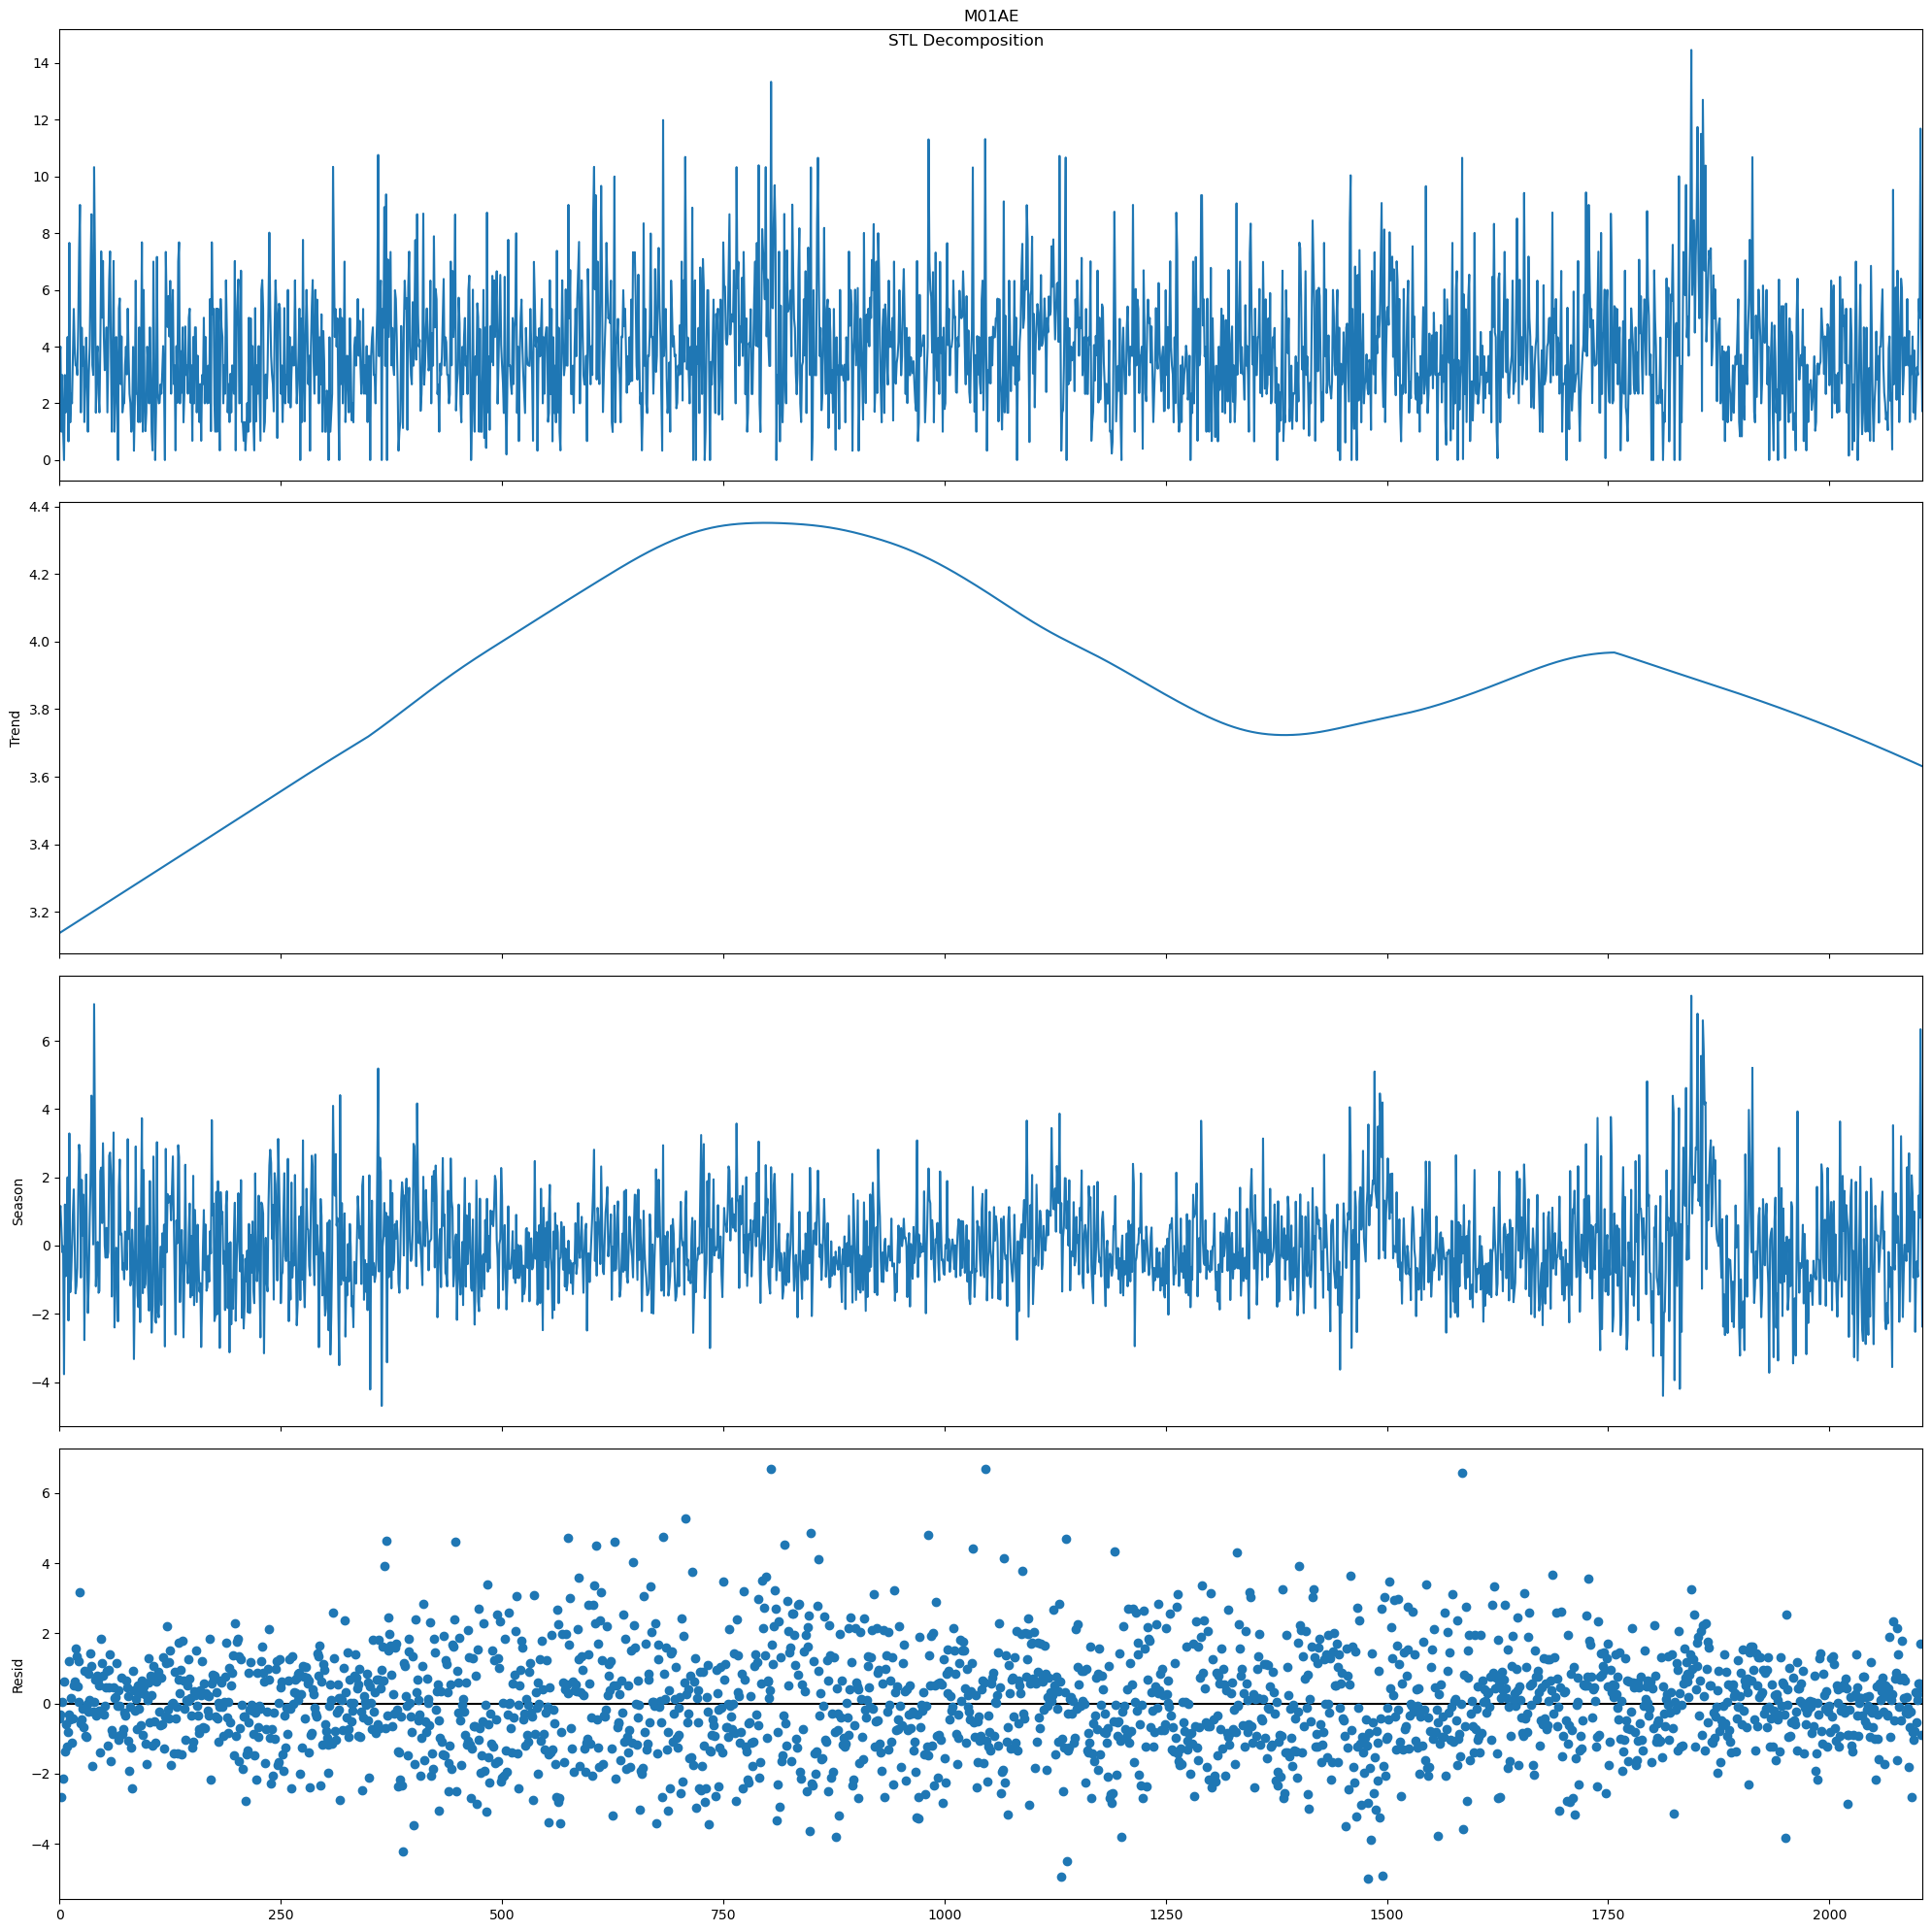

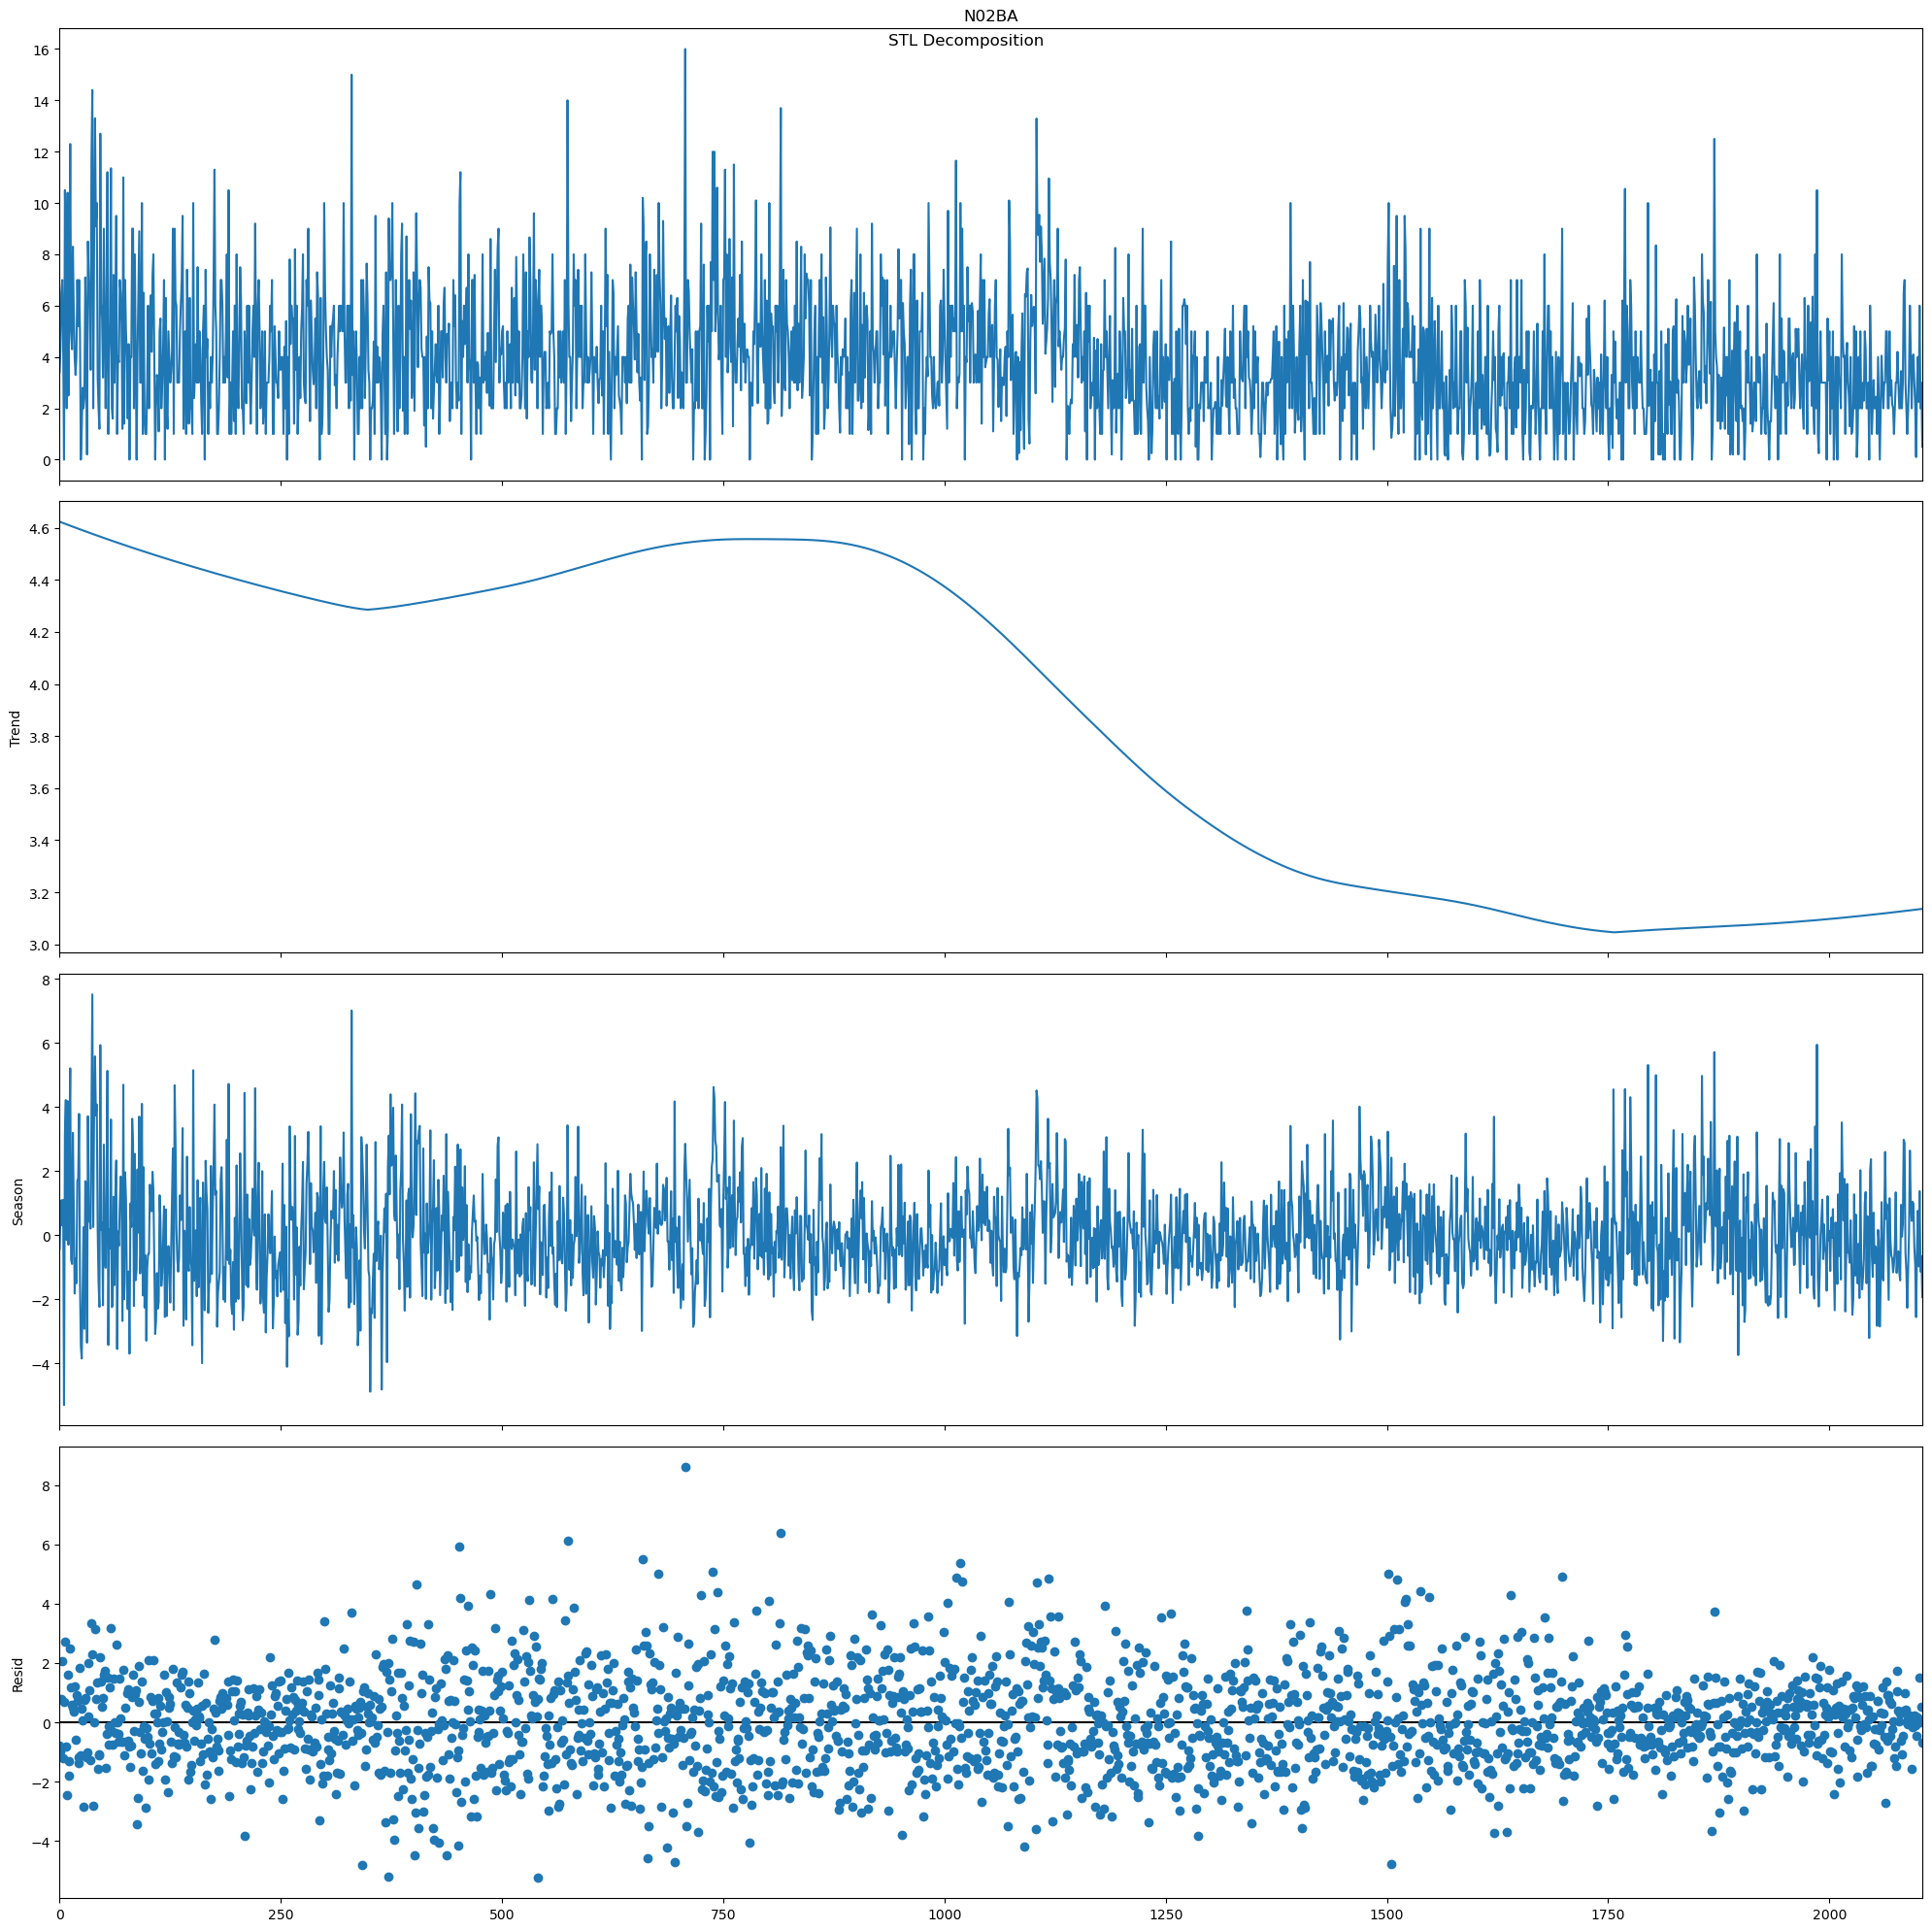

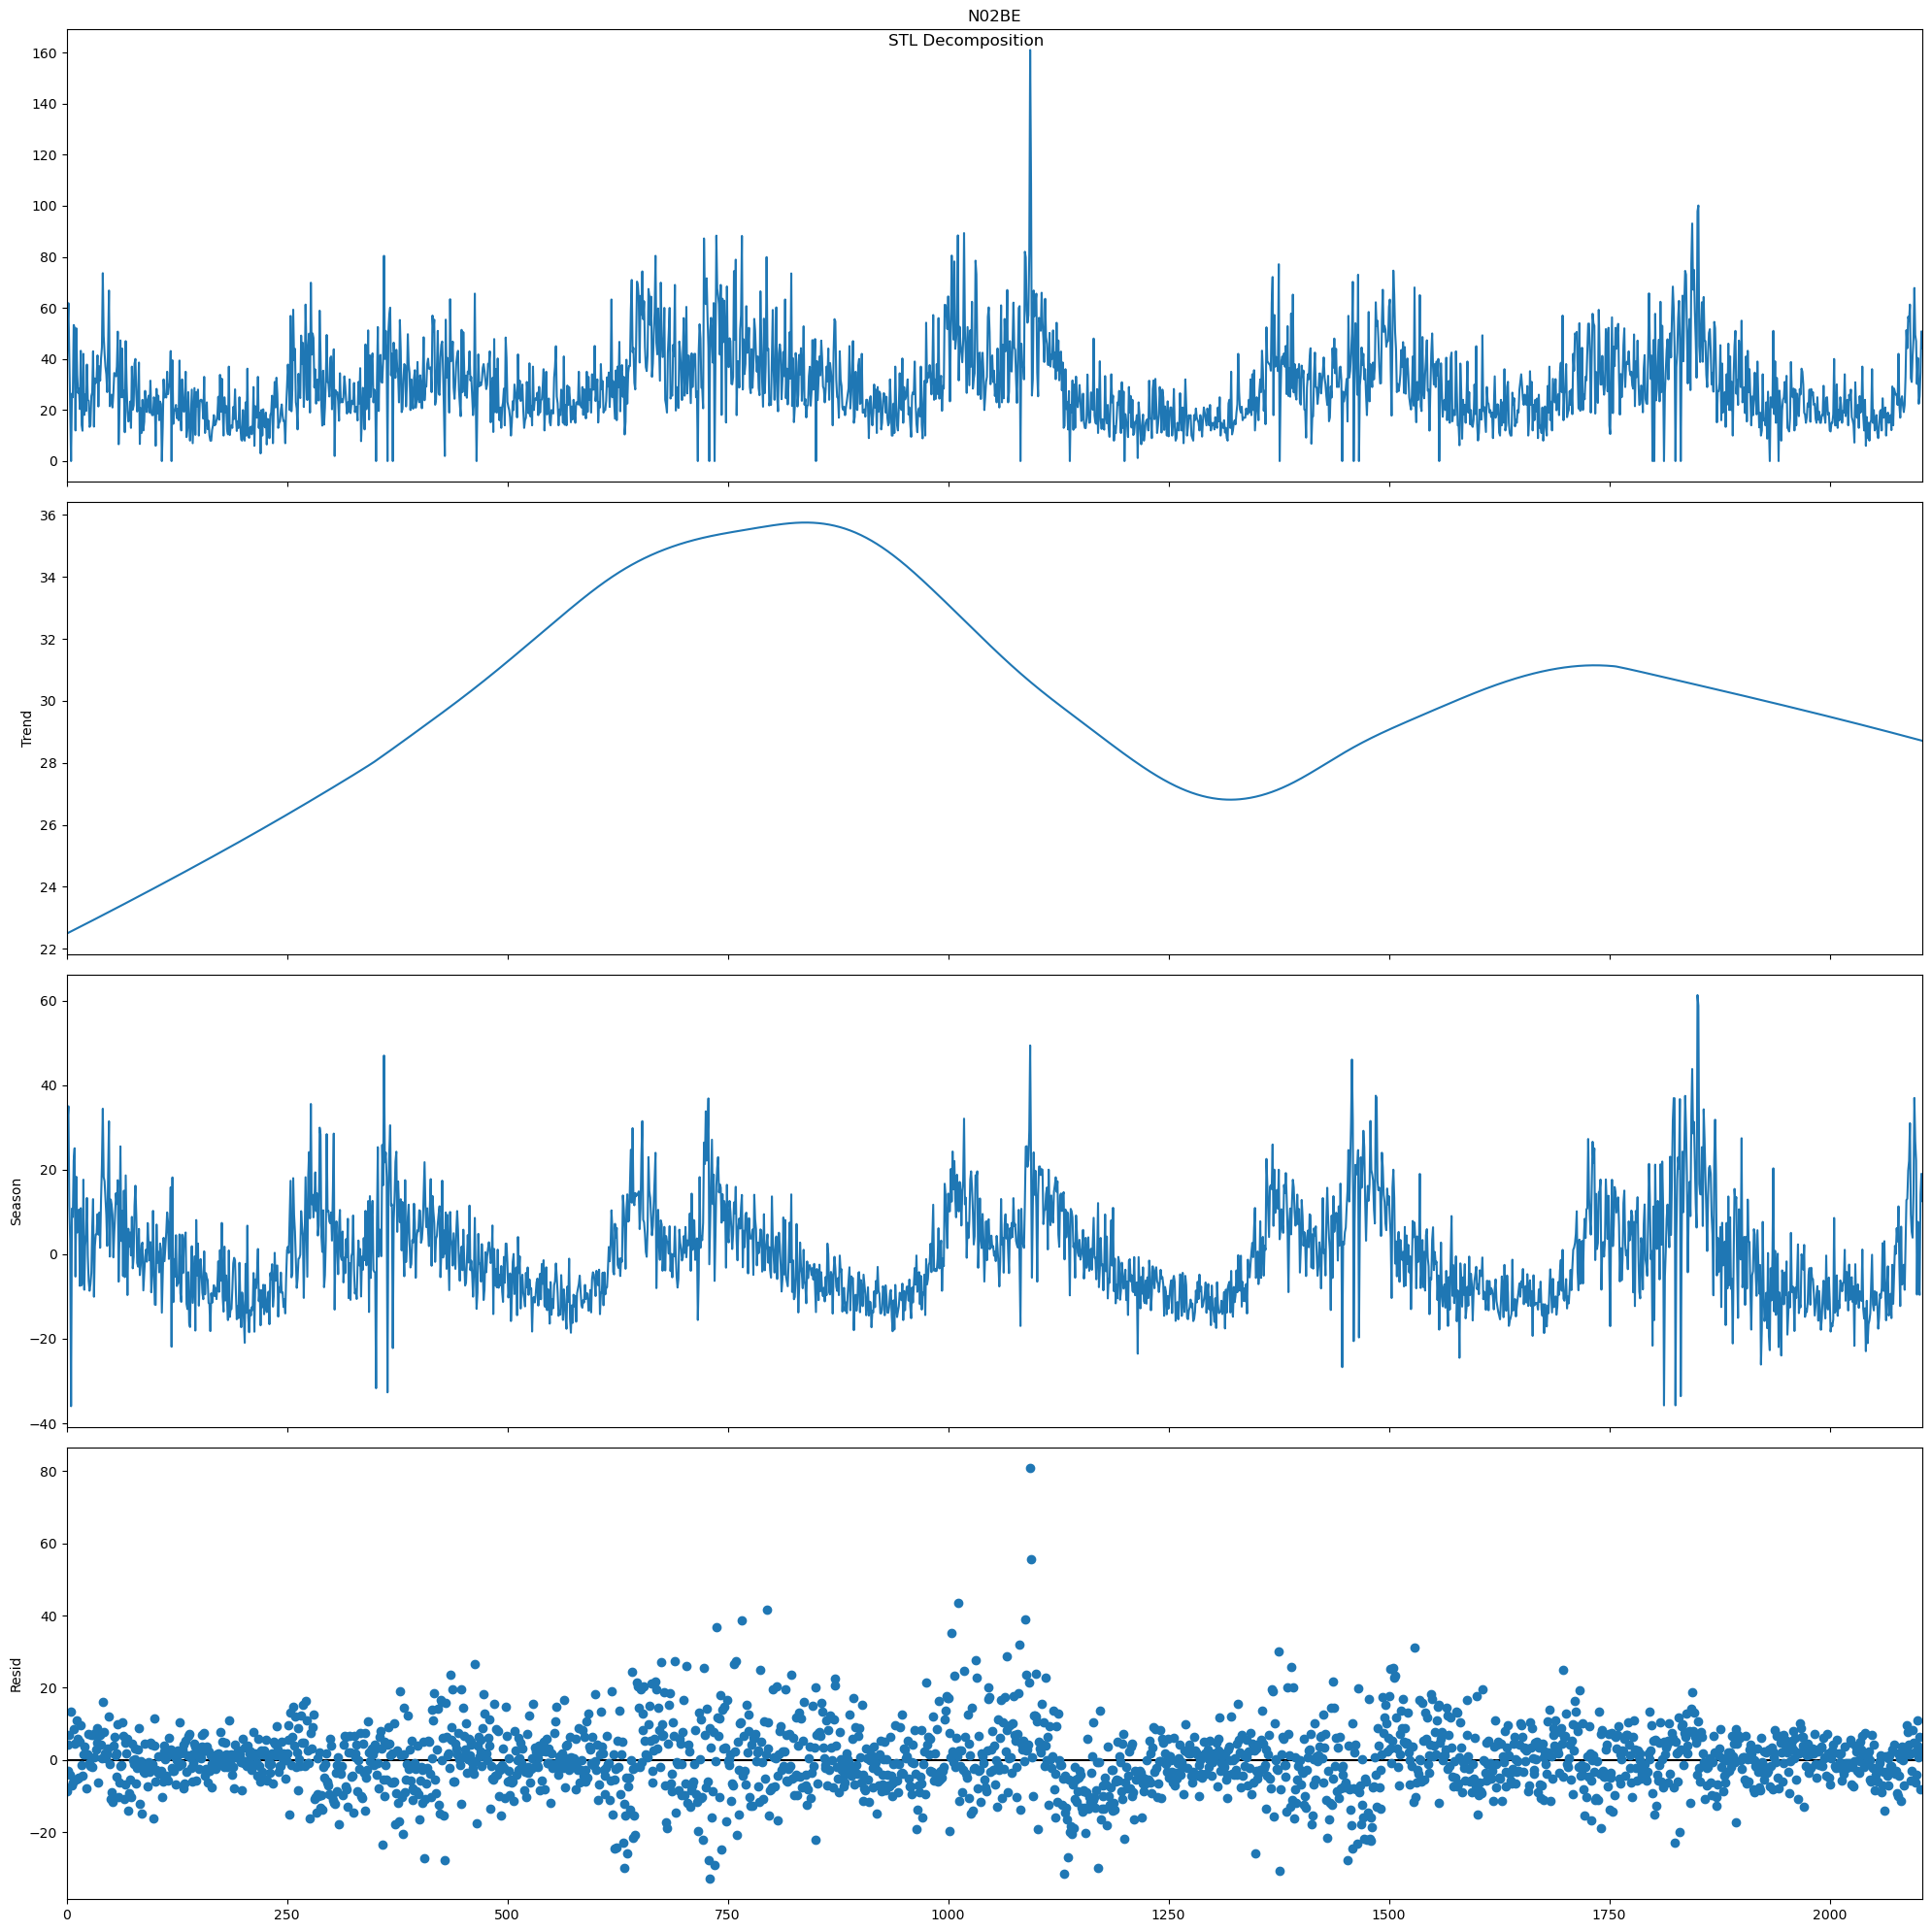

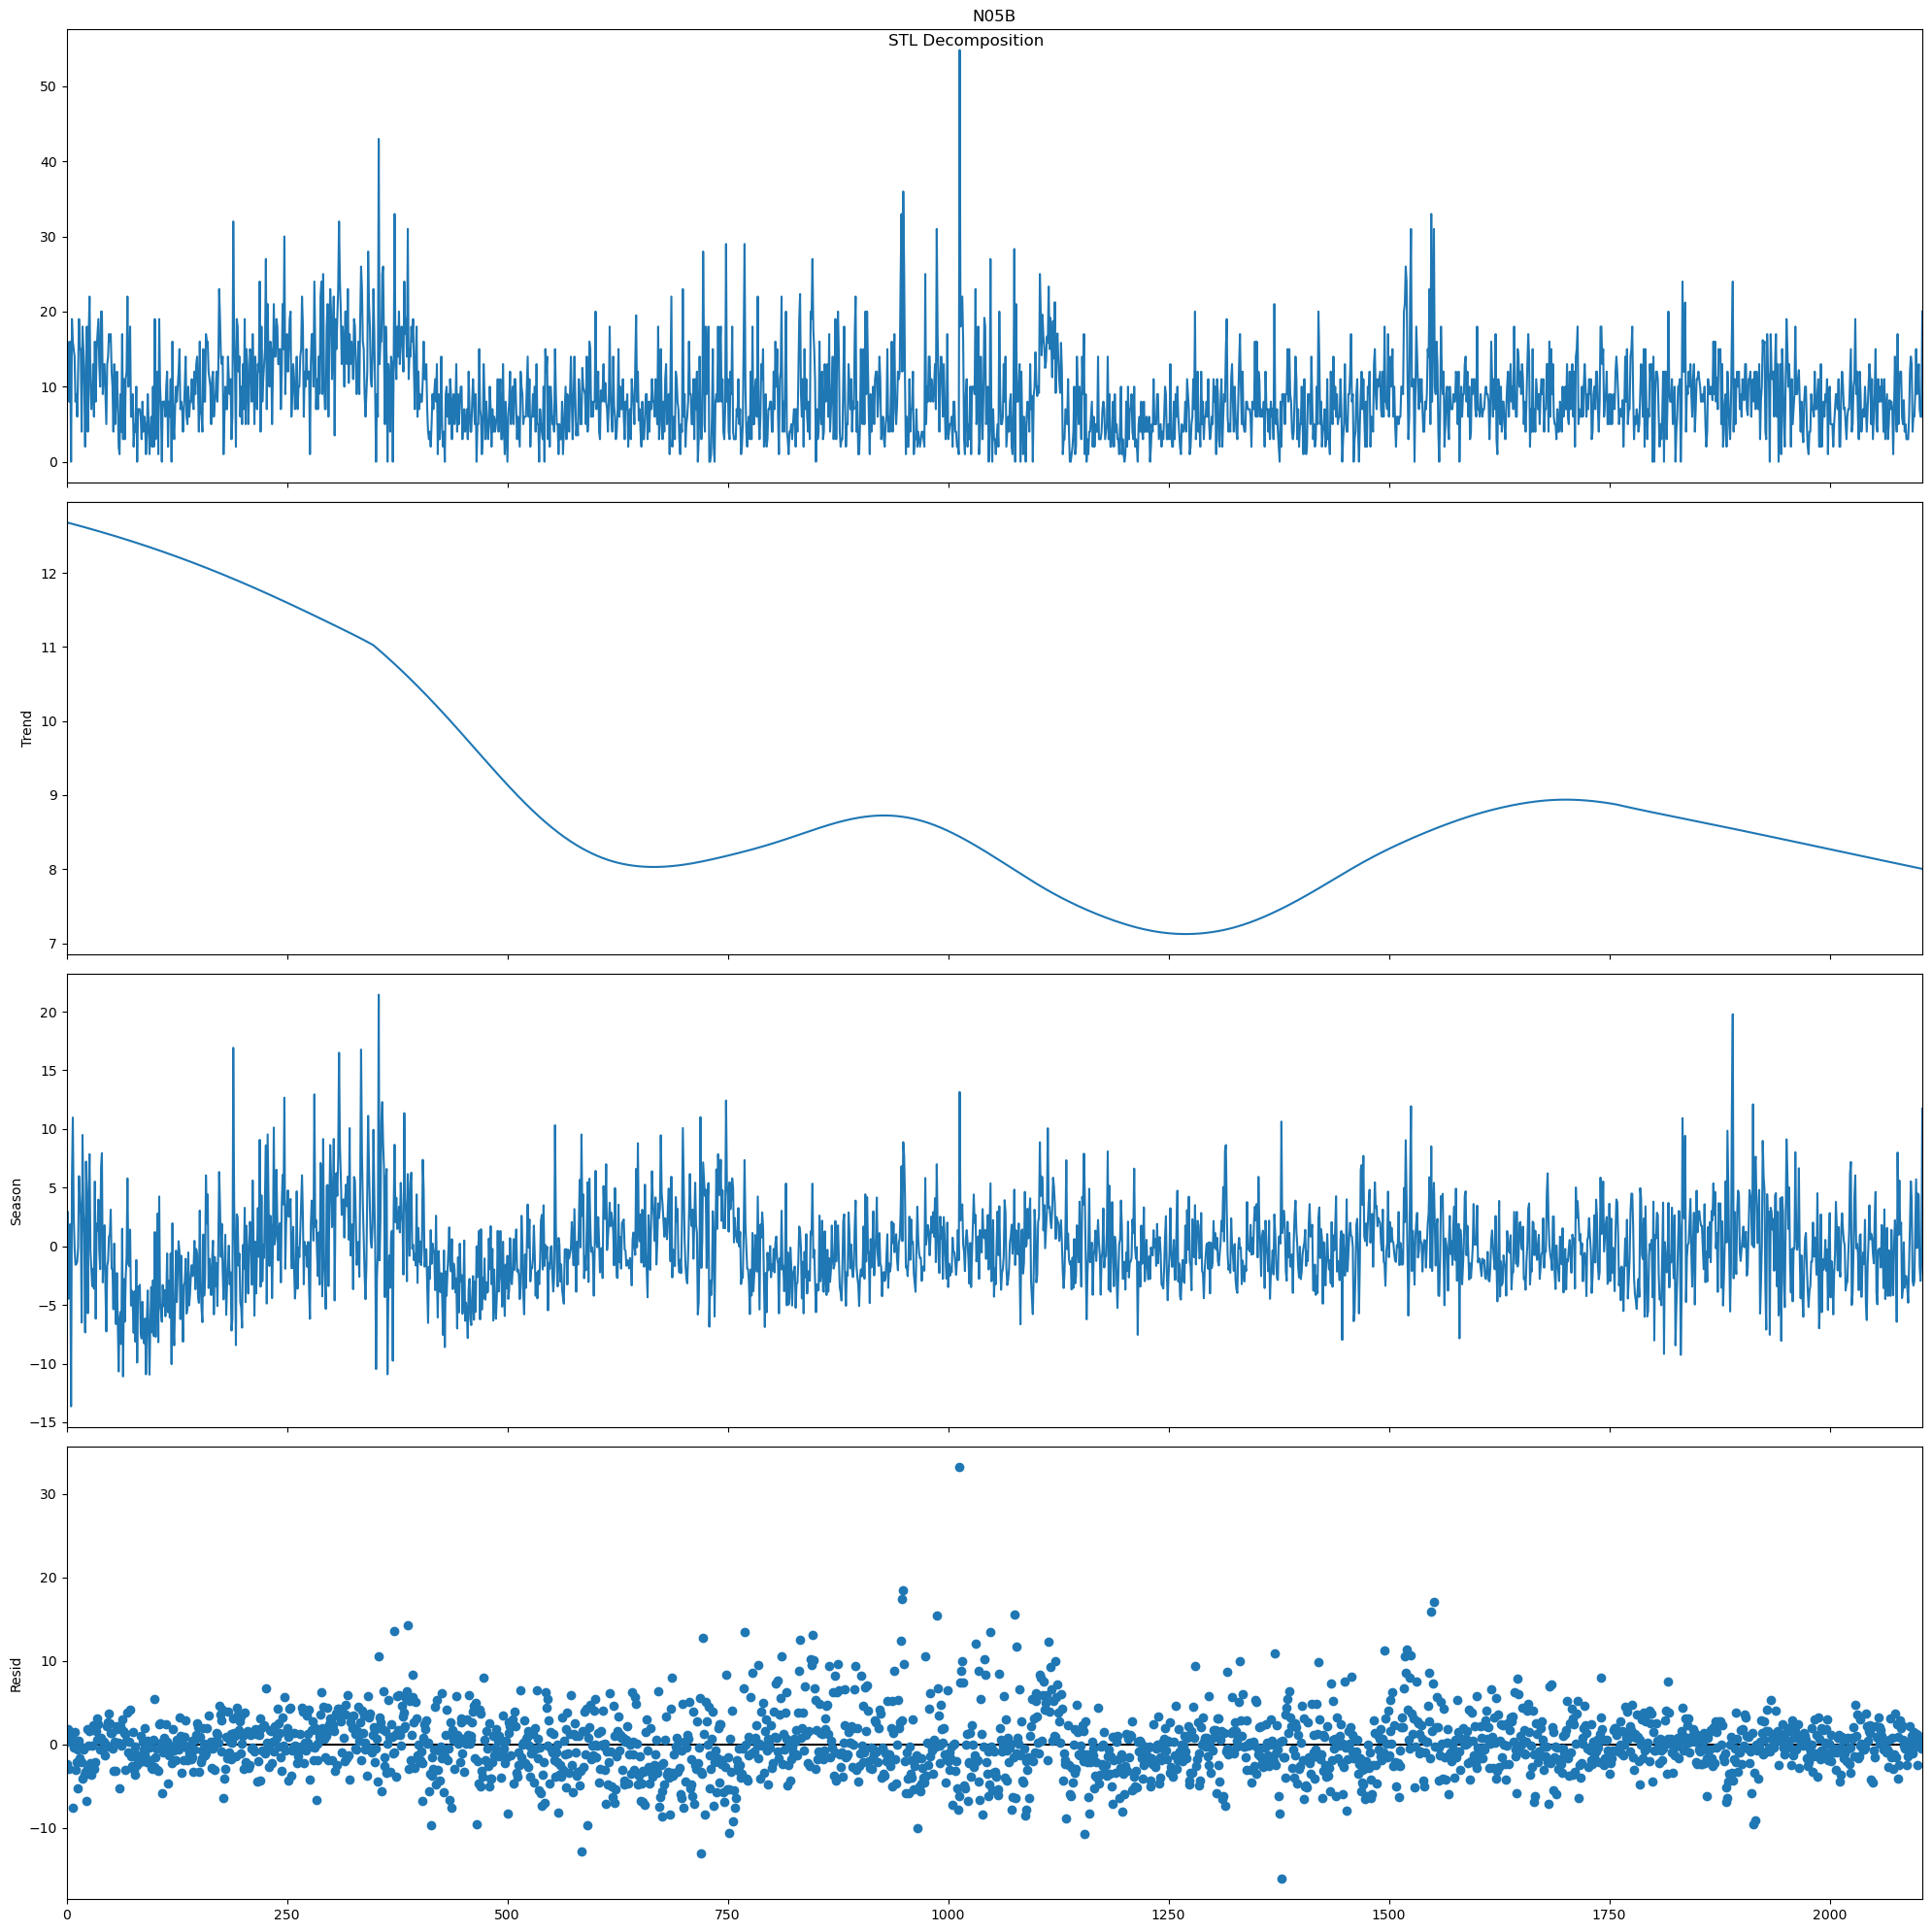

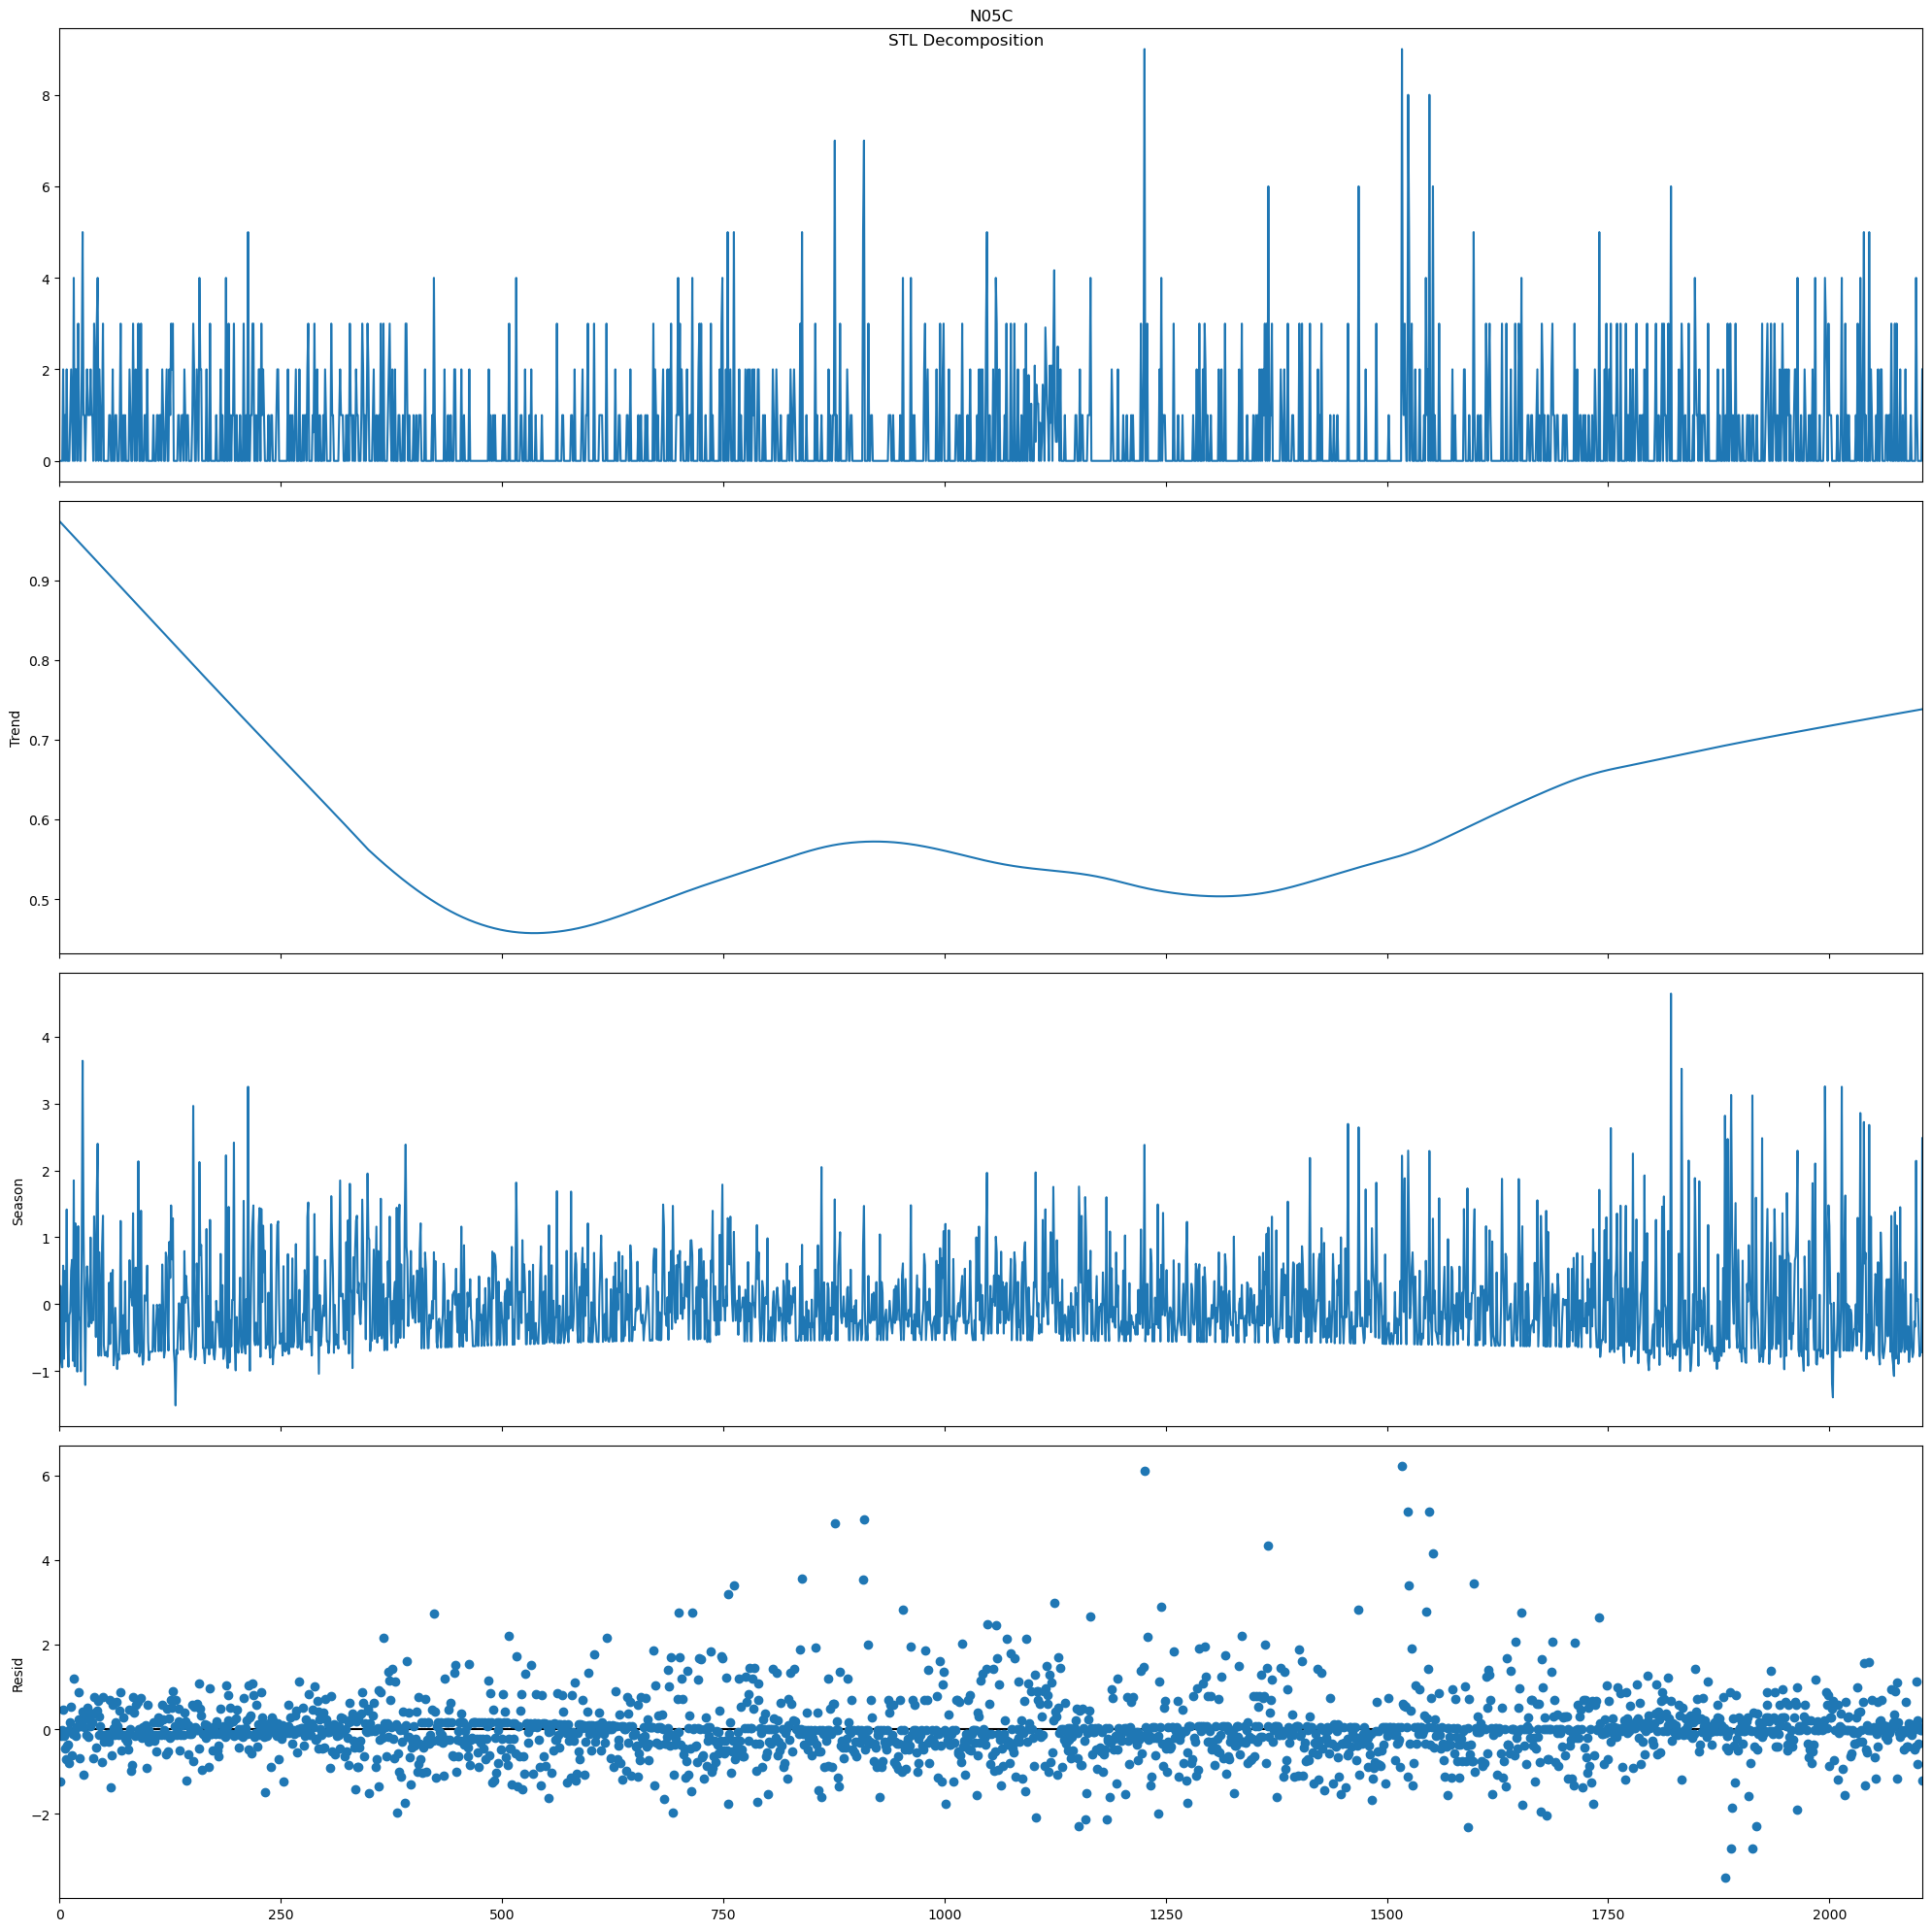

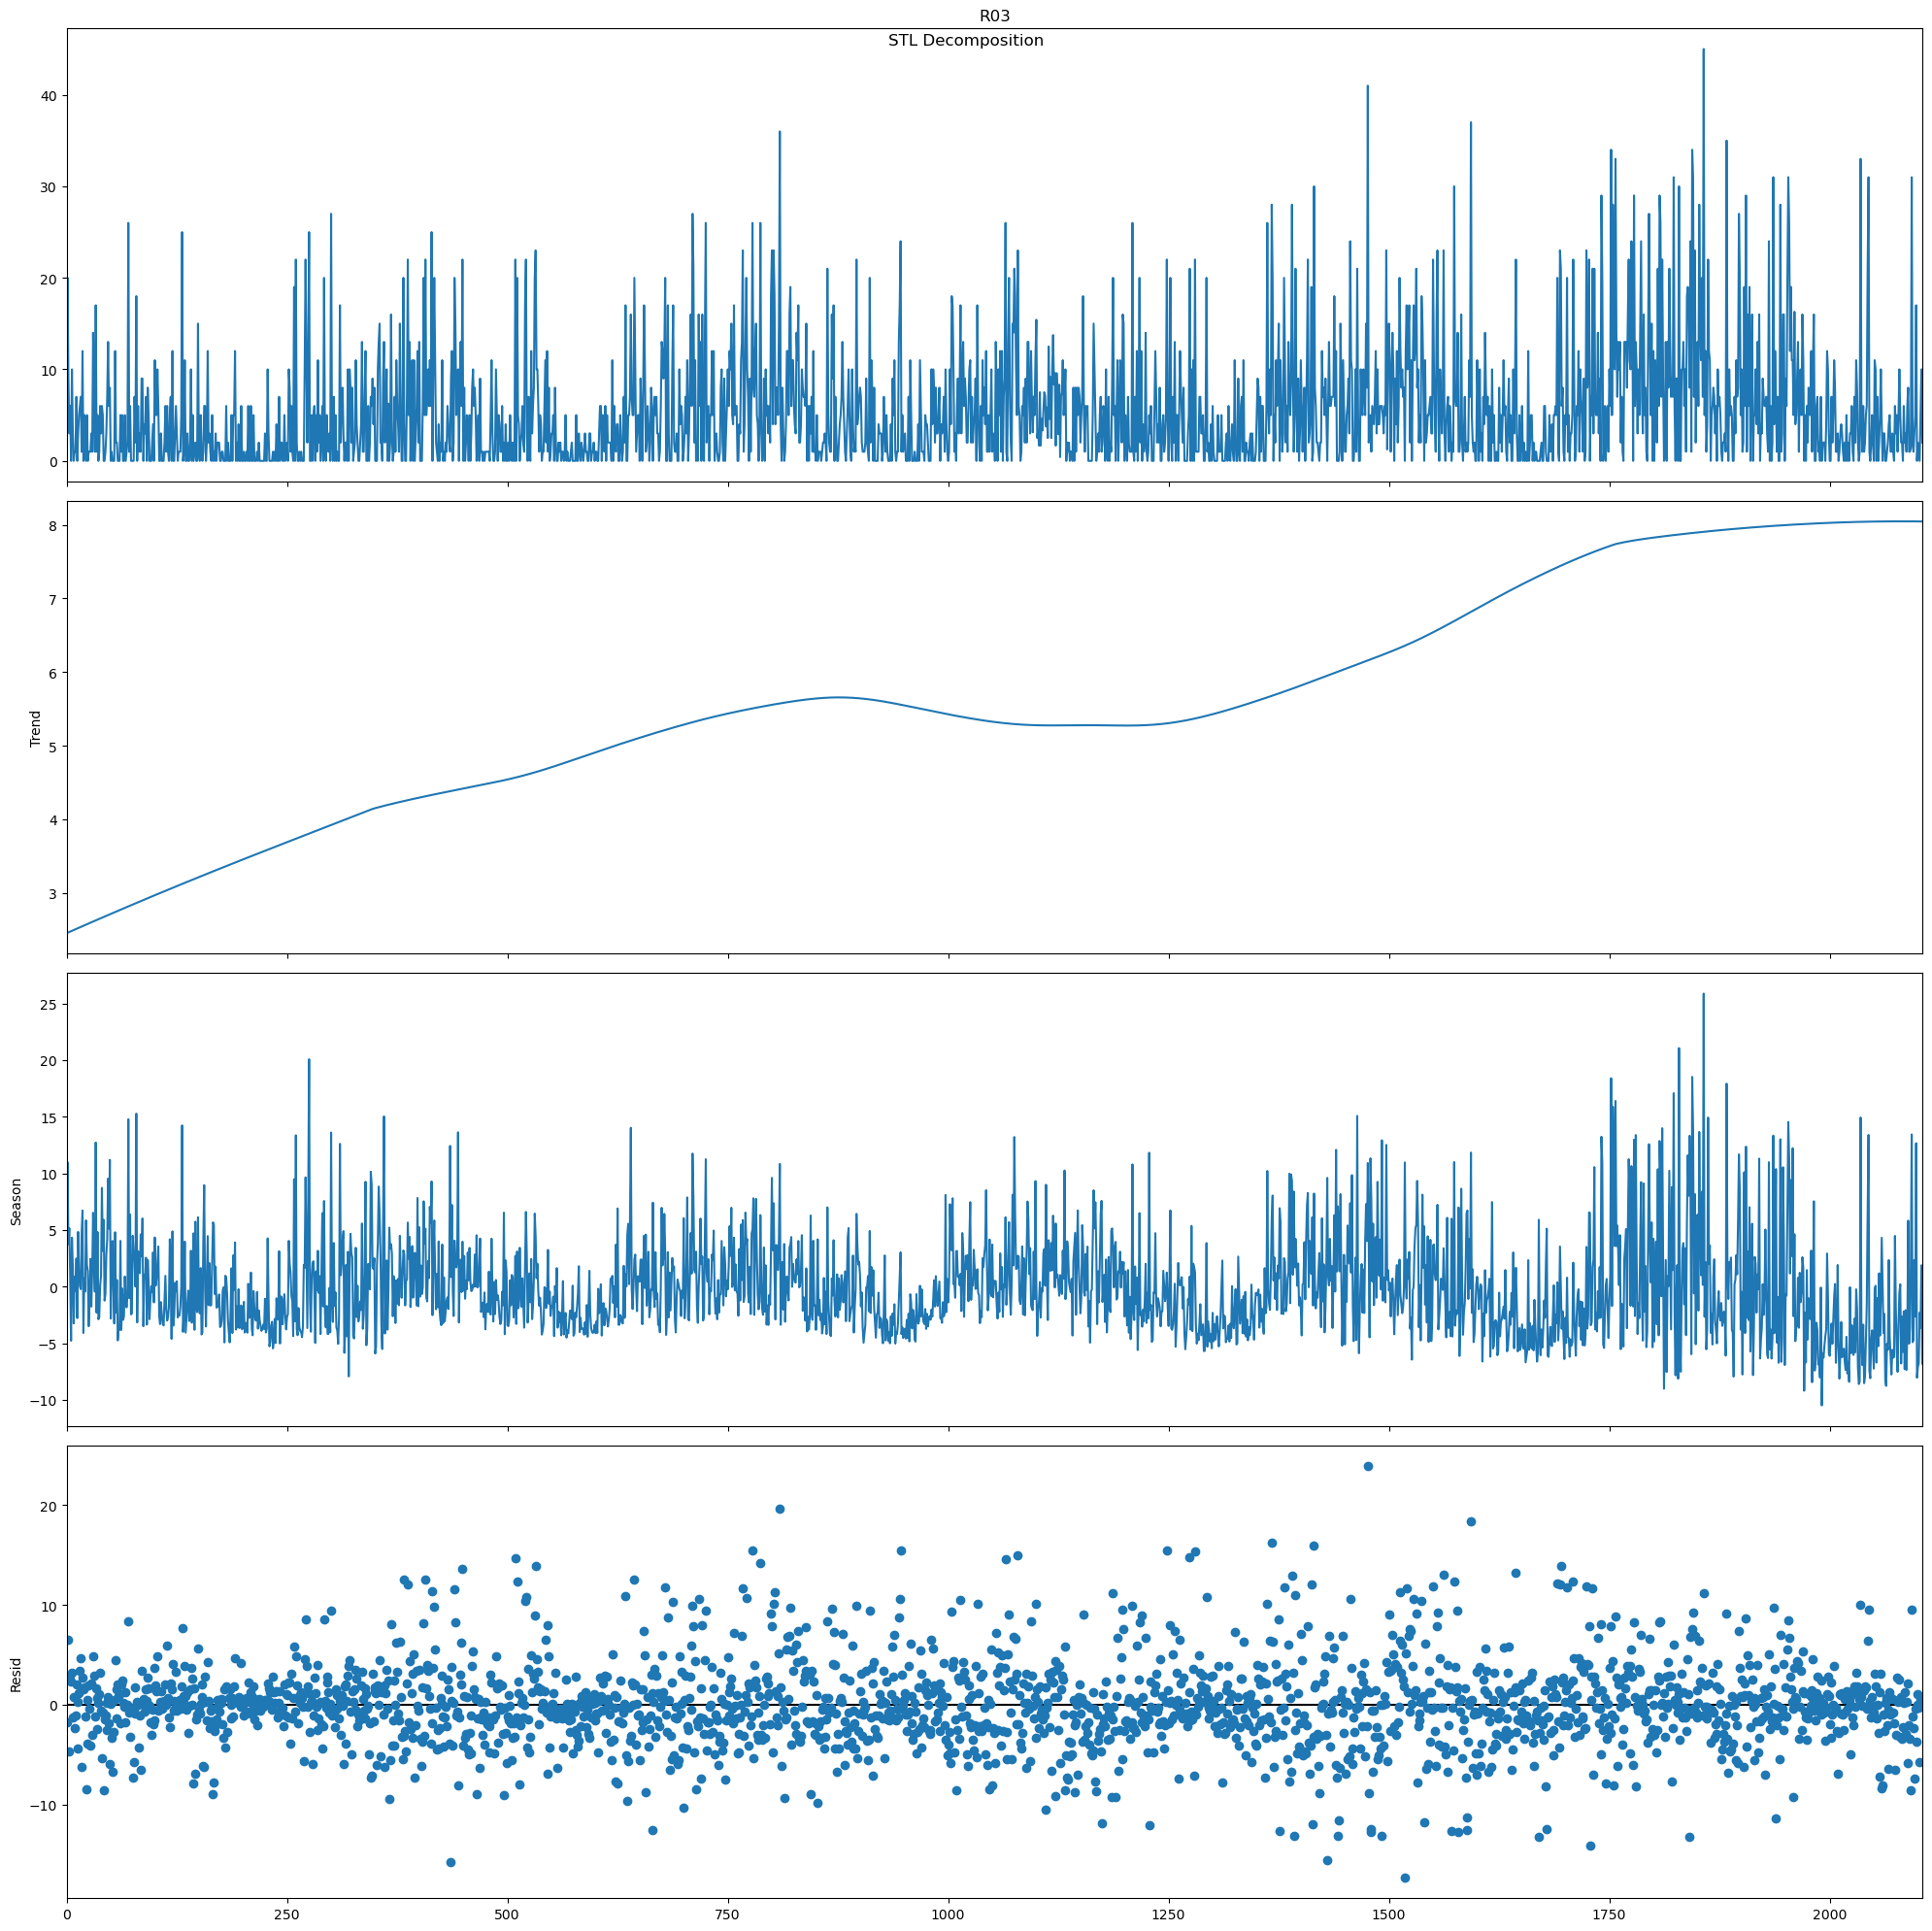

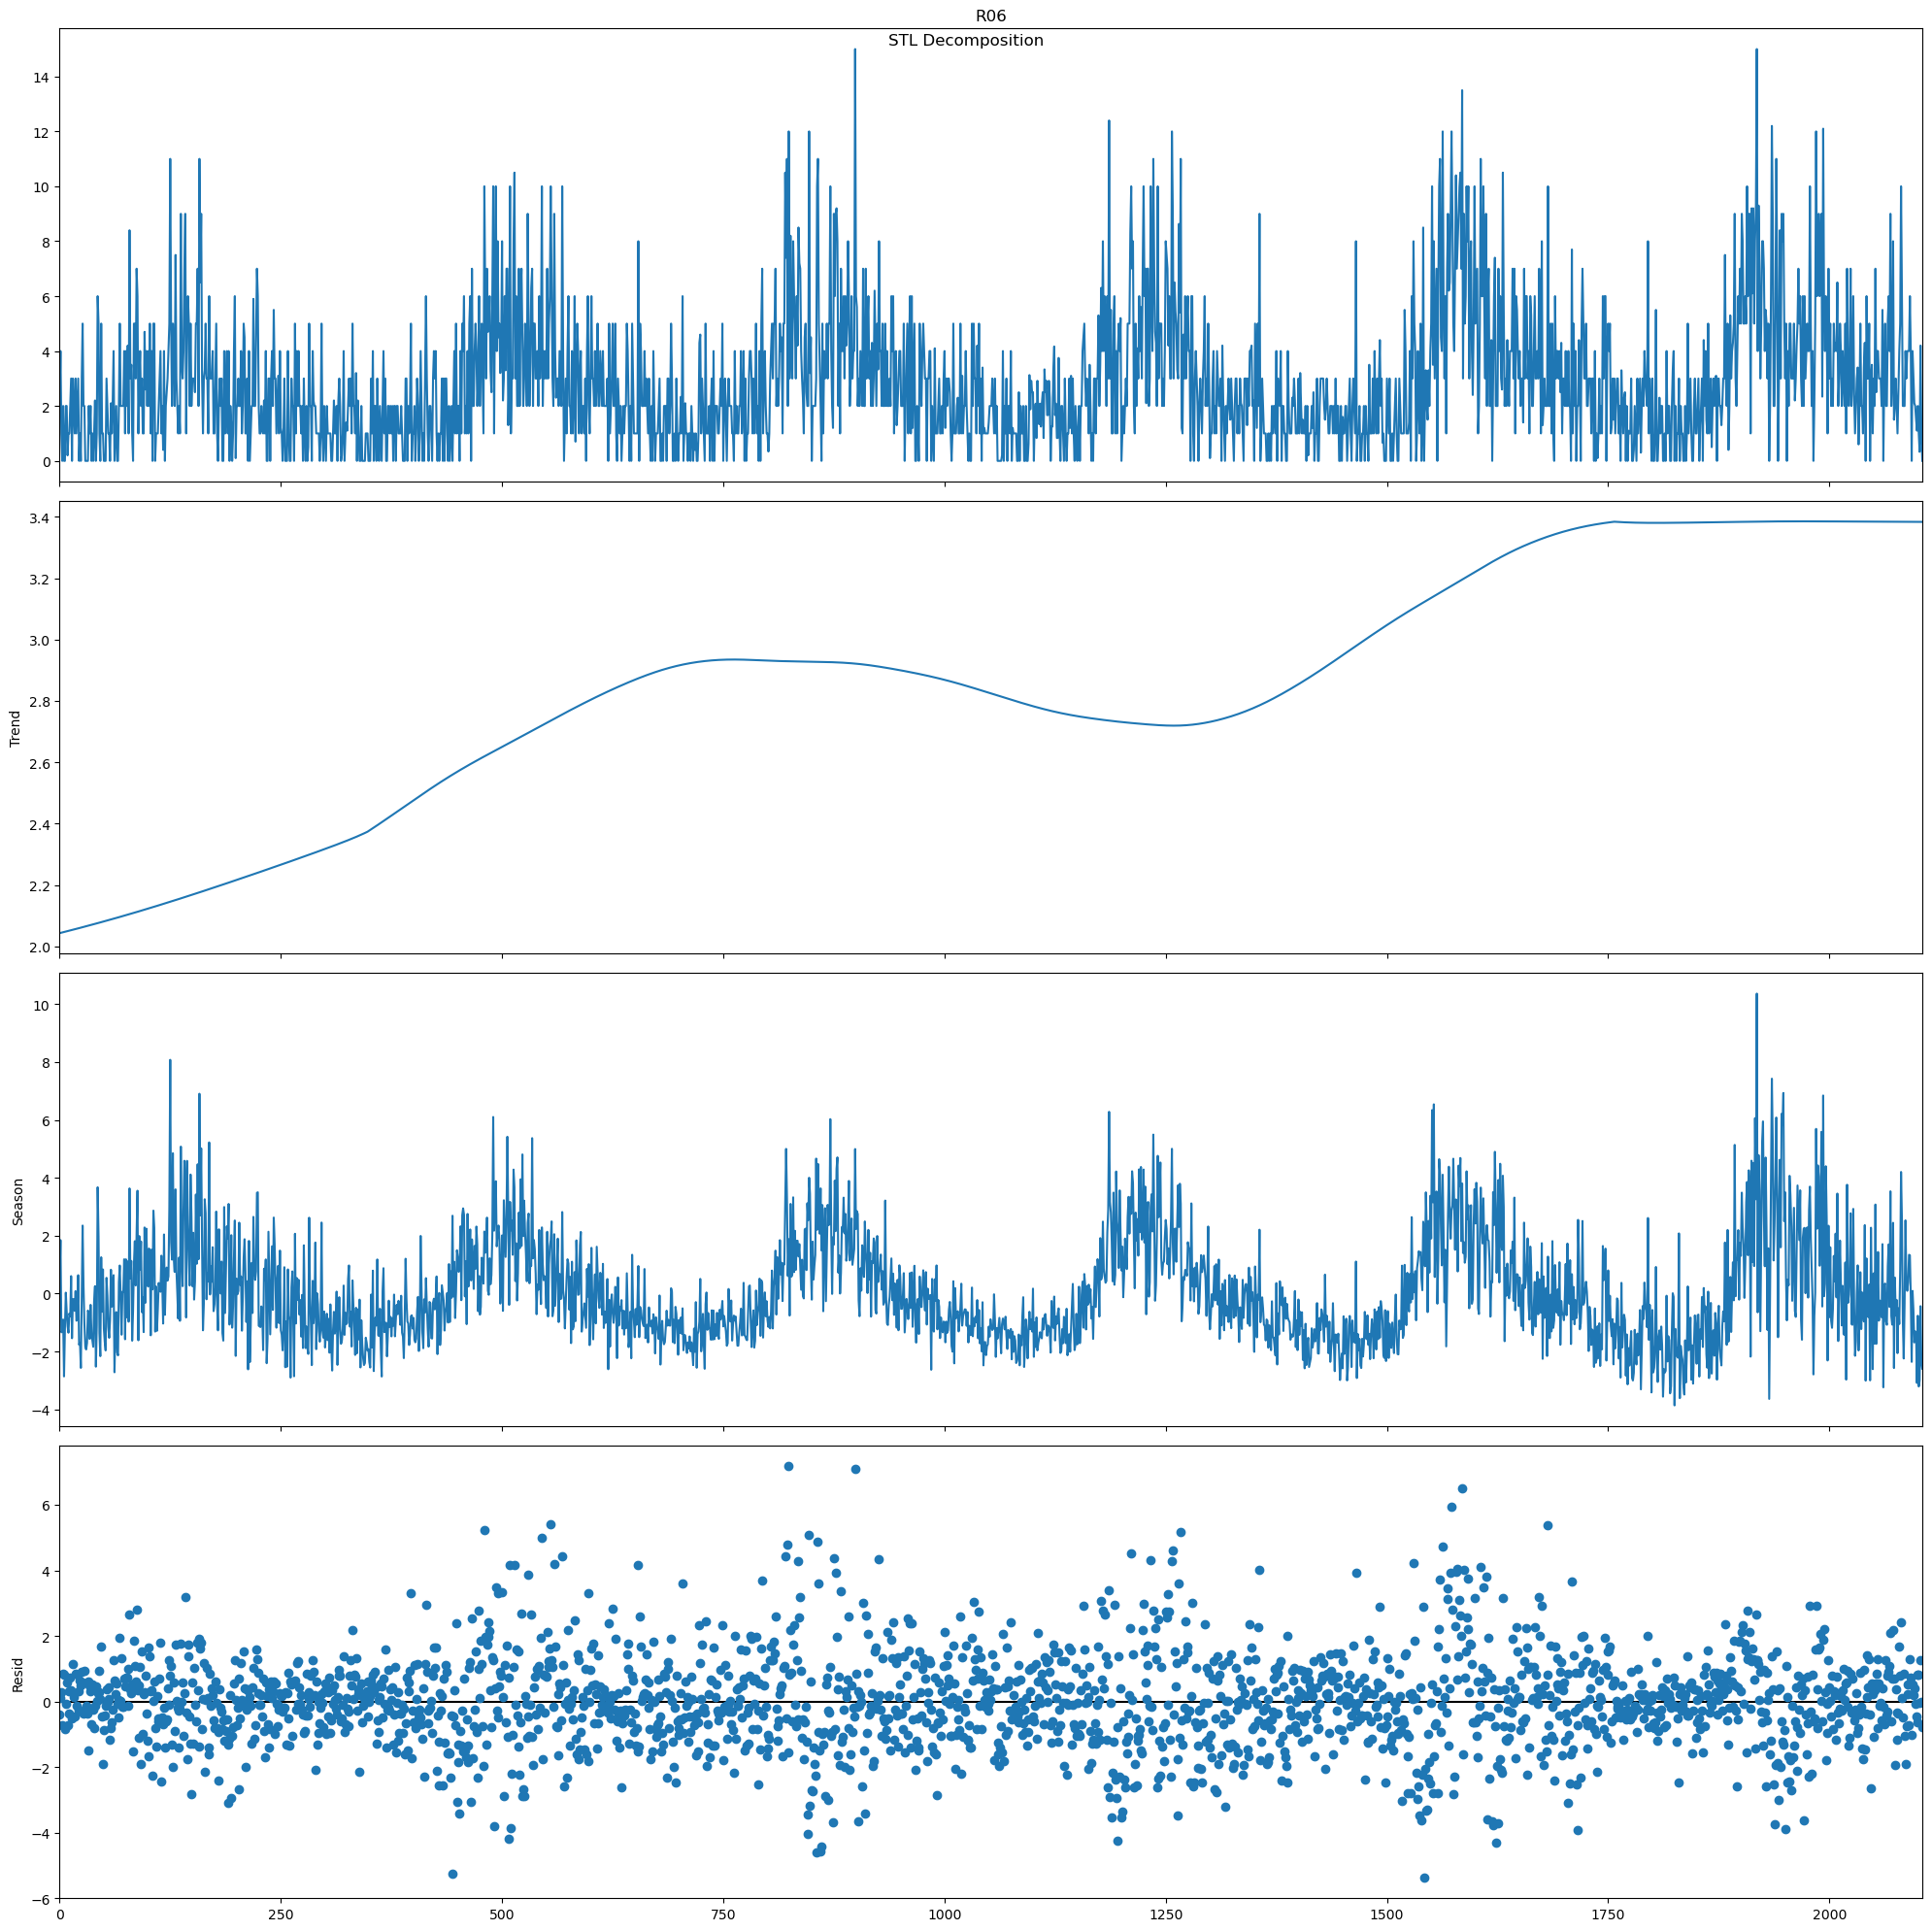

In [15]:
for drug in drugs:
    result = STL(daily_df[drug], period=365).fit()
    plt.rcParams["figure.figsize"] = (20,20)
    result.plot().suptitle("STL Decomposition")

In [19]:

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    result = seasonal_decompose(daily_df[x], period=52, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    resmean=np.mean(np.abs(res))
    obsmean=np.mean(np.abs(obs))
    perc=resmean*100/obsmean
    print(x+' RESMEAN:'+str(resmean)+', OBSMEAN:'+str(obsmean)+', PERC:'+str(perc)+'%')

M01AB RESMEAN:2.0712636400118356, OBSMEAN:5.034424091204479, PERC:41.142017487769664%
M01AE RESMEAN:1.590095743692594, OBSMEAN:3.9018980748943526, PERC:40.751852384961325%
N02BA RESMEAN:1.732234207835713, OBSMEAN:3.8720589094454723, PERC:44.73677307982359%
N02BE RESMEAN:8.775463248355404, OBSMEAN:29.80099937114898, PERC:29.446875720722065%
N05B RESMEAN:3.821099567543921, OBSMEAN:8.82294912364703, PERC:43.308643334491336%
N05C RESMEAN:0.7529943650481807, OBSMEAN:0.5910215839011684, PERC:127.40556107576904%
R03 RESMEAN:4.279737895727971, OBSMEAN:5.5430410175292115, PERC:77.2092048785821%
R06 RESMEAN:1.4681486636933785, OBSMEAN:2.916449610516066, PERC:50.3402718977061%


In [39]:
# Stationary Analysis
# Augmented Dickey Fuller Test

for drug in drugs:
    test = adfuller(daily_df[drug], regression='ct', autolag='AIC')
    print(f"{drug}: {test}")
    print(f"p-value: {test[1]}")
    if test[1]<0.5:
        print("Stationary\n")
    else:
        print("Non-Stationary\n")

M01AB: (-8.669195491837431, 2.053142385606103e-12, 14, 2091, {'1%': -3.9631060717799924, '5%': -3.41259173685078, '10%': -3.1282874376905356}, 10043.110097918247)
p-value: 2.053142385606103e-12
Stationary

M01AE: (-7.470737683603016, 1.1899730154006065e-09, 21, 2084, {'1%': -3.9631206583322434, '5%': -3.4125988034261017, '10%': -3.128291597193074}, 8969.514941714608)
p-value: 1.1899730154006065e-09
Stationary

N02BA: (-7.829006436676238, 1.775428024763837e-10, 17, 2088, {'1%': -3.9631123111656277, '5%': -3.412594759575526, '10%': -3.1282892169169547}, 9339.582326947144)
p-value: 1.775428024763837e-10
Stationary

N02BE: (-4.193369991994864, 0.004581286196032961, 13, 2092, {'1%': -3.963103995967436, '5%': -3.412590731204299, '10%': -3.1282868457498787}, 16346.643724846042)
p-value: 0.004581286196032961
Stationary

N05B: (-4.910601138407732, 0.0002983869127664234, 26, 2079, {'1%': -3.9631311375276432, '5%': -3.412603880143406, '10%': -3.128294585427974}, 12699.696152849583)
p-value: 0.000

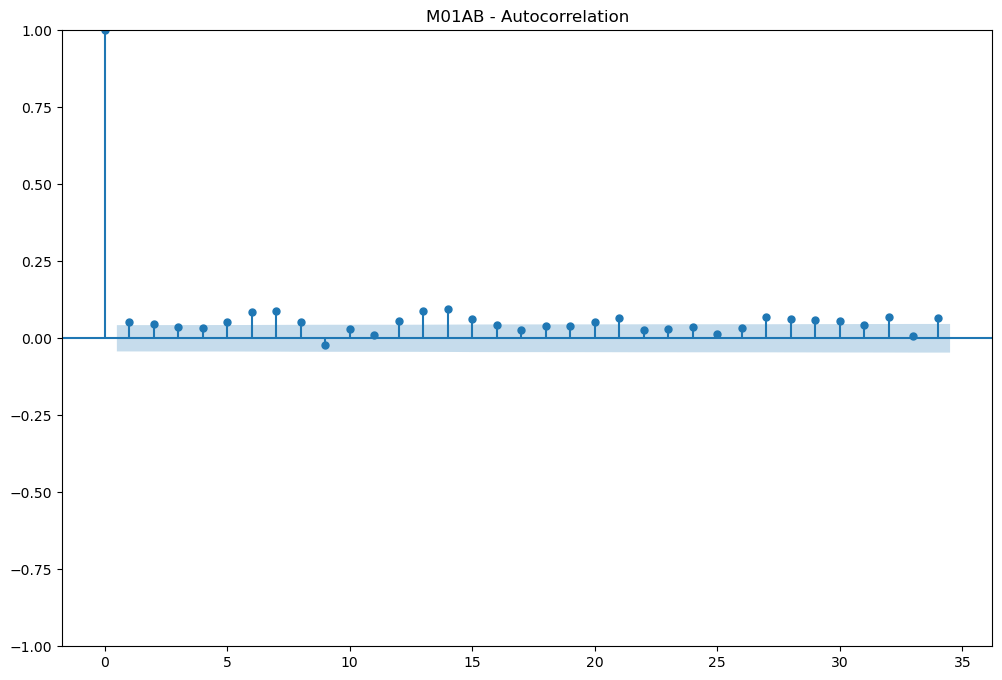

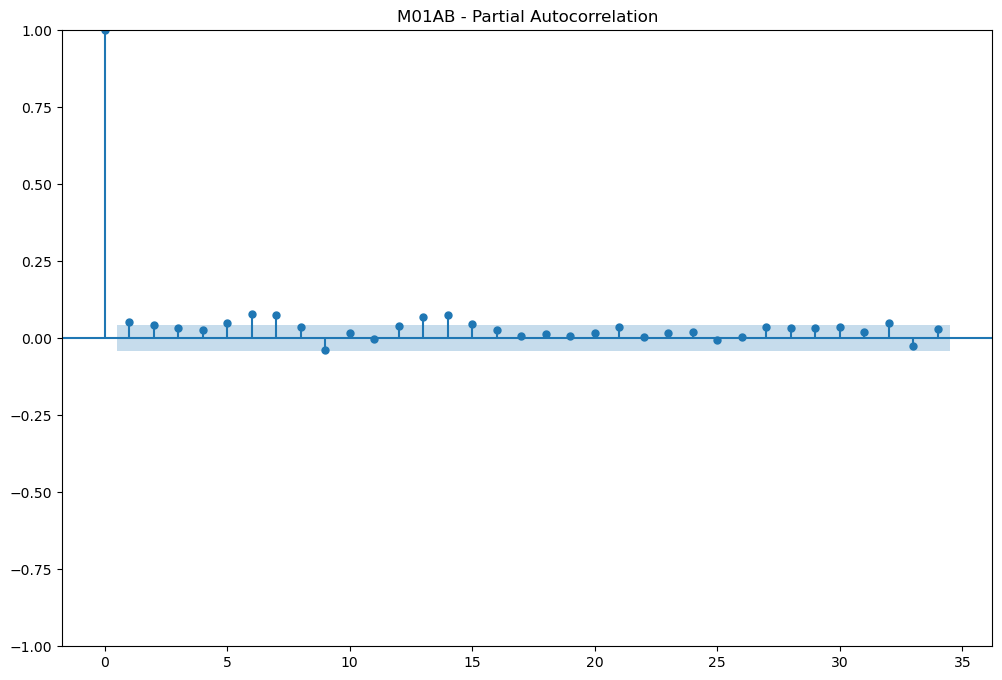

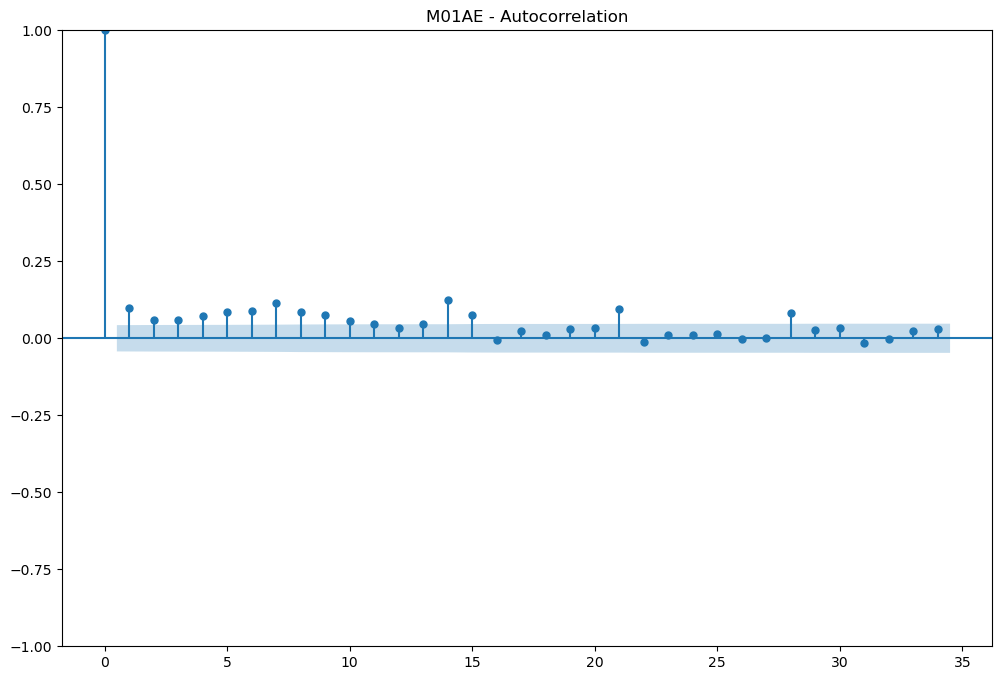

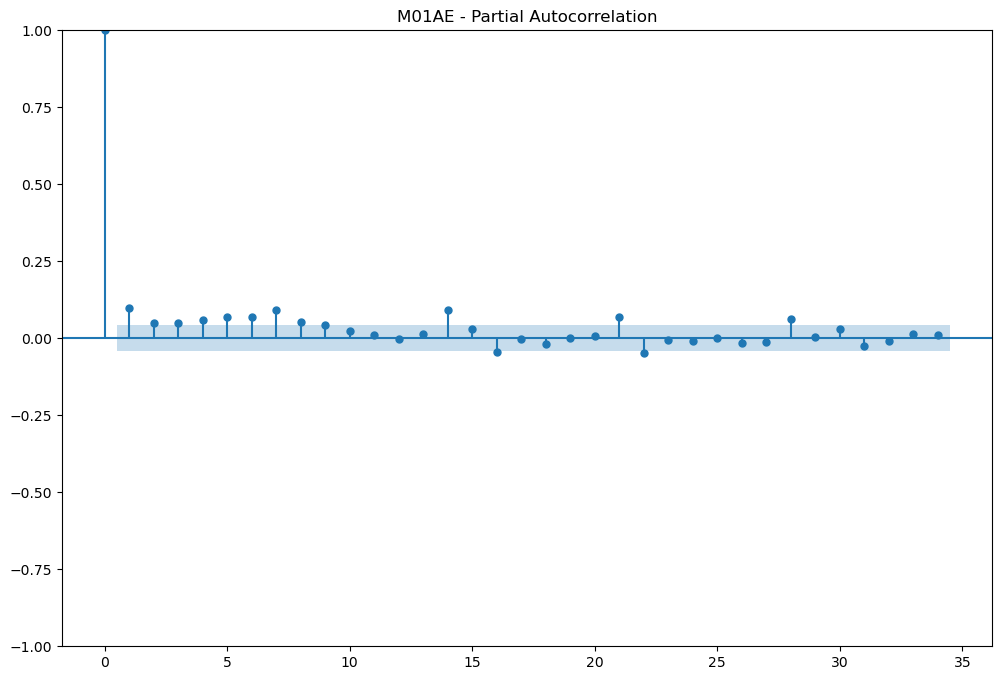

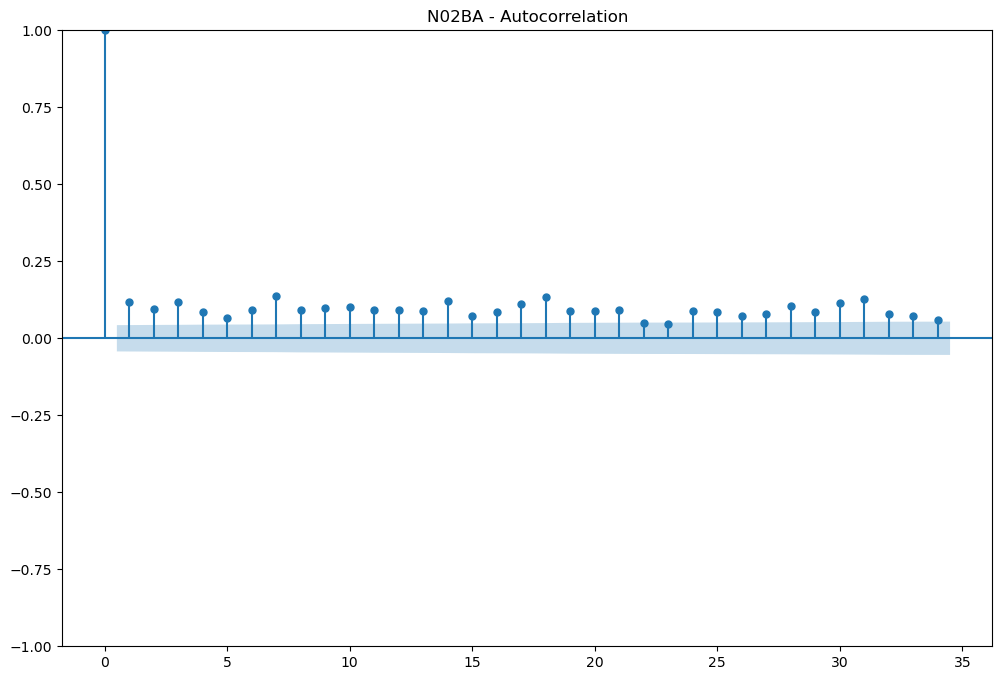

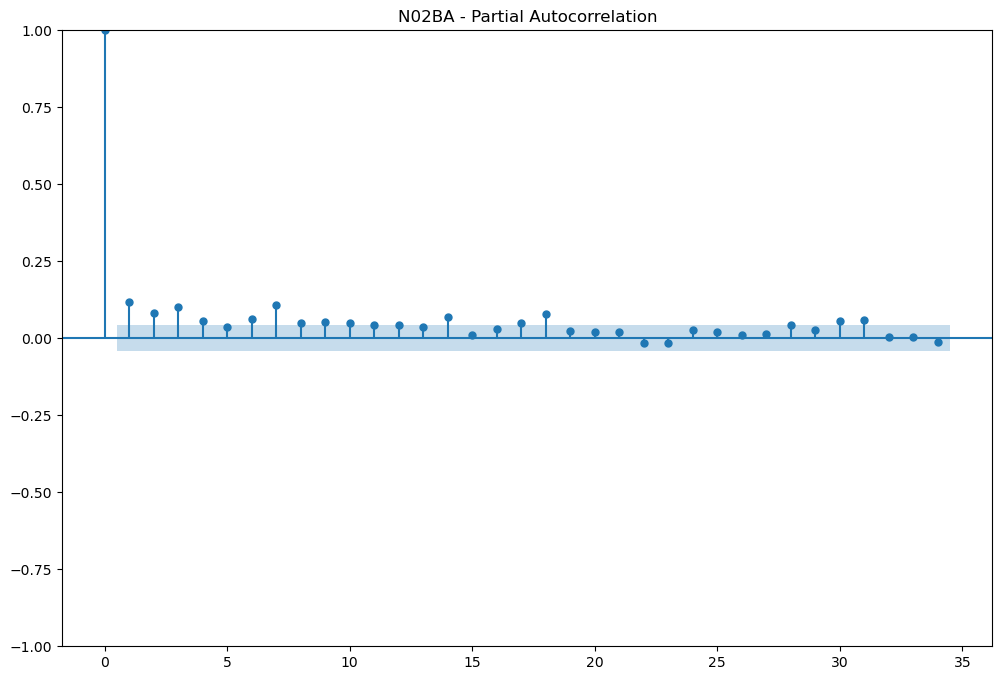

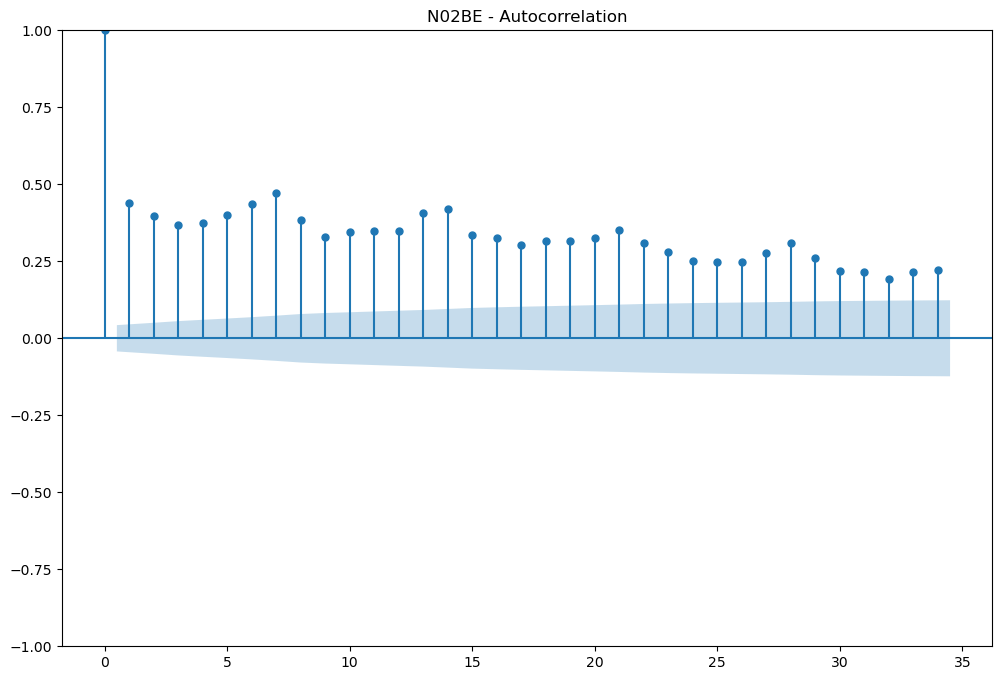

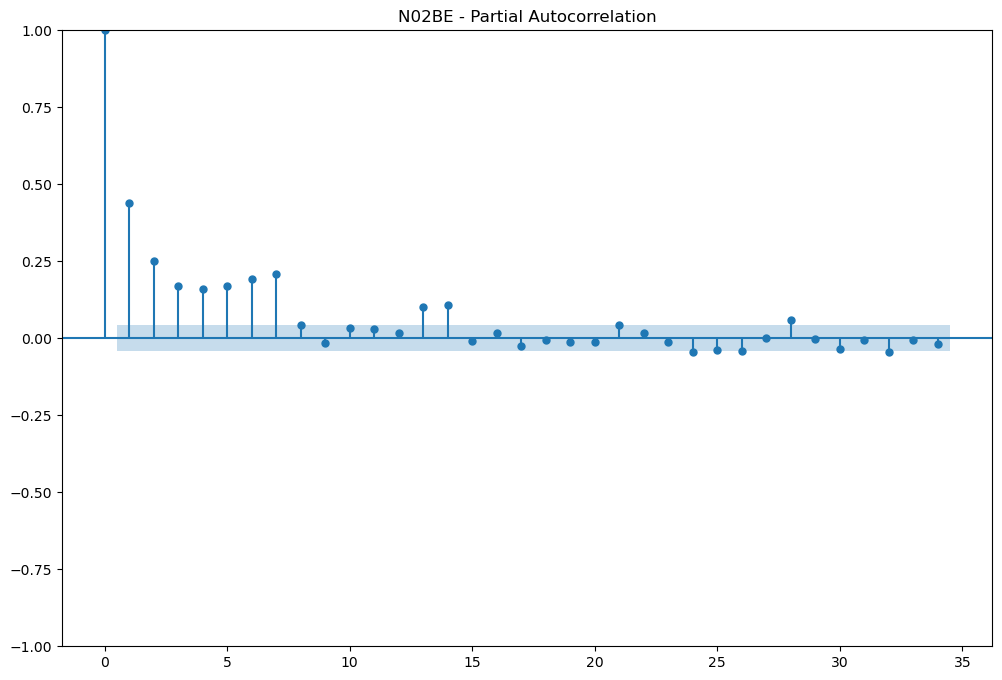

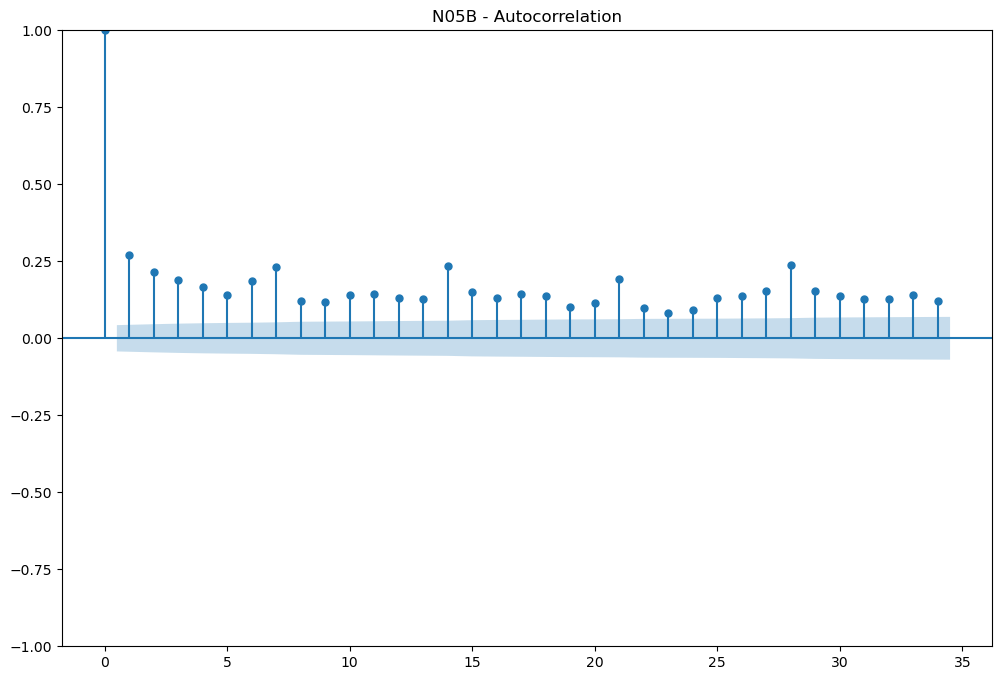

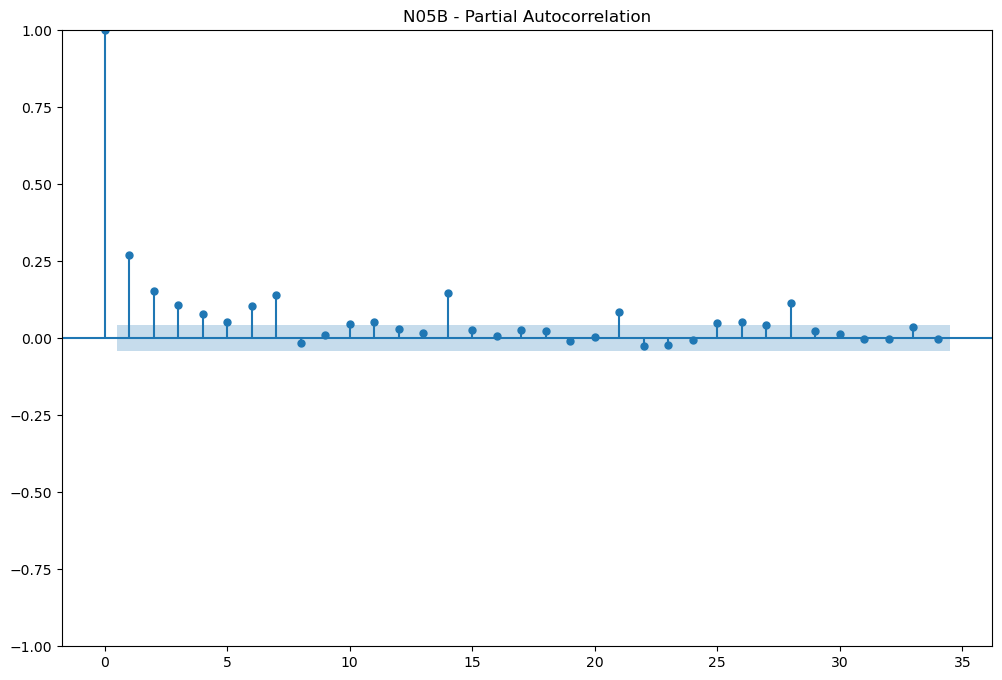

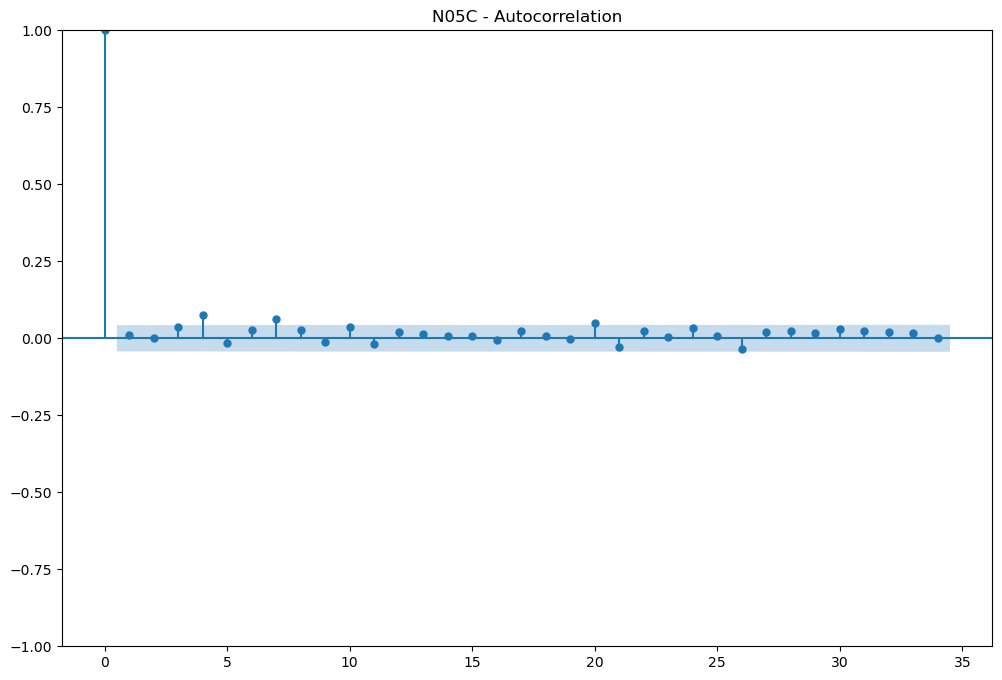

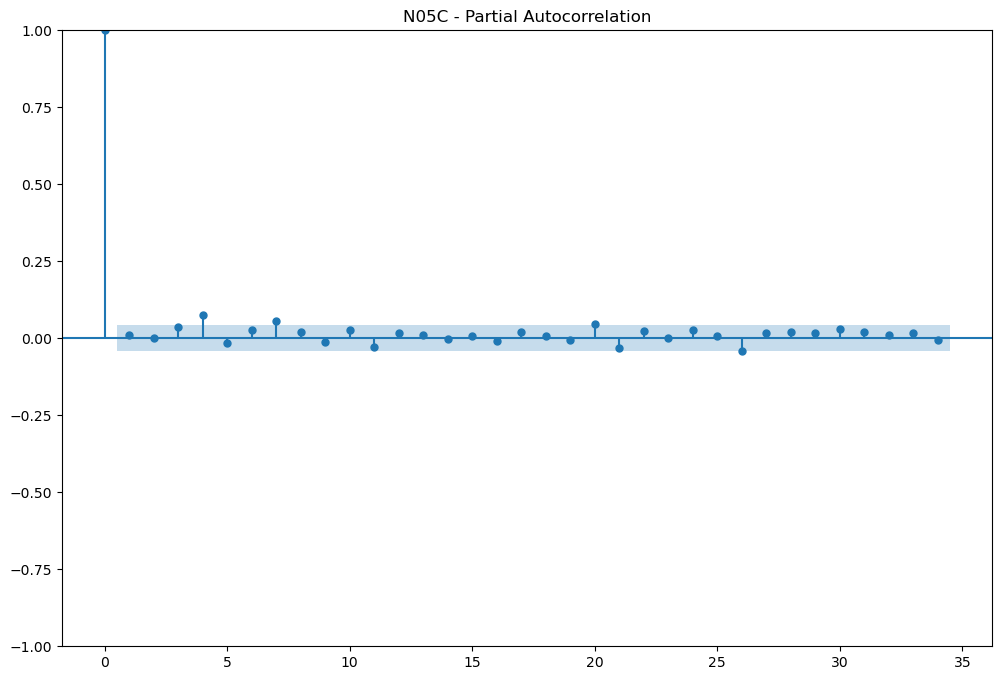

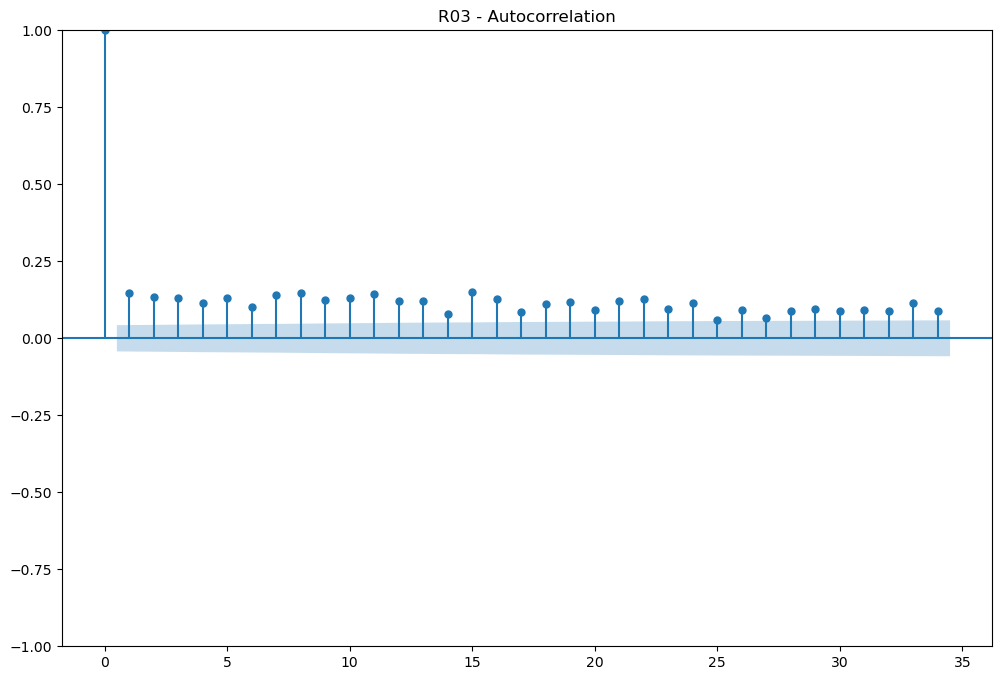

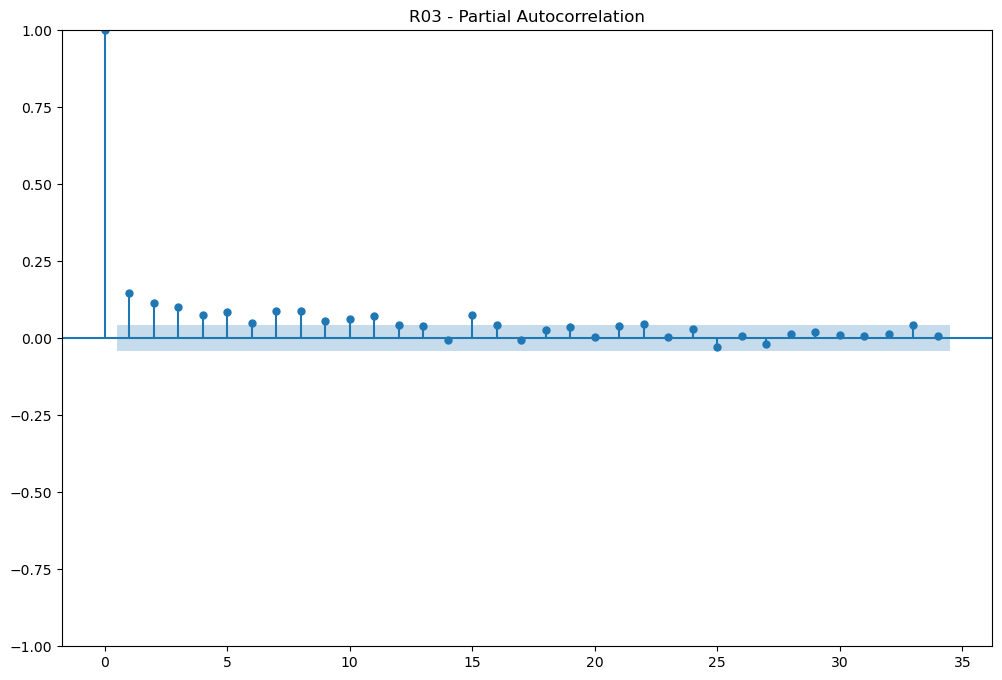

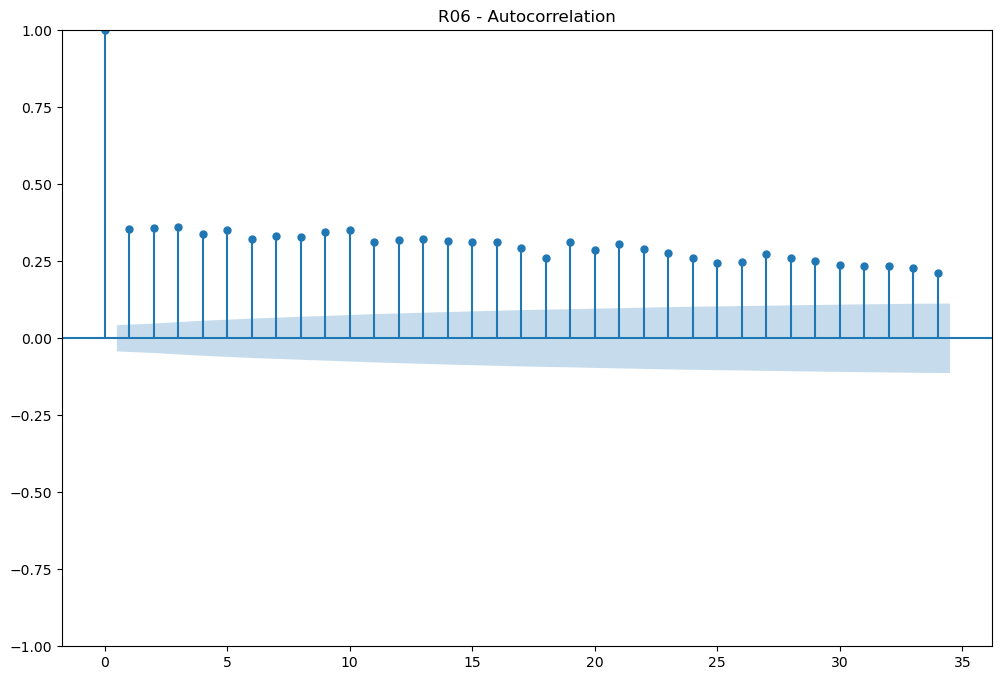

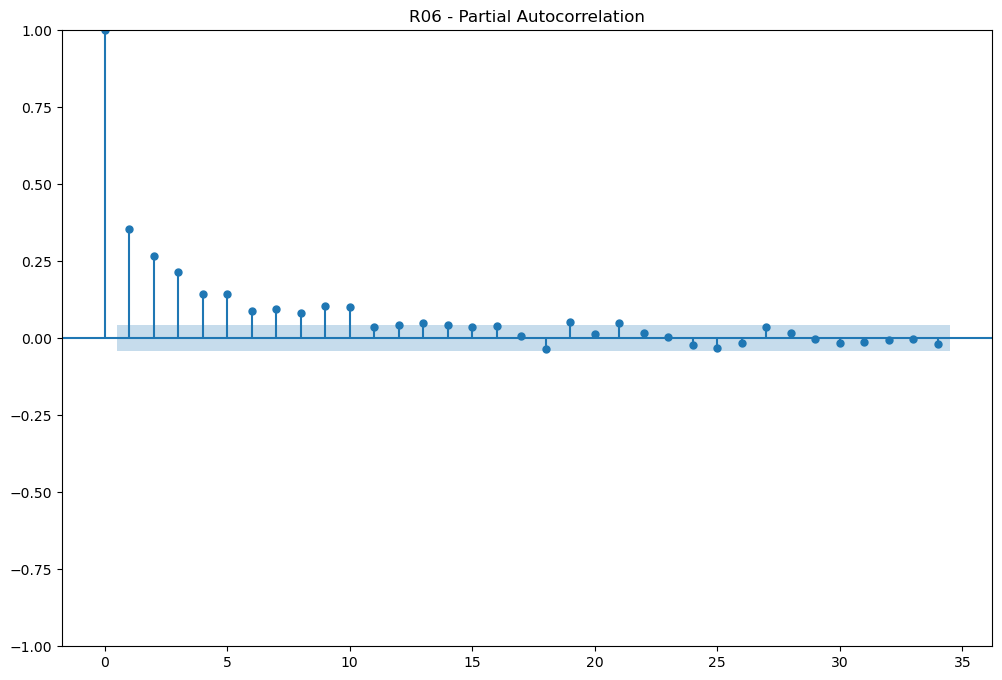

In [51]:
# Plot ACF and PACF

for drug in drugs:
    plt.rcParams["figure.figsize"] = (12,8)
    plot_acf(daily_df[drug]) 
    plt.title(f"{drug} - Autocorrelation")
    plot_pacf(daily_df[drug]) 
    plt.title(f"{drug} - Partial Autocorrelation")
    plt.show()

In [ ]:
weekly_df['datum'] = pd.to_datetime(weekly_df['datum'])
df = weekly_df.set_index('datum')
df = df.asfreq(pd.infer_freq(df.index))

testing_timeframe = 26

train1 = df[:-testing_timeframe]
test1  = df[-testing_timeframe:]
print('training set (past data): ', len(train1))
print('test set (days to be forecasted ahead): ', len(test1))
train1 = train1[['M01AB']]
test1 = test1[['M01AB']]
train1['M01AB'] = pd.to_numeric(train1['M01AB'], errors='coerce')
train1

In [ ]:
# Determine SARIMA parameters

p_values = range(0, 3)  # Autoregressive order (AR)
d_values = [0]          # Differencing order (I)
q_values = range(0, 3)  # Moving average order (MA)
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period (monthly)

param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m_values))

best_aic = float("inf")  
best_params = None

# Grid search
for parameters in param_combinations:
    order = parameters[:3]
    seasonal_order = parameters[3:]
    
    try:
        model = sm.tsa.SARIMAX(df_train, 
                               order=order, 
                               easonal_order=seasonal_order)
        result = model.fit(disp=False)
        aic = result.aic
        
        if not math.isinf(result.zvalues.mean()):
            print(order, seasonal_order, aic)
        
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        else:
            print(order, seasonal_order, 'not converged')

    except:
        continue

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

In [ ]:
# Define SARIMA parameters 

p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12 
  
# Fit the SARIMA model 
model = SARIMAX(daily_df['M01AB'], order=(p, d, q), seasonal_order=(P, D, Q, s)) 
results = model.fit() 
model 

In [ ]:
observed = monthly_sales[-forecast_periods:] 
mae = mean_absolute_error(observed, forecast_mean) 
mse = mean_squared_error(observed, forecast_mean) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

In [ ]:
observed = monthly_sales[-forecast_periods:] 
mae = mean_absolute_error(observed, forecast_mean) 
mse = mean_squared_error(observed, forecast_mean) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()